In [2]:
import time
import Magnitudes
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
from matplotlib.mlab import griddata
from scipy.stats import norm
import sfdmap
from scipy import stats
from matplotlib.font_manager import FontProperties
try:
    import valuefile
except SyntaxError:
    pass

In [3]:
fullMag = valuefile.fullMagastro1304
fullPeriod = valuefile.fullPeriodastro1304

In [4]:
name = ['astro','minion','minionOC','panstars','baseline']
number = ['1322','1304','3311','630','1929'] # '169']
attribute = ['fullSigLevel','fullmeasuredPeriod','fullMag']

string0 = 'sigLevels = [' 
string1 = 'measuredPeriods = [' 
string2 = 'fullRed = [' 

for x,na in enumerate(name):
    for y,nu in enumerate(number):
        string0 += ('valuefile.'+attribute[0]+na+nu+',')
        string1 += ('valuefile.'+attribute[1]+na+nu+',')
        string2 += ('valuefile.'+attribute[2]+na+nu+',')

string0 = string1[:-1]+']'
string1 = string1[:-1]+']'
string2 = string2[:-1]+']'


In [5]:
measuredPeriods = [valuefile.fullmeasuredPeriodastro1322,valuefile.fullmeasuredPeriodastro1304,valuefile.fullmeasuredPeriodastro3311,valuefile.fullmeasuredPeriodastro630,valuefile.fullmeasuredPeriodastro1929,valuefile.fullmeasuredPeriodminion1322,valuefile.fullmeasuredPeriodminion1304,valuefile.fullmeasuredPeriodminion3311,valuefile.fullmeasuredPeriodminion630,valuefile.fullmeasuredPeriodminion1929,valuefile.fullmeasuredPeriodminionOC1322,valuefile.fullmeasuredPeriodminionOC1304,valuefile.fullmeasuredPeriodminionOC3311,valuefile.fullmeasuredPeriodminionOC630,valuefile.fullmeasuredPeriodminionOC1929,valuefile.fullmeasuredPeriodpanstars1322,valuefile.fullmeasuredPeriodpanstars1304,valuefile.fullmeasuredPeriodpanstars3311,valuefile.fullmeasuredPeriodpanstars630,valuefile.fullmeasuredPeriodpanstars1929,valuefile.fullmeasuredPeriodbaseline1322,valuefile.fullmeasuredPeriodbaseline1304,valuefile.fullmeasuredPeriodbaseline3311,valuefile.fullmeasuredPeriodbaseline630,valuefile.fullmeasuredPeriodbaseline1929]

In [6]:
fullRed = [valuefile.fullMagastro1322,valuefile.fullMagastro1304,valuefile.fullMagastro3311,valuefile.fullMagastro630,valuefile.fullMagastro1929,valuefile.fullMagminion1322,valuefile.fullMagminion1304,valuefile.fullMagminion3311,valuefile.fullMagminion630,valuefile.fullMagminion1929,valuefile.fullMagminionOC1322,valuefile.fullMagminionOC1304,valuefile.fullMagminionOC3311,valuefile.fullMagminionOC630,valuefile.fullMagminionOC1929,valuefile.fullMagpanstars1322,valuefile.fullMagpanstars1304,valuefile.fullMagpanstars3311,valuefile.fullMagpanstars630,valuefile.fullMagpanstars1929,valuefile.fullMagbaseline1322,valuefile.fullMagbaseline1304,valuefile.fullMagbaseline3311,valuefile.fullMagbaseline630,valuefile.fullMagbaseline1929]

In [7]:
sigLevels = [valuefile.fullSigLevelastro1322,valuefile.fullSigLevelastro1304,valuefile.fullSigLevelastro3311,valuefile.fullSigLevelastro630,valuefile.fullSigLevelastro1929,valuefile.fullSigLevelminion1322,valuefile.fullSigLevelminion1304,valuefile.fullSigLevelminion3311,valuefile.fullSigLevelminion630,valuefile.fullSigLevelminion1929,valuefile.fullSigLevelminionOC1322,valuefile.fullSigLevelminionOC1304,valuefile.fullSigLevelminionOC3311,valuefile.fullSigLevelminionOC630,valuefile.fullSigLevelminionOC1929,valuefile.fullSigLevelpanstars1322,valuefile.fullSigLevelpanstars1304,valuefile.fullSigLevelpanstars3311,valuefile.fullSigLevelpanstars630,valuefile.fullSigLevelpanstars1929,valuefile.fullSigLevelbaseline1322,valuefile.fullSigLevelbaseline1304,valuefile.fullSigLevelbaseline3311,valuefile.fullSigLevelbaseline630,valuefile.fullSigLevelbaseline1929]

In [8]:
count = 0
othercount = 0
seventeenth = 0
twentyfour = 0
lowPeriod = 0
highPeriod = 0
bigSig = 0
for x in range(len(measuredPeriods)):
    for y in range(0,len(fullPeriod)):
        for z in range(0, len(fullPeriod[0])):
            #print([x],[y],[z])
            if measuredPeriods[x][y][z] < (fullPeriod[y][z]+(fullPeriod[y][z]*0.05)) and measuredPeriods[x][y][z] > (fullPeriod[y][z]-(fullPeriod[y][z]*0.05)):
                donothing = 0
                othercount += 1
                if y == 0:
                    seventeenth += 1
                if y == (len(fullPeriod)-1):
                    twentyfour += 1
                if z == 0:
                    lowPeriod += 1
                if z == len(fullPeriod[0]) - 1:
                    highPeriod += 1
                if sigLevels[x][y][z] == 1.0:
                    bigSig += 1
            else: 
                sigLevels[x][y][z] = 0
                count += 1

In [9]:
name = ['astro','minion','minionOC','panstars','baseline']
number = ['1322','1304','3311','630','1929'] # '169']
attribute = ['fullSigLevel','fullmeasuredPeriod']
string1 = 'sigLevels = [' 
string2 = 'measuredPeriods = [' 

for x,na in enumerate(name):
    string1 += '['
    string2 += '['
    for y,nu in enumerate(number):
        string1 += ('valuefile.'+attribute[0]+na+nu+',')
        string2 += ('valuefile.'+attribute[1]+na+nu+',')
    string1 = string1[:-1]+'],'
    string2 = string2[:-1]+'],'
string1 = string1[:-2]+']]'
string2 = string2[:-2]+']]'

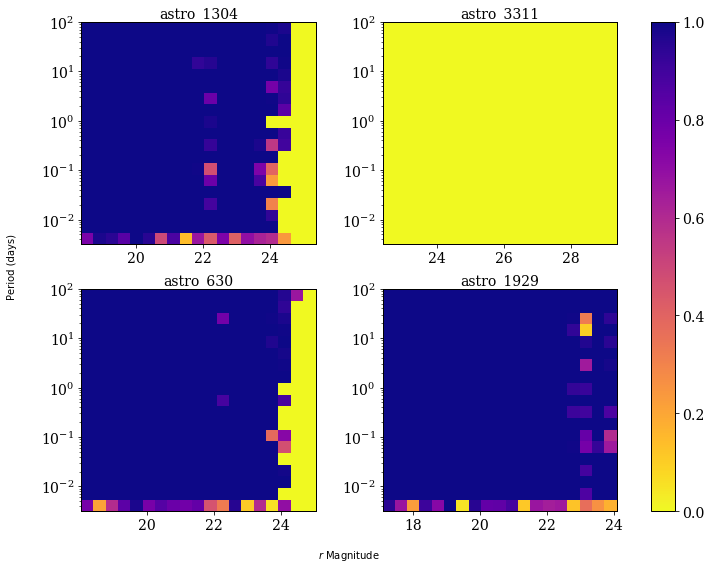

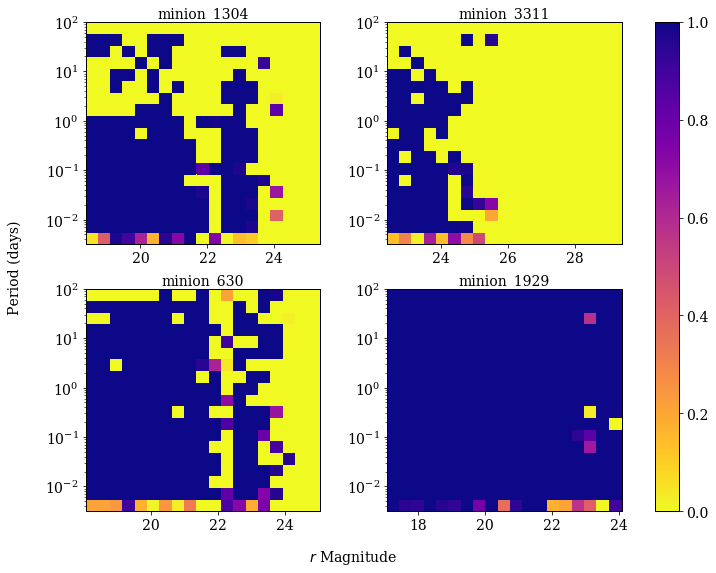

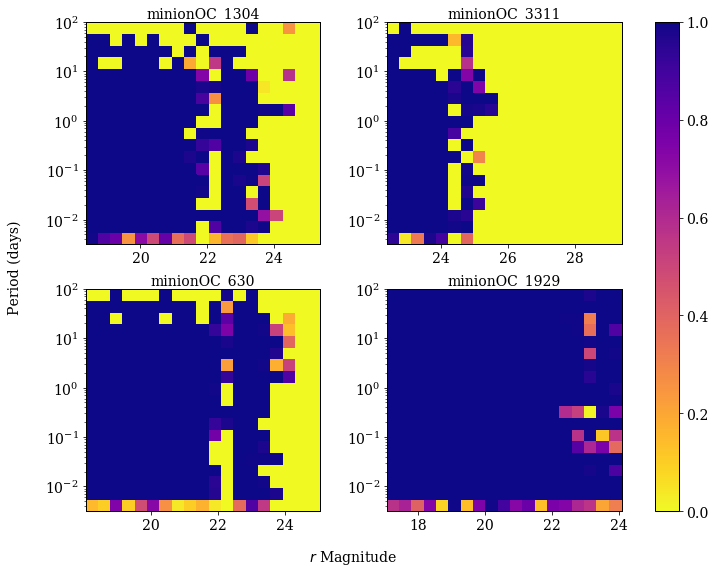

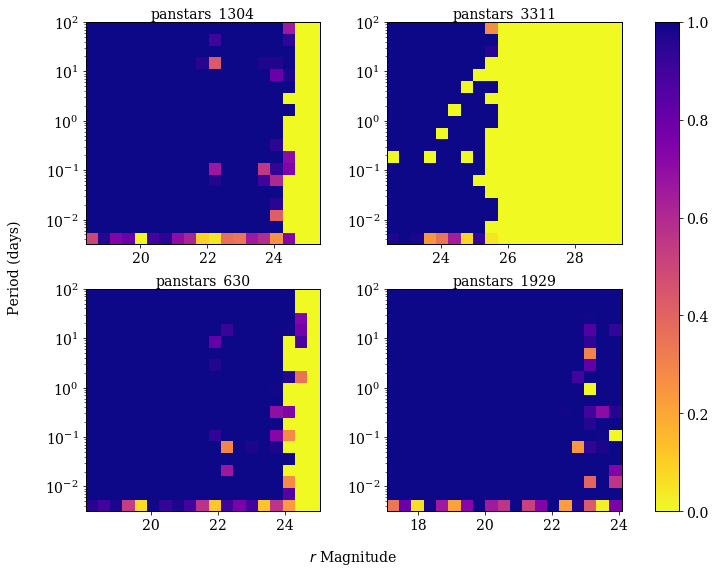

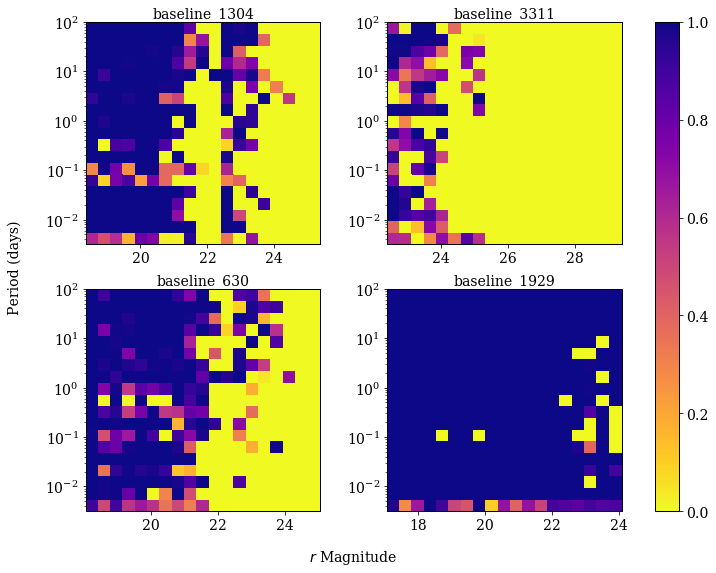

In [10]:
import matplotlib.gridspec as gridspec

#name = ['minion','minionOC','astro','panstars']
name = ['astro','minion','minionOC','panstars','baseline']
number = ['1322','1304','3311','630','1929'] # '169']

for x in range(len(name)):
    fig = plt.figure(figsize=(12,9))
    font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}


    gs=gridspec.GridSpec(2,2000)

    plt.rc('axes',linewidth=0)
    ydis = 1.07
    fakeaxis=fig.add_subplot(gs[:,:])
    fakeaxis.set_yticks([])
    fakeaxis.set_xticks([])

    ax_list = fig.axes

    plt.rc('font', **font)
    plt.rc('axes',linewidth=1)

    p1=fig.add_subplot(gs[0,0:700])
    im = p1.pcolor(fullRed[(x*len(name))+1],fullPeriod,sigLevels[(x*len(name))+1],cmap='plasma_r',vmin=0,vmax=1)
    p1.set_yscale('log')
    p1.set_ylabel(name[x]+'_'+number[1],rotation=0,va="top")
    p1.yaxis.set_label_coords(0.5,ydis)

    p2=fig.add_subplot(gs[0,900:1600])
    im = p2.pcolor(fullRed[(x*len(name))+2],fullPeriod,sigLevels[(x*len(name))+2],cmap='plasma_r',vmin=0,vmax=1)
    p2.set_yscale('log')
    p2.set_ylabel(name[x]+'_'+number[2],rotation=0,va="top")
    p2.yaxis.set_label_coords(0.5,ydis)

    p3=fig.add_subplot(gs[1,0:700])
    im = p3.pcolor(fullRed[(x*len(name))+3],fullPeriod,sigLevels[(x*len(name))+3],cmap='plasma_r',vmin=0,vmax=1)
    p3.set_yscale('log')
    p3.set_ylabel(name[x]+'_'+number[3],rotation=0,va="top")
    p3.yaxis.set_label_coords(0.5,ydis)

    p4=fig.add_subplot(gs[1,900:1600])
    im = p4.pcolor(fullRed[(x*len(name))+4],fullPeriod,sigLevels[(x*len(name))+4],cmap='plasma_r',vmin=0,vmax=1)
    p4.set_yscale('log')
    p4.set_ylabel(name[x]+'_'+number[4],rotation=0,va="top")
    p4.yaxis.set_label_coords(0.5,ydis)

    print(ax_list)

    #fig.colorbar(im, ax=ax.ravel().tolist())
    plt.sca(fakeaxis)
    plt.colorbar(im)
    fakeaxis.set_xlabel('$\it{r}$ Magnitude')
    fakeaxis.set_ylabel('Period (days)',labelpad=20)
    fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
    #fakeaxis.set_label_coords(0.5,-0.1)
    #label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
    fakeaxis.xaxis.set_label_coords(0.5, -0.075)

    plt.show()

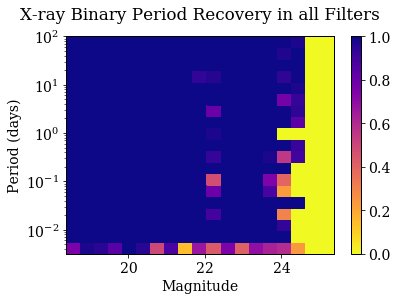

In [11]:
#%matplotlib

FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,sigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')

plt.show()


In [12]:
sigLevels = [[valuefile.fullSigLevelastro1322,valuefile.fullSigLevelastro1304,valuefile.fullSigLevelastro3311,valuefile.fullSigLevelastro630,valuefile.fullSigLevelastro1929],[valuefile.fullSigLevelminion1322,valuefile.fullSigLevelminion1304,valuefile.fullSigLevelminion3311,valuefile.fullSigLevelminion630,valuefile.fullSigLevelminion1929],[valuefile.fullSigLevelminionOC1322,valuefile.fullSigLevelminionOC1304,valuefile.fullSigLevelminionOC3311,valuefile.fullSigLevelminionOC630,valuefile.fullSigLevelminionOC1929],[valuefile.fullSigLevelpanstars1322,valuefile.fullSigLevelpanstars1304,valuefile.fullSigLevelpanstars3311,valuefile.fullSigLevelpanstars630,valuefile.fullSigLevelpanstars1929],[valuefile.fullSigLevelbaseline1322,valuefile.fullSigLevelbaseline1304,valuefile.fullSigLevelbaseline3311,valuefile.fullSigLevelbaseline630,valuefile.fullSigLevelbaseline1929]]

In [13]:
#average[0][0] = astroSig[0][0][0] + astroSig [0][0][1]
#newav = [[0.]*20]*20
newav = [[]]*20
counter = 0

averageSigLevels = []

for strat in range(len(sigLevels)):
    newav = [[]]*4
    for z in range(1,len(sigLevels[strat])):
        siglist = []
        for x in range(20):
            sigval = 0.
            for y in range(20):
                sigval += sigLevels[strat][z][x][y]
                #print(sigval,y)
            sigval = sigval/(y+1)
            siglist.append(sigval)
        newav[z-1] = siglist
    averageSigLevels.append(newav)

#print(averageSigLevels)

[[0.65259, 0.62126, 0.6989150000000001, 0.69477, 0.5811550000000001, 0.7585200000000001, 0.797495, 0.636235, 0.39966, 0.289995, 0.1365, 0.650205, 0.75576, 0.503105, 0.094915, 0.097235, 0.0, 0.0, 0.0, 0.0], [0.65691, 0.665105, 0.651, 0.6319549999999999, 0.557055, 0.283195, 0.410535, 0.07091, 0.094165, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.8606999999999999, 0.810615, 0.86202, 0.9452400000000001, 0.90869, 0.90073, 0.96219, 0.751285, 0.86631, 0.8478449999999998, 0.480795, 0.221855, 0.83604, 0.659335, 0.66344, 0.378995, 0.048905, 0.0, 0.0, 0.0], [0.999455, 0.997475, 0.9971650000000001, 1.0, 0.9981099999999999, 0.99681, 1.0, 0.9885349999999999, 0.9998250000000001, 0.9684699999999999, 0.9971499999999999, 0.9999500000000001, 1.0, 0.9586349999999999, 0.960435, 0.9757100000000001, 0.876205, 0.9499000000000001, 0.9443950000000001, 0.710845]]


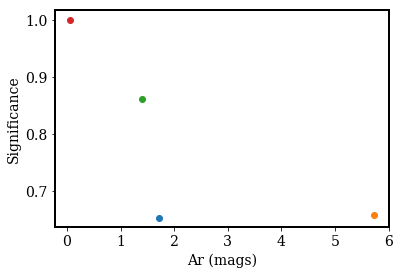

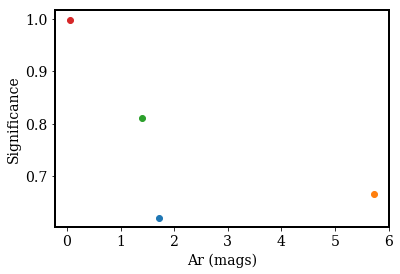

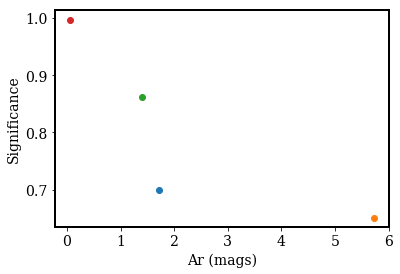

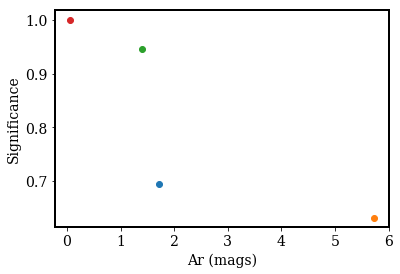

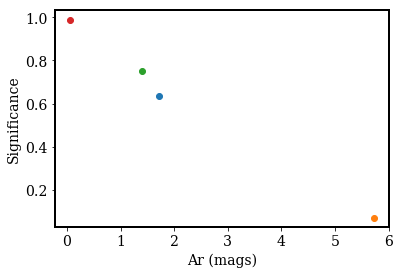

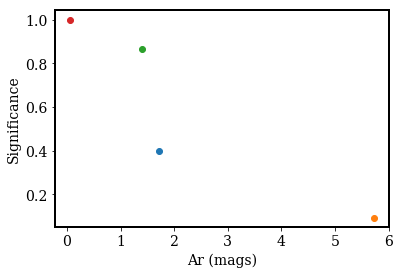

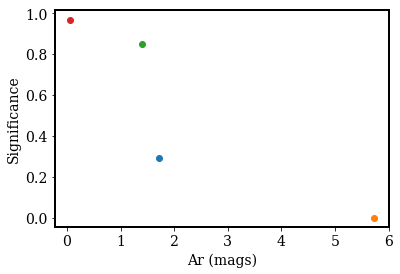

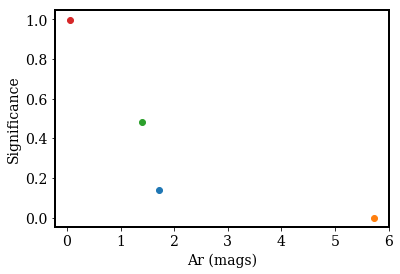

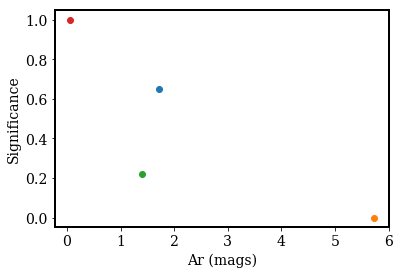

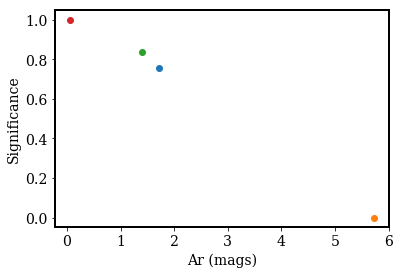

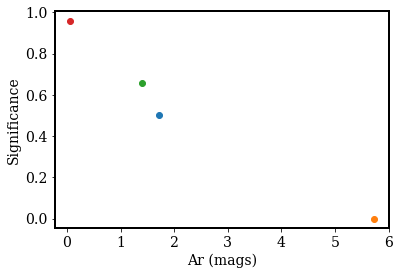

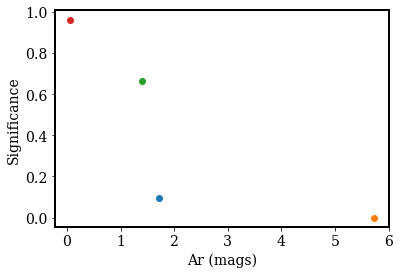

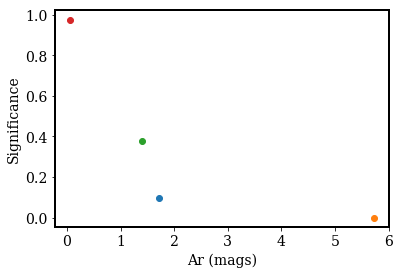

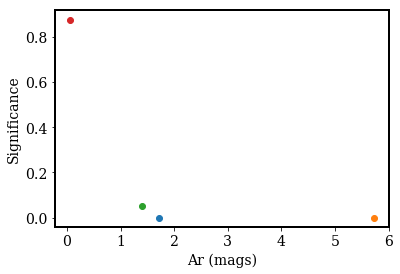

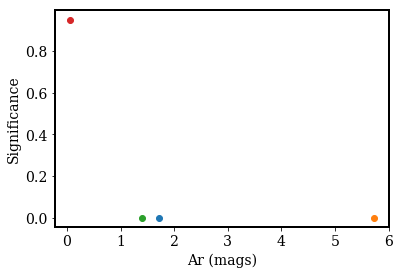

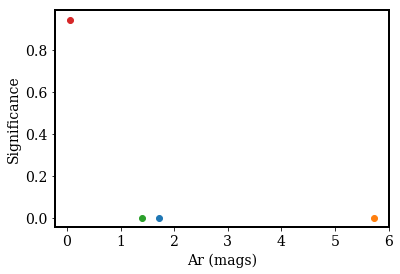

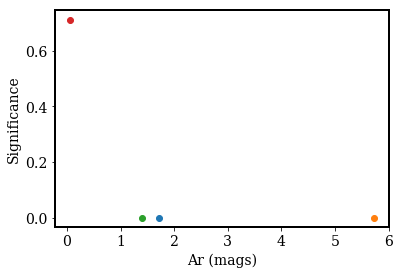

In [14]:
astrosigLevel = averageSigLevels[1]
print(astrosigLevel)
# astro1304,astro3311,astro630,astro1929
# 1.719 5.73 1.398 0.054


# 1304 1322 630 169 1929 3311
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
Ar = [1.719,5.73,1.398,0.054]
for x in range(len(astrosigLevel[0])):
    for y in range(len(astrosigLevel)):
        plt.plot(Ar[y],astrosigLevel[y][x],'o')
        
    plt.xlabel('Ar (mags)')
    plt.ylabel('Significance')
    plt.show()

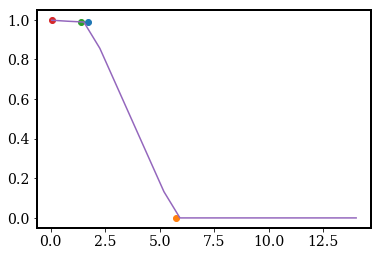

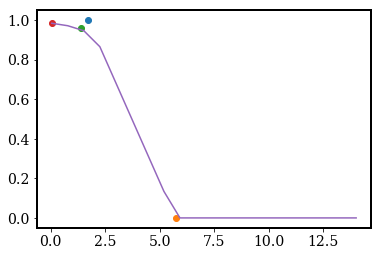

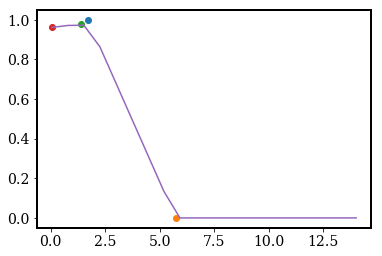

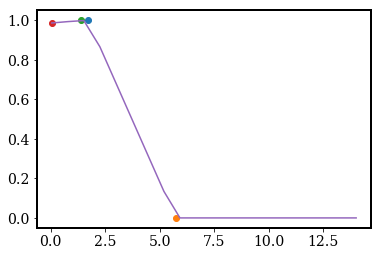

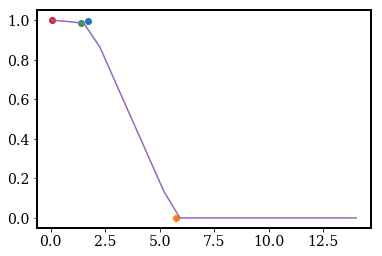

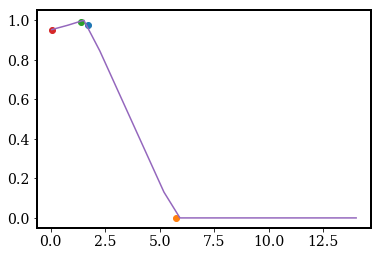

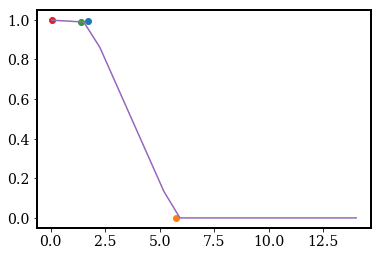

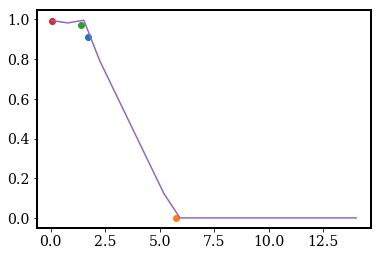

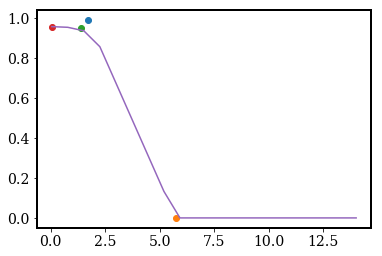

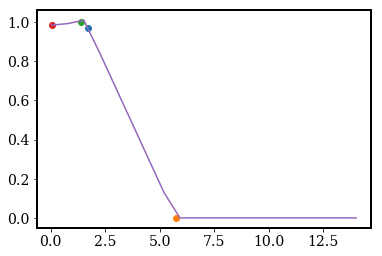

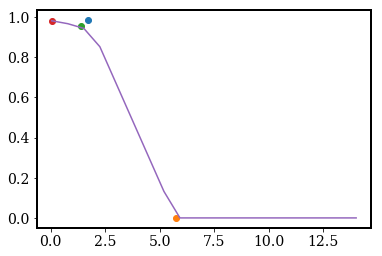

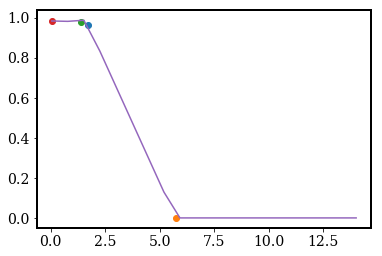

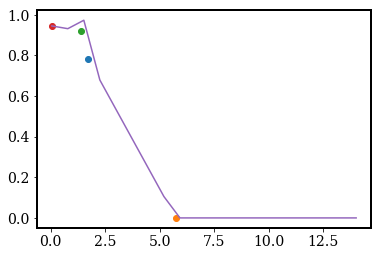

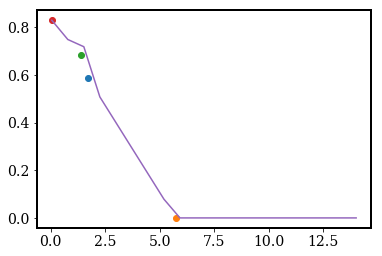

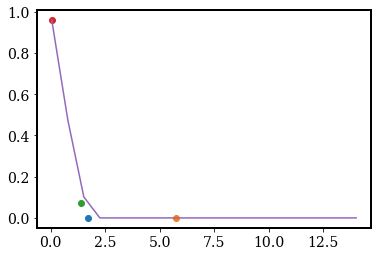

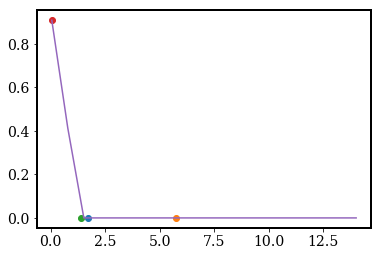

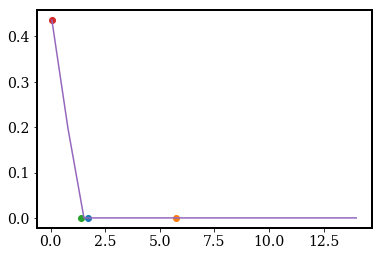

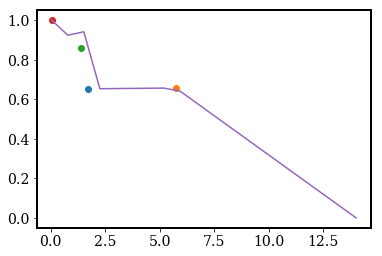

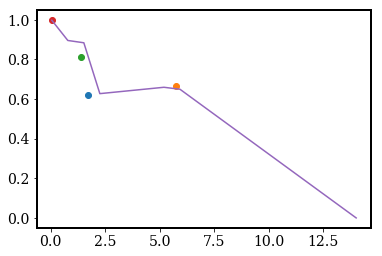

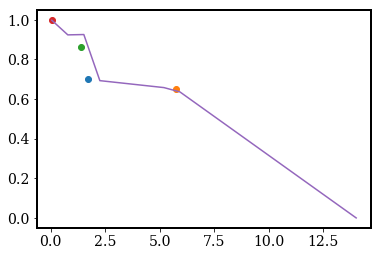

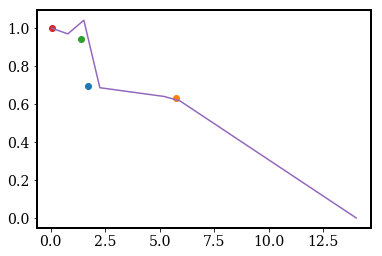

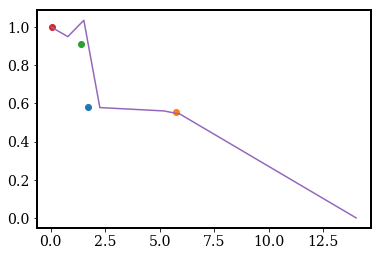

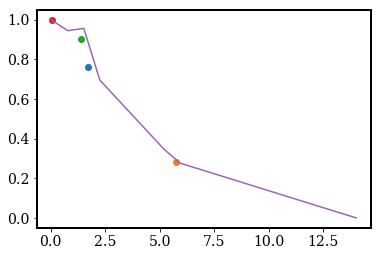

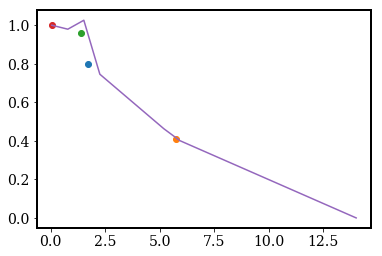

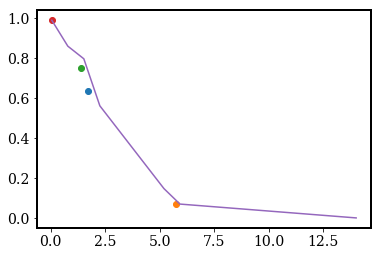

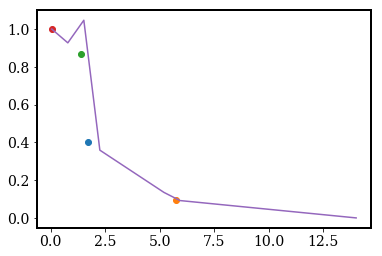

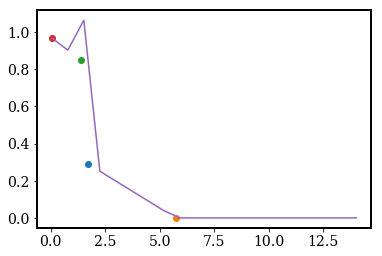

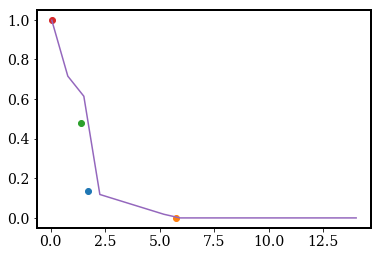

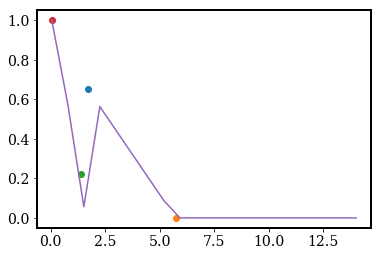

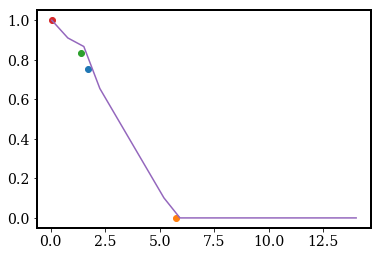

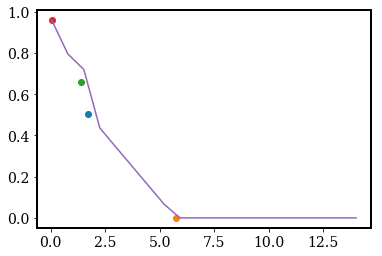

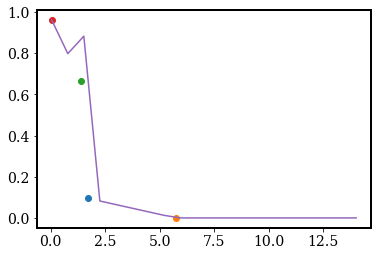

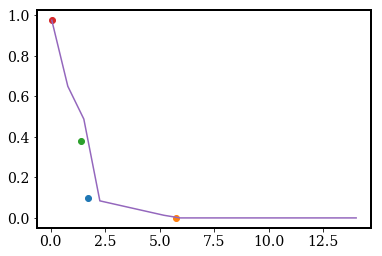

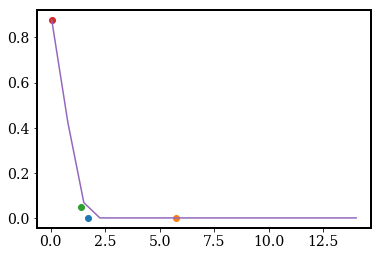

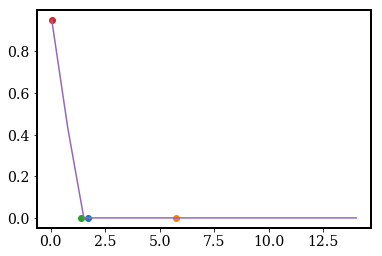

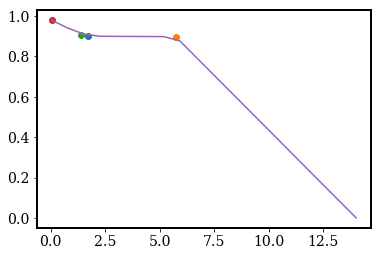

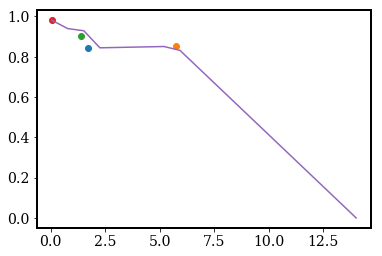

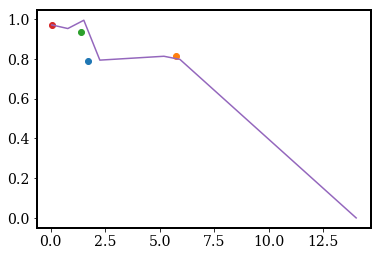

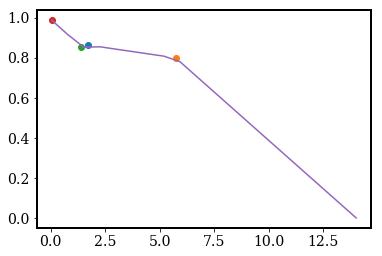

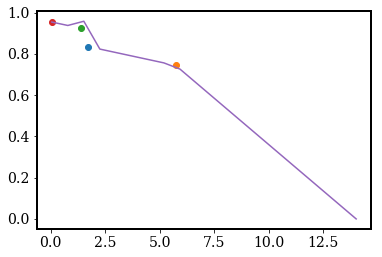

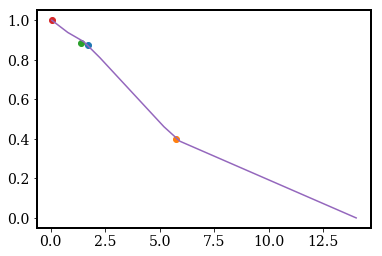

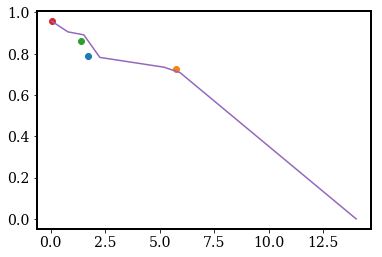

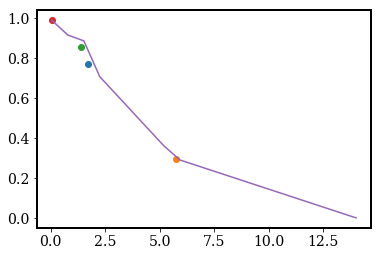

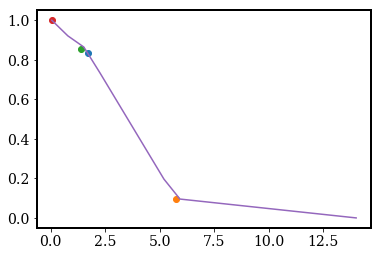

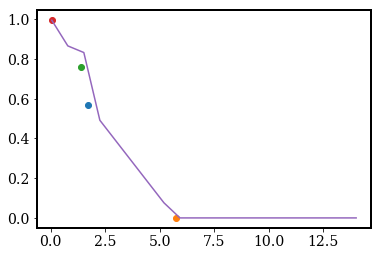

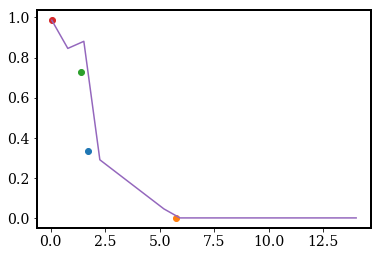

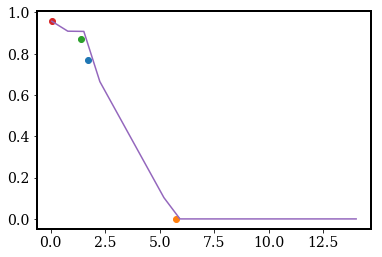

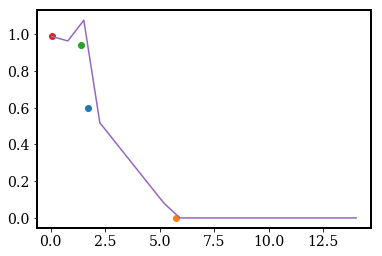

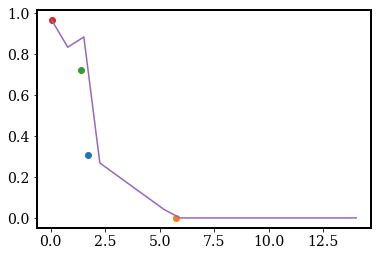

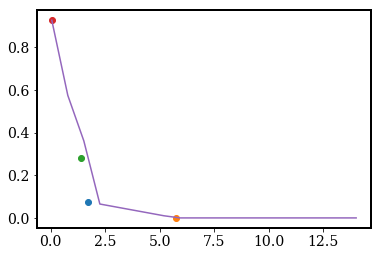

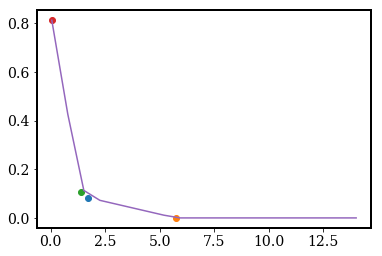

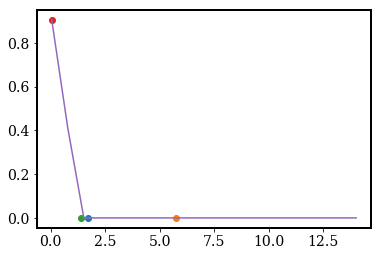

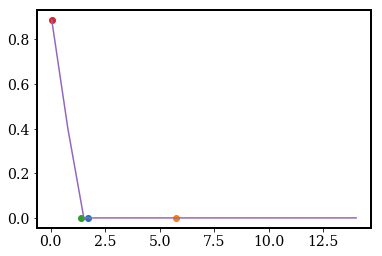

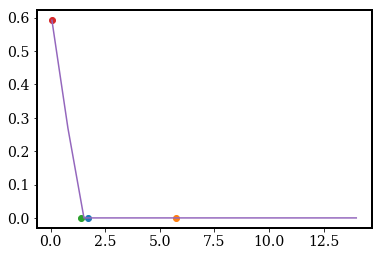

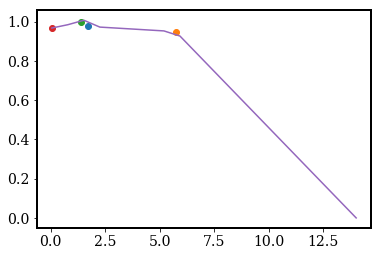

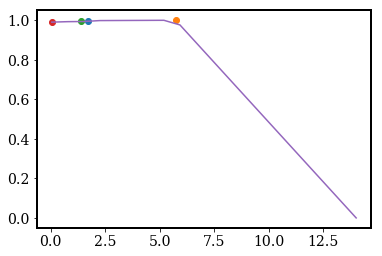

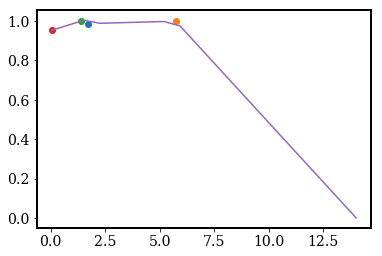

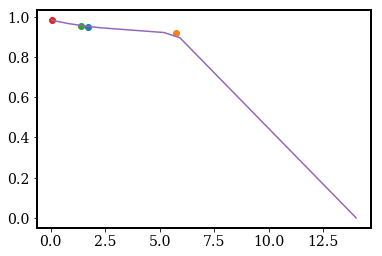

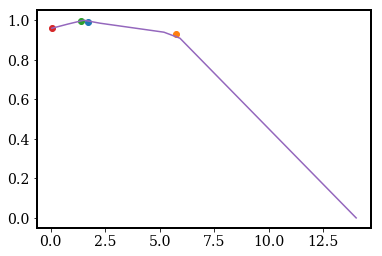

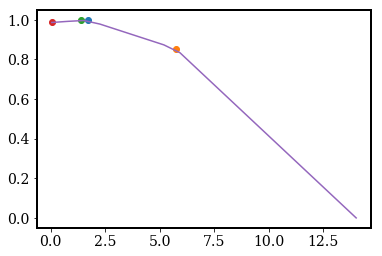

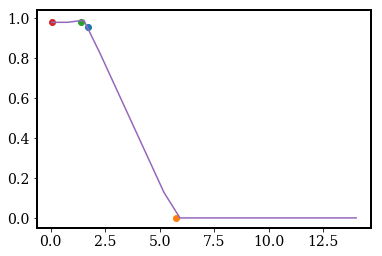

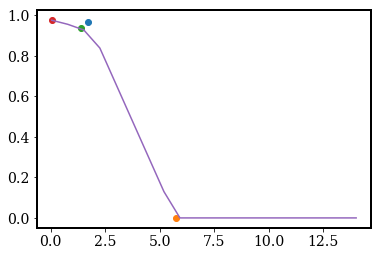

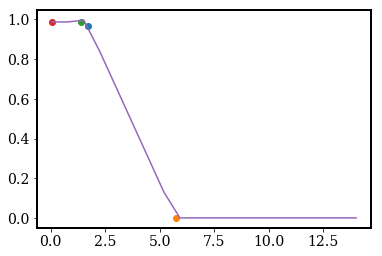

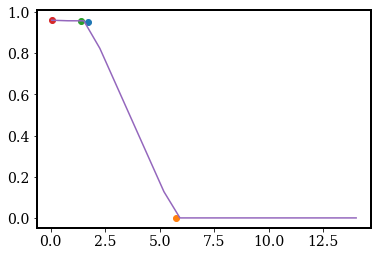

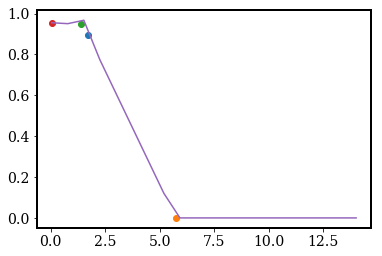

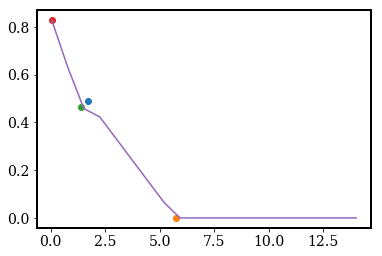

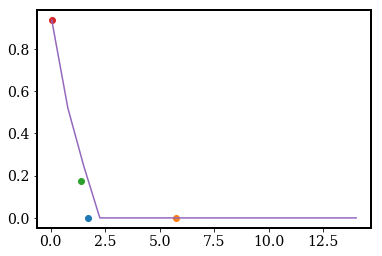

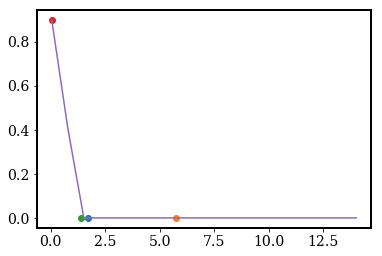

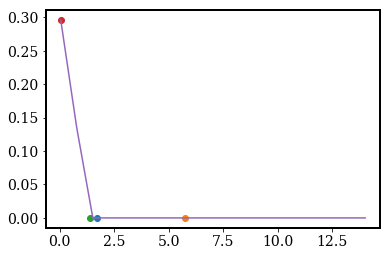

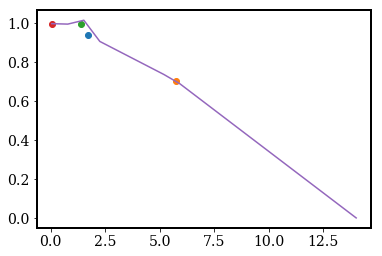

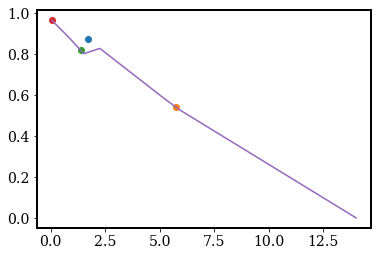

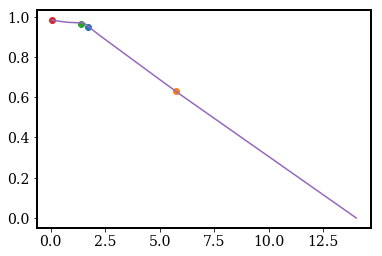

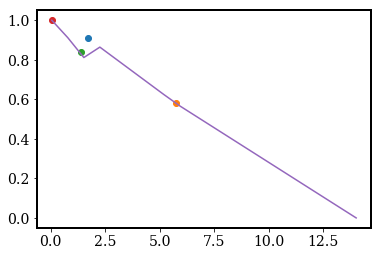

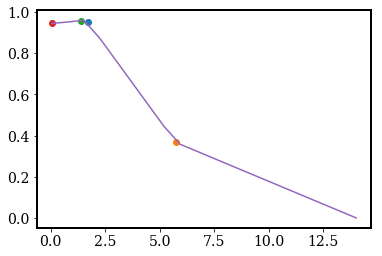

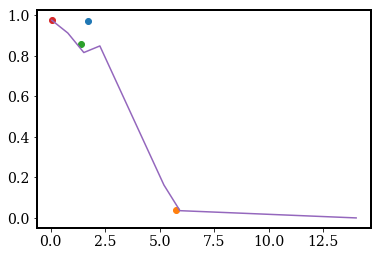

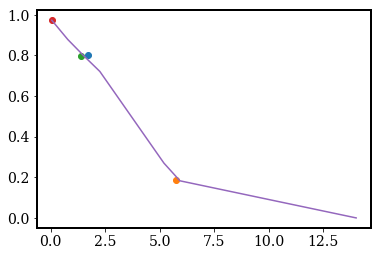

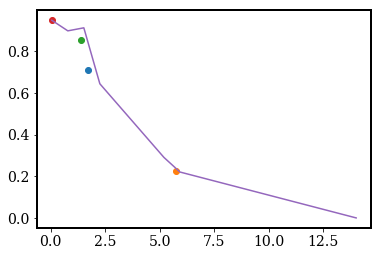

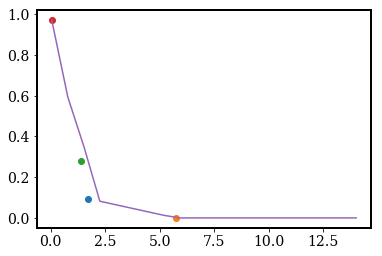

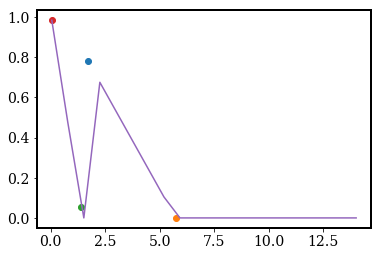

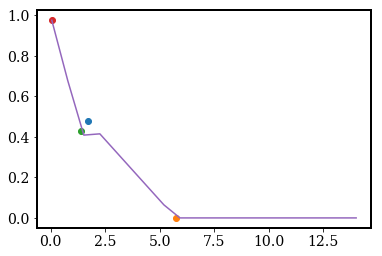

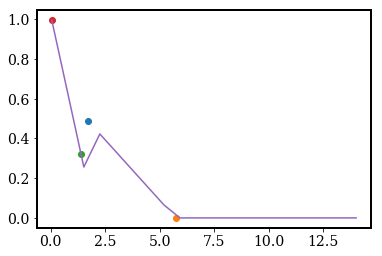

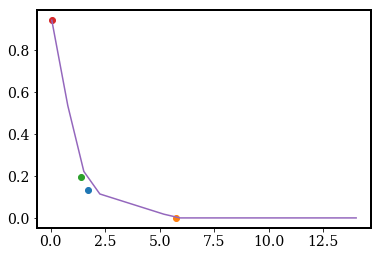

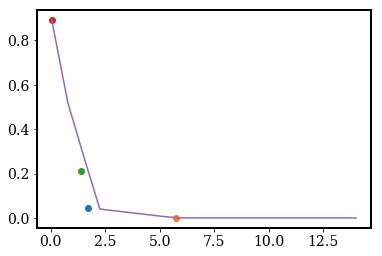

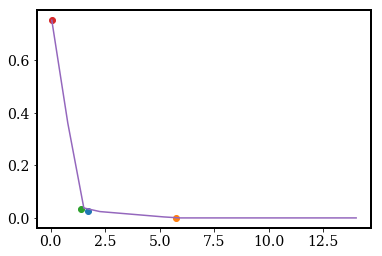

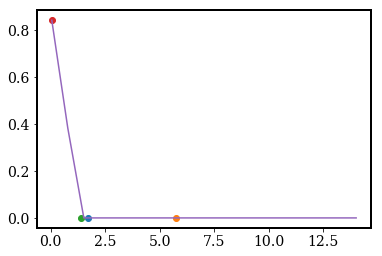

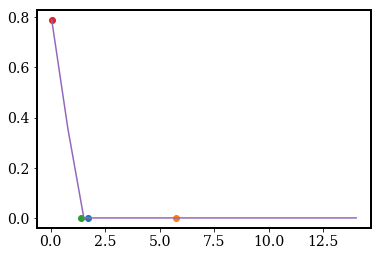

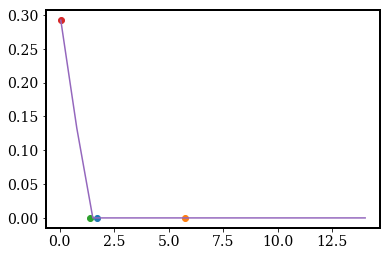

In [15]:
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
Ar = [1.719,5.73,1.398,0.054]

reddening = np.linspace(0.054,14,20)

fullSigLevelsRedPeriod = []
fullSigRedMag = []

for strat in range(len(averageSigLevels)):
    astrosigLevel = averageSigLevels[strat]
    reformat = [[]]*len(reddening)
    finalsig = []
    for i,item in enumerate(reddening):
        sig = []
        if item >= Ar[3] and item < Ar[2]:
            Y = [a-b for a,b in zip(astrosigLevel[2],astrosigLevel[3])]
            X = Ar[2]-Ar[3]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[3])) for y,slope in zip(astrosigLevel[3],m)]
        elif item >= Ar[2] and item < Ar[0]:
            Y = [a-b for a,b in zip(astrosigLevel[0],astrosigLevel[2])]
            X = Ar[2]-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[2])) for y,slope in zip(astrosigLevel[2],m)]
        elif item >= Ar[0] and item < Ar[1]:
            Y = [a-b for a,b in zip(astrosigLevel[1],astrosigLevel[0])]
            X = Ar[1]-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[0])) for y,slope in zip(astrosigLevel[0],m)]
        elif item >= Ar[1]:
            Y = [-x for x in astrosigLevel[1]]
            X = 14-Ar[1]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[1])) for y,slope in zip(astrosigLevel[1],m)]
        #print(sig)
        for cycle in range(len(sig)):
            if sig[cycle] < 0.:
                sig[cycle] = 0.
        #print(sig)
    #     if len(sig) != 20:
    #         print 'whoa now'
    #     for z in range(len(sig)):
    #         reformat[z][i] = sig[z]

        finalsig.append(sig)
    fullSigLevelsRedPeriod.append(finalsig)
    reformat = []
    for x in range(len(finalsig)):
        newsig = []
        for y in range(len(finalsig[x])):
            newsig.append(finalsig[y][x])
        reformat.append(newsig)
    fullSigRedMag.append(reformat)
    for x in range((20)):
        for y in range(len(astrosigLevel)):
            plt.plot(Ar[y],astrosigLevel[y][x],'o')
        plt.plot(reddening,reformat[x])
        plt.show()

In [16]:
fullRed = []
for i,item in enumerate(reddening):
    fullRed.append([item]*20)
#print(fullRed)

In [17]:
fullRed = [reddening]*20

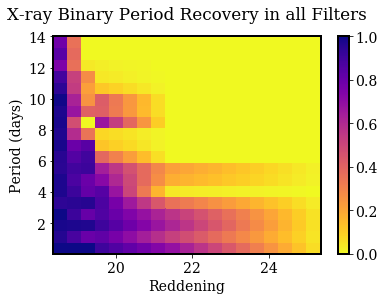

In [18]:
#%matplotlib

FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullRed,finalsig,cmap='plasma_r',vmin=0,vmax=1)
#plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Reddening')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')

plt.show()

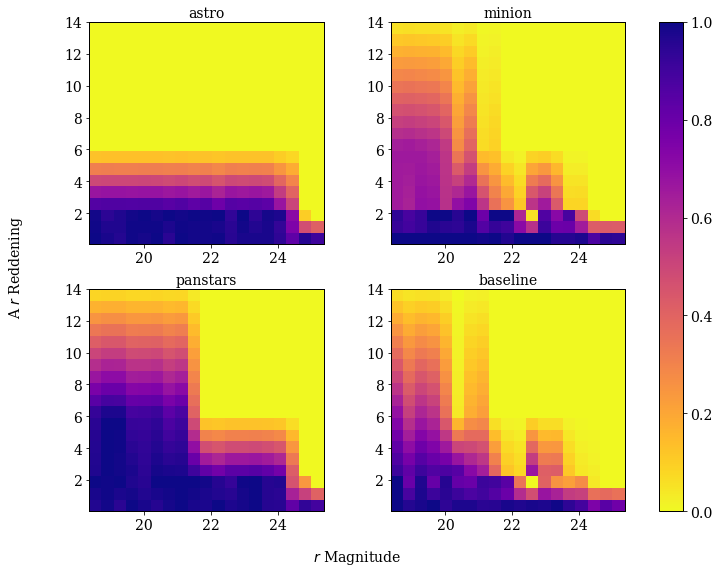

In [19]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullRed,fullSigRedMag[0],cmap='plasma_r',vmin=0,vmax=1)
#p1.set_yscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

#plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullRed,fullSigRedMag[1],cmap='plasma_r',vmin=0,vmax=1)
#p2.set_yscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullRed,fullSigRedMag[3],cmap='plasma_r',vmin=0,vmax=1)
#p3.set_yscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullRed,fullSigRedMag[4],cmap='plasma_r',vmin=0,vmax=1)
#p4.set_yscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print(ax_list)

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_ylabel('A $\it{r}$ Reddening')
fakeaxis.set_xlabel('$\it{r}$ Magnitude',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

In [20]:
print((fullSigRedMag[2][0]))

[0.97862000000000005, 0.93976278273809521, 0.9105333021806854, 0.89924077412116676, 0.89883177636499623, 0.89842277860882569, 0.89801378085265526, 0.89760478309648473, 0.87603876299879091, 0.79639887545344623, 0.71675898790810155, 0.63711910036275698, 0.55747921281741242, 0.47783932527206774, 0.39819943772672312, 0.31855955018137849, 0.23891966263603392, 0.15927977509068925, 0.079639887545344679, 0.0]


In [21]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
rM = rfromRV(4.04,4.680)
#rM = rfromRV(2.67,3.59)
print(rM)

4.2726


In [22]:
bayestar = BayestarQuery(max_samples=2)
m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')

In [211]:
def findWeight(l,b,r,rM,bayestar=bayestar,m=m):
    rogrim,rtgrim,rdgrim,rzgrim,rmgrim,gamma,bulge,disc,sphere,Rc,q = 1.,1.9,3.5,0.41,6.5,1.8,1.,2.,0.3,2.8,0.6
    milkyWayRadius = 15.
    scaleHeight = 3.5
    bSphere = 7.669
    
    magrange = np.linspace(13,20,20)
    redrange = np.linspace(0.054,14,20)
    missingl = 'nan'
    missingb = 'nan'
    ebv=[]
    #m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')
    
    R = 2.273
    Rd = 3 #kpc
    
    lsave = l

    if l > 250. and l < 355.:
        if l < 303:
            l += -51
        else:
            l += 51
    coords = SkyCoord(l*units.deg, b*units.deg,distance=(r*1000)*units.pc, frame='galactic')
    #ebv = (m.ebv(l,b, frame='galactic', unit='degree', interpolate=False))
    ebv = (bayestar(coords, mode='median'))
    string = str(ebv)
    
    if 'nan' in string:
        newl = l 
        while 'nan' in string:
            newl += -1
            coords = SkyCoord((newl)*units.deg, b*units.deg,distance=(r*1000)*units.pc, frame='galactic')
            ebv = 0 # = (bayestar(coords, mode='median'))
            #ebv = (m.ebv(coords, mode='median')) # calculates reddening in galactic plane
            missingl = l
            missingb = b
            print(l,b,'broken l,b')
            string = str(ebv)
            #print(string)
    
    l = lsave
    mag = (5*np.log10((r*(1000/10)))+rM)
    reddening = ((ebv)*R)
    
    radius = r * np.cos(np.deg2rad(b))
    thickness = r * np.sin(np.deg2rad(b))
                   
    xlen = (((radius*np.cos(np.deg2rad(l)))-8))
    ylen = ((radius*np.sin(np.deg2rad(l))))
    dist = ((xlen**2)+(ylen**2))**0.5
    rad = dist/np.cos(np.deg2rad(b))
    
    Bulge = (bulge*(((((dist**2)+((thickness**2)/(q**2)))**0.5)/rogrim)**(-gamma))*np.exp(-(((dist**2)+((thickness**2)/(q**2)))/rtgrim**2)))
    Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(thickness)/rzgrim))))
    Sphere = (sphere*(np.exp(-bSphere*((rad/Rc)**0.25))))/((rad/Rc)**(7/8))
    bp = Bulge + Disc + Sphere
    
#     print(Bulge)
#     print(Disc)
#     print(Sphere)
    
    if Bulge > 1 or Disc > 1 or Sphere > 1:
        print(Sphere,Bulge,Disc)
        print('dist',dist,'thickness',thickness)
        print(r,l,b)
    
    magbin = -1
    redbin = -1
    for x,item in enumerate(magrange):
        if ebv <= redrange[0]:
            redbin = 0     
        if x < 19:
            if mag >= magrange[x] and mag <= magrange[x+1]:
                magbin = x
            if ebv >= redrange[x] and ebv <= redrange[x+1]:
                redbin = x
        else:
            if mag >= magrange[x] and mag <= magrange[19]:
                magbin = x
            if ebv >= redrange[x] and ebv <= redrange[19]:
                redbin = x
         
    
    results = {}
    results[0] = [xlen,ylen,thickness]
    results[1] = mag
    results[2] = magbin
    results[3] = ebv
    results[4] = redbin
    results[5] = bp
    results[6] = missingl
    results[7] = missingb
    
    return results

In [178]:
sigLevels = [[valuefile.fullSigLevelastro1322,valuefile.fullSigLevelastro1304,valuefile.fullSigLevelastro3311,valuefile.fullSigLevelastro630,valuefile.fullSigLevelastro1929],[valuefile.fullSigLevelminion1322,valuefile.fullSigLevelminion1304,valuefile.fullSigLevelminion3311,valuefile.fullSigLevelminion630,valuefile.fullSigLevelminion1929],[valuefile.fullSigLevelminionOC1322,valuefile.fullSigLevelminionOC1304,valuefile.fullSigLevelminionOC3311,valuefile.fullSigLevelminionOC630,valuefile.fullSigLevelminionOC1929],[valuefile.fullSigLevelpanstars1322,valuefile.fullSigLevelpanstars1304,valuefile.fullSigLevelpanstars3311,valuefile.fullSigLevelpanstars630,valuefile.fullSigLevelpanstars1929],[valuefile.fullSigLevelbaseline1322,valuefile.fullSigLevelbaseline1304,valuefile.fullSigLevelbaseline3311,valuefile.fullSigLevelbaseline630,valuefile.fullSigLevelbaseline1929]]

In [179]:
astrosigLevel = sigLevels[0]

0.000983703037972 1.05076397922 0.000863538679897
dist 0.866666666667 thickness 0.0
8.86666666667 0.0 0.0
354.157894737 0.0 broken l,b
354.157894737 0.0 broken l,b
354.157894737 0.0 broken l,b
354.157894737 0.0 broken l,b
354.157894737 0.0 broken l,b
354.157894737 0.0 broken l,b
354.157894737 0.0 broken l,b
354.157894737 0.0 broken l,b
354.157894737 0.0 broken l,b
0.000983703037972 1.05076397922 0.000863538679897
dist 0.866666666667 thickness 0.0
8.86666666667 360.0 0.0
3.40792012215


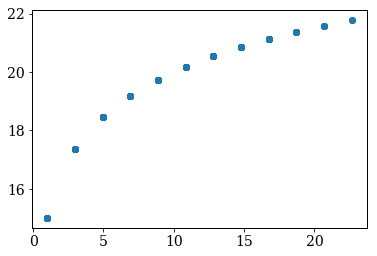

In [212]:
t0 = time.time()
noSteps = 20
#b = [0]
b = np.linspace(-90.,90,noSteps)#18)
l = np.linspace(0., 360., noSteps)#181)
radialDistance = np.linspace(1.,30.5,16)#15)
b = [0.]
dist = []
coords = []
mag = []
finalResult = []

rM = 5
xcoords = []
ycoords = []
colour = []
red =[]

magrange = np.linspace(13,22,20)
resultList = []
for x,angle in enumerate(l):
    resultPerB = []
    for lat,lattitude in enumerate(b):
        resultPerD = []
        for y,item in enumerate(radialDistance):
            radius = item * np.cos(np.deg2rad(lattitude))
            xlen = (((radius*np.cos(np.deg2rad(angle)))-8))
            ylen = ((radius*np.sin(np.deg2rad(angle))))
            Dist = ((xlen**2)+(ylen**2))**0.5
            width = Dist
            thickness = item * np.sin(np.deg2rad(lattitude))
            ### change thickness, maybe
            if abs(width) < 15 and abs(thickness) < 3.5:
                result = findWeight(angle,lattitude,item,rM)
                resultList.append(result)
                coords.append(result[0])
                distance = ((result[0][0]**2)+(result[0][1]**2))**0.5
                dist.append(item)
                mag.append(result[1])
                if lattitude == 0.:
                    xcoords.append(xlen)
                    ycoords.append(ylen)
                    colour.append(result[5])
                    red.append(result[3])
# #                     print('thick boye', thickness)
#                     print('wide boye',width)
    
                
                resultPerD.append(result)
        resultPerB.append(resultPerD)
    finalResult.append(resultPerB)
t1 =time.time()
print(t1-t0)
plt.plot(dist,mag,'o') 
plt.show()

In [205]:
bnotzero = [{0: [-8.0, 0.0, -1.0], 1: 15.0, 2: 5, 3: 0.033019997, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 0.0, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.033062227, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-7.8354054097192662, 0.0, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.0083887737374611551, 6: 0.0, 7: -80.526315789473685}, {0: [-7.5117027155004887, 0.0, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 7.8322368271542696e-05, 6: 0.0, 7: -80.526315789473685}, {0: [-7.6753005307953162, 0.0, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.0095284500183514202, 6: 0.0, 7: -71.05263157894737}, {0: [-7.0367249080261054, 0.0, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00011421268854498098, 6: 0.0, 7: -71.05263157894737}, {0: [-7.5240526069629263, 0.0, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.011500734208970147, 6: 0.0, 7: -61.578947368421055}, {0: [-6.5880227339900159, 0.0, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00019883952992978031, 6: 0.0, 7: -61.578947368421055}, {0: [-7.3857872873103325, 0.0, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.014675864717686822, 6: 0.0, 7: -52.10526315789474}, {0: [-6.1778356190206516, 0.0, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0004037899529731264, 6: 0.0, 7: -52.10526315789474}, {0: [-7.2642760893268683, 0.0, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.019670412719557277, 6: 0.0, 7: -42.631578947368425}, {0: [-5.8173523983363769, 0.0, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0009384187883030267, 6: 0.0, 7: -42.631578947368425}, {0: [-4.3704287073458836, 0.0, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 6.6162638873161806e-05, 6: 0.0, 7: -42.631578947368425}, {0: [-7.1628335217374719, 0.0, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.027476425499424299, 6: 0.0, 7: -33.15789473684211}, {0: [-5.5164061144878325, 0.0, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.002456013130487429, 6: 0.0, 7: -33.15789473684211}, {0: [-3.8699787072381922, 0.0, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.00022377511503093335, 6: 0.0, 7: -33.15789473684211}, {0: [-7.0842266733449426, 0.0, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.039644278927967715, 6: 0.0, 7: -23.684210526315795}, {0: [-5.2832057975899964, 0.0, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0070977627041125336, 6: 0.0, 7: -23.684210526315795}, {0: [-3.4821849218350502, 0.0, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.0010870223178568545, 6: 0.0, 7: -23.684210526315795}, {0: [-1.6811640460801041, 0.0, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.00040253046133787319, 6: 0.0, 7: -23.684210526315795}, {0: [-7.0305997340606696, 0.0, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.058509577324044555, 6: 0.0, 7: -14.21052631578948}, {0: [-5.1241125443799866, 0.0, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.02208346962974015, 6: 0.0, 7: -14.21052631578948}, {0: [-3.2176253546993037, 0.0, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.0072801866246076843, 6: 0.0, 7: -14.21052631578948}, {0: [-1.3111381650186207, 0.0, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.0095030849364222923, 6: 0.0, 7: -14.21052631578948}, {0: [0.59534902466206319, 0.0, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0, 4: 0, 5: 0.0038490236731792888, 6: 0.0, 7: -14.21052631578948}, {0: [2.5018362143427453, 0.0, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0, 4: 0, 5: 0.00031542770988835108, 6: 0.0, 7: -14.21052631578948}, {0: [4.4083234040234274, 0.0, -3.1422142354022302], 1: 20.536049848239344, 2: -1, 3: 0, 4: 0, 5: 0.00011320885273844467, 6: 0.0, 7: -14.21052631578948}, {0: [-7.0034155069933304, 0.0, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.087410548359569448, 6: 0.0, 7: -4.7368421052631646}, {0: [-5.0434660040802122, 0.0, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.071865058377463528, 6: 0.0, 7: -4.7368421052631646}, {0: [-3.0835165011670949, 0.0, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.045366760721589211, 6: 0.0, 7: -4.7368421052631646}, {0: [-1.1235669982539784, 0.0, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.27584257942348211, 6: 0.0, 7: -4.7368421052631646}, {0: [0.83638250465913977, 0.0, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0, 4: 0, 5: 0.27060825009848349, 6: 0.0, 7: -4.7368421052631646}, {0: [2.7963320075722553, 0.0, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0, 4: 0, 5: 0.01783469765326395, 6: 0.0, 7: -4.7368421052631646}, {0: [4.7562815104853726, 0.0, -1.0570156220458553], 1: 20.536049848239344, 2: -1, 3: 0, 4: 0, 5: 0.010037100171554953, 6: 0.0, 7: -4.7368421052631646}, {0: [6.7162310133984899, 0.0, -1.2194216681414425], 1: 20.846412357517035, 2: -1, 3: 0, 4: 0, 5: 0.0057185531552788448, 6: 0.0, 7: -4.7368421052631646}, {0: [8.6761805163116108, 0.0, -1.3818277142370297], 1: 21.117912312126784, 2: -1, 3: 0, 4: 0, 5: 0.0027364337997975493, 6: 0.0, 7: -4.7368421052631646}, {0: [10.636130019224726, 0.0, -1.5442337603326168], 1: 21.359208032682496, 2: -1, 3: 0, 4: 0, 5: 0.0012092274426532905, 6: 0.0, 7: -4.7368421052631646}, {0: [12.596079522137842, 0.0, -1.7066398064282038], 1: 21.576352173892957, 2: -1, 3: 0, 4: 0, 5: 0.00051256115775908317, 6: 0.0, 7: -4.7368421052631646}, {0: [14.556029025050961, 0.0, -1.869045852523791], 1: 21.773742597804194, 2: -1, 3: 0, 4: 0, 5: 0.00021225033271609172, 6: 0.0, 7: -4.7368421052631646}, {0: [-7.0034155069933304, 0.0, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.1902, 4: 0, 5: 0.087410548359569518, 6: 'nan', 7: 'nan'}, {0: [-5.0434660040802122, 0.0, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 1.2509968, 4: 1, 5: 0.071865058377463653, 6: 'nan', 7: 'nan'}, {0: [-3.0835165011670949, 0.0, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 1.2939196, 4: 1, 5: 0.045366760721589336, 6: 'nan', 7: 'nan'}, {0: [-1.1235669982539784, 0.0, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 1.2992018, 4: 1, 5: 0.27584257942348323, 6: 'nan', 7: 'nan'}, {0: [0.83638250465913977, 0.0, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 1.2998643, 4: 1, 5: 0.27060825009848527, 6: 'nan', 7: 'nan'}, {0: [2.7963320075722553, 0.0, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 1.2998956, 4: 1, 5: 0.017834697653264061, 6: 'nan', 7: 'nan'}, {0: [4.7562815104853726, 0.0, 1.057015622045852], 1: 20.536049848239344, 2: -1, 3: 1.299926, 4: 1, 5: 0.010037100171555041, 6: 'nan', 7: 'nan'}, {0: [6.7162310133984899, 0.0, 1.2194216681414387], 1: 20.846412357517035, 2: -1, 3: 1.2999353, 4: 1, 5: 0.005718553155278896, 6: 'nan', 7: 'nan'}, {0: [8.6761805163116108, 0.0, 1.3818277142370257], 1: 21.117912312126784, 2: -1, 3: 1.2999424, 4: 1, 5: 0.0027364337997975762, 6: 'nan', 7: 'nan'}, {0: [10.636130019224726, 0.0, 1.5442337603326122], 1: 21.359208032682496, 2: -1, 3: 1.2999473, 4: 1, 5: 0.0012092274426533044, 6: 'nan', 7: 'nan'}, {0: [12.596079522137842, 0.0, 1.7066398064281987], 1: 21.576352173892957, 2: -1, 3: 1.2999523, 4: 1, 5: 0.00051256115775908859, 6: 'nan', 7: 'nan'}, {0: [14.556029025050961, 0.0, 1.8690458525237854], 1: 21.773742597804194, 2: -1, 3: 1.2999582, 4: 1, 5: 0.00021225033271609432, 6: 'nan', 7: 'nan'}, {0: [-7.0305997340606696, 0.0, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.32501, 4: 0, 5: 0.058509577324044611, 6: 'nan', 7: 'nan'}, {0: [-5.1241125443799866, 0.0, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.50878888, 4: 0, 5: 0.022083469629740188, 6: 'nan', 7: 'nan'}, {0: [-3.2176253546993028, 0.0, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.50881469, 4: 0, 5: 0.0072801866246077034, 6: 'nan', 7: 'nan'}, {0: [-1.3111381650186198, 0.0, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.50883192, 4: 0, 5: 0.0095030849364223513, 6: 'nan', 7: 'nan'}, {0: [0.59534902466206496, 0.0, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.50883973, 4: 0, 5: 0.0038490236731793023, 6: 'nan', 7: 'nan'}, {0: [2.5018362143427453, 0.0, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.50884849, 4: 0, 5: 0.00031542770988835227, 6: 'nan', 7: 'nan'}, {0: [4.4083234040234291, 0.0, 3.1422142354022271], 1: 20.536049848239344, 2: -1, 3: 0.50886005, 4: 0, 5: 0.00011320885273844521, 6: 'nan', 7: 'nan'}, {0: [-7.0842266733449426, 0.0, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.39748999, 4: 0, 5: 0.039644278927967735, 6: 'nan', 7: 'nan'}, {0: [-5.2832057975899964, 0.0, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.41855532, 4: 0, 5: 0.0070977627041125457, 6: 'nan', 7: 'nan'}, {0: [-3.4821849218350494, 0.0, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.41870433, 4: 0, 5: 0.001087022317856858, 6: 'nan', 7: 'nan'}, {0: [-1.6811640460801041, 0.0, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.41879001, 4: 0, 5: 0.00040253046133787427, 6: 'nan', 7: 'nan'}, {0: [-7.162833521737471, 0.0, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.189445, 4: 0, 5: 0.027476425499424348, 6: 'nan', 7: 'nan'}, {0: [-5.5164061144878316, 0.0, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.18952529, 4: 0, 5: 0.0024560131304874333, 6: 'nan', 7: 'nan'}, {0: [-3.8699787072381922, 0.0, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.18955863, 4: 0, 5: 0.00022377511503093395, 6: 'nan', 7: 'nan'}, {0: [-7.2642760893268683, 0.0, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.17600501, 4: 0, 5: 0.019670412719557277, 6: 'nan', 7: 'nan'}, {0: [-5.817352398336376, 0.0, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.17614281, 4: 0, 5: 0.00093841878830302832, 6: 'nan', 7: 'nan'}, {0: [-4.3704287073458836, 0.0, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.17619932, 4: 0, 5: 6.6162638873161874e-05, 6: 'nan', 7: 'nan'}, {0: [-7.3857872873103325, 0.0, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.017595001, 4: 0, 5: 0.014675864717686822, 6: 'nan', 7: 'nan'}, {0: [-6.1778356190206516, 0.0, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.017680001, 4: 0, 5: 0.0004037899529731264, 6: 'nan', 7: 'nan'}, {0: [-7.5240526069629263, 0.0, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.01101, 4: 0, 5: 0.011500734208970147, 6: 'nan', 7: 'nan'}, {0: [-6.5880227339900141, 0.0, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.011058067, 4: 0, 5: 0.00019883952992978034, 6: 'nan', 7: 'nan'}, {0: [-7.6753005307953162, 0.0, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.0092200004, 4: 0, 5: 0.0095284500183514202, 6: 'nan', 7: 'nan'}, {0: [-7.0367249080261036, 0.0, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.0092894537, 4: 0, 5: 0.00011421268854498119, 6: 'nan', 7: 'nan'}, {0: [-7.8354054097192662, 0.0, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.037055001, 4: 0, 5: 0.0083887737374611551, 6: 'nan', 7: 'nan'}, {0: [-7.5117027155004887, 0.0, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.03709, 4: 0, 5: 7.8322368271542696e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 0.0, 1.0], 1: 15.0, 2: 5, 3: 0.00856, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 0.0, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0086194538, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.9882108282318008e-17, -1.0], 1: 15.0, 2: 5, 3: 0.033019997, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 5.8983587904210091e-17, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.033062227, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-7.8443235986218305, 0.053443776098116673, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.016860001, 4: 0, 5: 0.0083750464705572847, 6: 'nan', 7: 'nan'}, {0: [-7.5381600092447627, 0.15854986909107946, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.016993614, 4: 0, 5: 7.7946131503769465e-05, 6: 'nan', 7: 'nan'}, {0: [-7.6928936436551663, 0.10542974530180321, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.01224, 4: 0, 5: 0.0094978439486217668, 6: 'nan', 7: 'nan'}, {0: [-7.0889178095103258, 0.31277491106201621, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.012348067, 4: 0, 5: 0.00011315338875117587, 6: 'nan', 7: 'nan'}, {0: [-7.5498407495230673, 0.15453986588849061, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.01568, 4: 0, 5: 0.011446922774083513, 6: 'nan', 7: 'nan'}, {0: [-6.6645275569184328, 0.45846826880252212, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.015762227, 4: 0, 5: 0.00019623794759485559, 6: 'nan', 7: 'nan'}, {0: [-7.4190670262663936, 0.19943454178910389, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.01128, 4: 0, 5: 0.014587889559657806, 6: 'nan', 7: 'nan'}, {0: [-6.2765655112569689, 0.59165580730767486, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.01135084, 4: 0, 5: 0.00039746867174296268, 6: 'nan', 7: 'nan'}, {0: [-7.3041396401539345, 0.23888916327675977, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.046535, 4: 0, 5: 0.019530269668408172, 6: 'nan', 7: 'nan'}, {0: [-5.9356142657900062, 0.70870451772105392, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.046697229, 4: 0, 5: 0.00092289169747359744, 6: 'nan', 7: 'nan'}, {0: [-4.567088891426077, 1.1785198721653483, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.046714313, 4: 0, 5: 6.1853513617799583e-05, 6: 'nan', 7: 'nan'}, {0: [-7.2081935106855006, 0.27182751112779718, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.027984999, 4: 0, 5: 0.027255388293817111, 6: 'nan', 7: 'nan'}, {0: [-5.6509740817003191, 0.80642161634579834, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.028463069, 4: 0, 5: 0.0024170141822893497, 6: 'nan', 7: 'nan'}, {0: [-4.0937546527151376, 1.3410157215637997, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.028498972, 4: 0, 5: 0.00021961867227593589, 6: 'nan', 7: 'nan'}, {0: [-7.1338457981600989, 0.29735111307670431, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.18006501, 4: 0, 5: 0.039297781285820878, 6: 'nan', 7: 'nan'}, {0: [-5.4304092012082954, 0.88214163546088953, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.1808953, 4: 0, 5: 0.0069966001967710391, 6: 'nan', 7: 'nan'}, {0: [-3.7269726042564901, 1.4669321578450747, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.18093328, 4: 0, 5: 0.0010865084514450141, 6: 'nan', 7: 'nan'}, {0: [-2.0235360073046857, 2.0517226802292599, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.18094777, 4: 0, 5: 0.00023114658244480636, 6: 'nan', 7: 'nan'}, {0: [-7.0831245143654007, 0.31476375179737953, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.086000003, 4: 0, 5: 0.057971017379712074, 6: 'nan', 7: 'nan'}, {0: [-5.2799360592840223, 0.93379913033222595, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.14400142, 4: 0, 5: 0.021811608814744164, 6: 'nan', 7: 'nan'}, {0: [-3.4767476042026448, 1.5528345088670723, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.14421897, 4: 0, 5: 0.0068648499662768269, 6: 'nan', 7: 'nan'}, {0: [-1.6735591491212665, 2.1718698874019187, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.14426579, 4: 0, 5: 0.0026720114348768691, 6: 'nan', 7: 'nan'}, {0: [0.12962930596011368, 2.7909052659367655, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0.14433715, 4: 0, 5: 0.0007616371376160156, 6: 'nan', 7: 'nan'}, {0: [1.9328177610414894, 3.4099406444716118, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0.14436239, 4: 0, 5: 0.00025893459618453549, 6: 'nan', 7: 'nan'}, {0: [3.7360062161228669, 4.0289760230064582, -3.1422142354022302], 1: 20.536049848239344, 2: -1, 3: 0.14439645, 4: 0, 5: 9.1796561903119466e-05, 6: 'nan', 7: 'nan'}, {0: [-7.0574132037028061, 0.32359045589688429, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.54784501, 4: 0, 5: 0.086585710353811948, 6: 'nan', 7: 'nan'}, {0: [-5.2036591709849915, 0.95998501916075674, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.73191196, 4: 0, 5: 0.071089737084605545, 6: 'nan', 7: 'nan'}, {0: [-3.3499051382671761, 1.5963795824246292, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.79532784, 4: 1, 5: 0.046353811140586315, 6: 'nan', 7: 'nan'}, {0: [-1.4961511055493624, 2.2327741456885013, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.82967973, 4: 1, 5: 0.036721338913563578, 6: 'nan', 7: 'nan'}, {0: [0.35760292716845221, 2.8691687089523739, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0.83021551, 4: 1, 5: 0.023968873858852702, 6: 'nan', 7: 'nan'}, {0: [2.211356959886265, 3.505563272216246, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0.83032346, 4: 1, 5: 0.01477336680460568, 6: 'nan', 7: 'nan'}, {0: [4.0651109926040796, 4.1419578354801185, -1.0570156220458553], 1: 20.536049848239344, 2: -1, 3: 0.83033288, 4: 1, 5: 0.0094686560025207776, 6: 'nan', 7: 'nan'}, {0: [5.9188650253218942, 4.7783523987439906, -1.2194216681414425], 1: 20.846412357517035, 2: -1, 3: 0.83035767, 4: 1, 5: 0.0049628902478725482, 6: 'nan', 7: 'nan'}, {0: [7.7726190580397123, 5.4147469620078645, -1.3818277142370297], 1: 21.117912312126784, 2: -1, 3: 0.83037353, 4: 1, 5: 0.0023205745733668255, 6: 'nan', 7: 'nan'}, {0: [9.6263730907575251, 6.0511415252717358, -1.5442337603326168], 1: 21.359208032682496, 2: -1, 3: 0.8303808, 4: 1, 5: 0.0010198212471118524, 6: 'nan', 7: 'nan'}, {0: [11.480127123475338, 6.6875360885356079, -1.7066398064282038], 1: 21.576352173892957, 2: -1, 3: 0.83038878, 4: 1, 5: 0.0004323679377253832, 6: 'nan', 7: 'nan'}, {0: [-7.0574132037028061, 0.32359045589688429, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.84889501, 4: 1, 5: 0.086585710353812032, 6: 'nan', 7: 'nan'}, {0: [-5.2036591709849915, 0.95998501916075674, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 1.2661633, 4: 1, 5: 0.07108973708460567, 6: 'nan', 7: 'nan'}, {0: [-3.3499051382671761, 1.5963795824246292, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 1.3127853, 4: 1, 5: 0.046353811140586454, 6: 'nan', 7: 'nan'}, {0: [-1.4961511055493624, 2.2327741456885013, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 1.3144889, 4: 1, 5: 0.036721338913563675, 6: 'nan', 7: 'nan'}, {0: [0.35760292716845221, 2.8691687089523739, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 1.3161567, 4: 1, 5: 0.023968873858852817, 6: 'nan', 7: 'nan'}, {0: [2.211356959886265, 3.505563272216246, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 1.3161802, 4: 1, 5: 0.014773366804605784, 6: 'nan', 7: 'nan'}, {0: [4.0651109926040796, 4.1419578354801185, 1.057015622045852], 1: 20.536049848239344, 2: -1, 3: 1.3161922, 4: 1, 5: 0.0094686560025208522, 6: 'nan', 7: 'nan'}, {0: [5.9188650253218942, 4.7783523987439906, 1.2194216681414387], 1: 20.846412357517035, 2: -1, 3: 1.3162107, 4: 1, 5: 0.0049628902478725968, 6: 'nan', 7: 'nan'}, {0: [7.7726190580397123, 5.4147469620078645, 1.3818277142370257], 1: 21.117912312126784, 2: -1, 3: 1.3162235, 4: 1, 5: 0.0023205745733668503, 6: 'nan', 7: 'nan'}, {0: [9.6263730907575251, 6.0511415252717358, 1.5442337603326122], 1: 21.359208032682496, 2: -1, 3: 1.3162308, 4: 1, 5: 0.0010198212471118641, 6: 'nan', 7: 'nan'}, {0: [11.480127123475338, 6.6875360885356079, 1.7066398064281987], 1: 21.576352173892957, 2: -1, 3: 1.3162373, 4: 1, 5: 0.00043236793772538927, 6: 'nan', 7: 'nan'}, {0: [-7.0831245143654007, 0.31476375179737959, 0.24548548714079901], 1: 15.0, 2: 5, 3: 1.013715, 4: 1, 5: 0.057971017379712102, 6: 'nan', 7: 'nan'}, {0: [-5.2799360592840223, 0.93379913033222617, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 1.0240016, 4: 1, 5: 0.021811608814744202, 6: 'nan', 7: 'nan'}, {0: [-3.4767476042026439, 1.5528345088670727, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 1.0240196, 4: 1, 5: 0.006864849966276839, 6: 'nan', 7: 'nan'}, {0: [-1.6735591491212656, 2.1718698874019191, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 1.0240513, 4: 1, 5: 0.0026720114348768812, 6: 'nan', 7: 'nan'}, {0: [0.12962930596011368, 2.7909052659367664, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 1.024085, 4: 1, 5: 0.00076163713761601983, 6: 'nan', 7: 'nan'}, {0: [1.9328177610414894, 3.4099406444716118, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 1.0240884, 4: 1, 5: 0.0002589345961845369, 6: 'nan', 7: 'nan'}, {0: [3.7360062161228687, 4.0289760230064582, 3.1422142354022271], 1: 20.536049848239344, 2: -1, 3: 1.0240958, 4: 1, 5: 9.1796561903120008e-05, 6: 'nan', 7: 'nan'}, {0: [-7.1338457981600989, 0.29735111307670437, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.39269501, 4: 0, 5: 0.039297781285820892, 6: 'nan', 7: 'nan'}, {0: [-5.4304092012082945, 0.88214163546088964, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.3943122, 4: 0, 5: 0.0069966001967710512, 6: 'nan', 7: 'nan'}, {0: [-3.7269726042564892, 1.4669321578450749, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.39434433, 4: 0, 5: 0.0010865084514450171, 6: 'nan', 7: 'nan'}, {0: [-2.0235360073046857, 2.0517226802292599, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.39436501, 4: 0, 5: 0.00023114658244480701, 6: 'nan', 7: 'nan'}, {0: [-7.2081935106855006, 0.27182751112779724, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.032839999, 4: 0, 5: 0.027255388293817111, 6: 'nan', 7: 'nan'}, {0: [-5.6509740817003191, 0.80642161634579845, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.033429455, 4: 0, 5: 0.0024170141822893541, 6: 'nan', 7: 'nan'}, {0: [-4.0937546527151376, 1.3410157215637997, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.033470001, 4: 0, 5: 0.00021961867227593651, 6: 'nan', 7: 'nan'}, {0: [-7.3041396401539345, 0.2388891632767598, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.019295, 4: 0, 5: 0.019530269668408172, 6: 'nan', 7: 'nan'}, {0: [-5.9356142657900062, 0.70870451772105414, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.019445, 4: 0, 5: 0.00092289169747359907, 6: 'nan', 7: 'nan'}, {0: [-4.5670888914260761, 1.1785198721653485, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.019463971, 4: 0, 5: 6.1853513617799678e-05, 6: 'nan', 7: 'nan'}, {0: [-7.4190670262663936, 0.19943454178910389, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.01224, 4: 0, 5: 0.014587889559657806, 6: 'nan', 7: 'nan'}, {0: [-6.2765655112569689, 0.59165580730767486, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.0123, 4: 0, 5: 0.00039746867174296268, 6: 'nan', 7: 'nan'}, {0: [-7.5498407495230673, 0.15453986588849072, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.0093799997, 4: 0, 5: 0.011446922774083523, 6: 'nan', 7: 'nan'}, {0: [-6.6645275569184319, 0.45846826880252256, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.0094372267, 4: 0, 5: 0.00019623794759485559, 6: 'nan', 7: 'nan'}, {0: [-7.6928936436551654, 0.10542974530180337, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.016910002, 4: 0, 5: 0.0094978439486217668, 6: 'nan', 7: 'nan'}, {0: [-7.0889178095103249, 0.31277491106201666, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.016997226, 4: 0, 5: 0.00011315338875117607, 6: 'nan', 7: 'nan'}, {0: [-7.8443235986218296, 0.053443776098116742, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.0093799997, 4: 0, 5: 0.0083750464705572847, 6: 'nan', 7: 'nan'}, {0: [-7.5381600092447618, 0.15854986909107968, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.0094272271, 4: 0, 5: 7.7946131503769465e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.9882108282318008e-17, 1.0], 1: 15.0, 2: 5, 3: 0.00856, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 5.8983587904210091e-17, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0086194538, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 3.7609681629550728e-17, -1.0], 1: 15.0, 2: 5, 3: 0.033019997, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.1157538883433384e-16, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.033062227, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-7.8701117411819705, 0.10109608979037404, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.017620001, 4: 0, 5: 0.0083354633458392179, 6: 'nan', 7: 'nan'}, {0: [-7.6146648321731805, 0.29991839971144302, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.017720841, 4: 0, 5: 7.686589166380314e-05, 6: 'nan', 7: 'nan'}, {0: [-7.7437664954710774, 0.19943454178910394, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.007795, 4: 0, 5: 0.0094097966078936206, 6: 'nan', 7: 'nan'}, {0: [-7.2398406032308626, 0.59165580730767509, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.0078472272, 4: 0, 5: 0.00011011929871649302, 6: 'nan', 7: 'nan'}, {0: [-7.6244106318128386, 0.29233293937487642, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.014590001, 4: 0, 5: 0.011292392347947466, 6: 'nan', 7: 'nan'}, {0: [-6.8857515410447538, 0.86725438681213329, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.014627227, 4: 0, 5: 0.00018874647910961895, 6: 'nan', 7: 'nan'}, {0: [-7.5152998670303344, 0.37725725642960045, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.021949999, 4: 0, 5: 0.01433554095935108, 6: 'nan', 7: 'nan'}, {0: [-6.5620562721899933, 1.1191965274078146, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.021989999, 4: 0, 5: 0.00037888738886544463, 6: 'nan', 7: 'nan'}, {0: [-7.4194104583562979, 0.45189097896519498, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.052534997, 4: 0, 5: 0.019128503106762128, 6: 'nan', 7: 'nan'}, {0: [-6.2775843597903513, 1.3406099042634119, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.052568614, 4: 0, 5: 0.00087510796237191607, 6: 'nan', 7: 'nan'}, {0: [-5.1357582612244048, 2.2293288295616289, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.052589312, 4: 0, 5: 5.2424763806944252e-05, 6: 'nan', 7: 'nan'}, {0: [-7.3393580188943233, 0.5141982935864835, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.088799998, 4: 0, 5: 0.026621750152118252, 6: 'nan', 7: 'nan'}, {0: [-6.0400954560531597, 1.5254549376399009, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.089665845, 4: 0, 5: 0.0022873642774426648, 6: 'nan', 7: 'nan'}, {0: [-4.7408328932119952, 2.5367115816933188, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.089693978, 4: 0, 5: 0.00020203316603294337, 6: 'nan', 7: 'nan'}, {0: [-7.277326170511798, 0.56247961917364409, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.035915002, 4: 0, 5: 0.038304246261558143, 6: 'nan', 7: 'nan'}, {0: [-5.8560676391850013, 1.6686895368818107, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.039684452, 4: 0, 5: 0.0066225757697228162, 6: 'nan', 7: 'nan'}, {0: [-4.4348091078582037, 2.7748994545899772, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.039724313, 4: 0, 5: 0.0010630849115391594, 6: 'nan', 7: 'nan'}, {0: [-3.013550576531407, 3.8811093722981442, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.039744712, 4: 0, 5: 0.00018795167134976311, 6: 'nan', 7: 'nan'}, {0: [-7.2350069803276371, 0.59541796702468153, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.21874, 4: 0, 5: 0.056426249915932709, 6: 'nan', 7: 'nan'}, {0: [-5.730520708305324, 1.7664066355065551, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.24669051, 4: 0, 5: 0.02067006466692153, 6: 'nan', 7: 'nan'}, {0: [-4.2260344362830118, 2.9373953039884286, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.24683931, 4: 0, 5: 0.0068246400478621195, 6: 'nan', 7: 'nan'}, {0: [-2.7215481642606987, 4.1083839724703024, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.24686083, 4: 0, 5: 0.0021479324080398597, 6: 'nan', 7: 'nan'}, {0: [-1.2170618922383847, 5.2793726409521762, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0.2468724, 4: 0, 5: 0.0006672737941156913, 6: 'nan', 7: 'nan'}, {0: [0.28742437978392665, 6.4503613094340491, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0.24687847, 4: 0, 5: 0.00019797013516666977, 6: 'nan', 7: 'nan'}, {0: [1.7919106518062407, 7.6213499779159219, -3.1422142354022302], 1: 20.536049848239344, 2: -1, 3: 0.246885, 4: 0, 5: 5.7408237153270163e-05, 6: 'nan', 7: 'nan'}, {0: [-7.2135548055321701, 0.61211486487408395, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.41477501, 4: 0, 5: 0.084219254181038483, 6: 'nan', 7: 'nan'}, {0: [-5.6668792564121038, 1.8159407657931159, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.5002588, 4: 0, 5: 0.067445323383277203, 6: 'nan', 7: 'nan'}, {0: [-4.1202037072920383, 3.0197666667121479, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.60610449, 4: 0, 5: 0.04827111718919716, 6: 'nan', 7: 'nan'}, {0: [-2.5735281581719729, 4.2235925676311794, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.61131763, 4: 0, 5: 0.03267538402043238, 6: 'nan', 7: 'nan'}, {0: [-1.0268526090519066, 5.4274184685502114, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0.61215401, 4: 0, 5: 0.021369390041486504, 6: 'nan', 7: 'nan'}, {0: [0.51982294006815799, 6.6312443694692425, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0.61247605, 4: 0, 5: 0.012717600443572964, 6: 'nan', 7: 'nan'}, {0: [2.0664984891882234, 7.8350702703882744, -1.0570156220458553], 1: 20.536049848239344, 2: -1, 3: 0.61259997, 4: 0, 5: 0.0067362320649714241, 6: 'nan', 7: 'nan'}, {0: [3.6131740383082889, 9.0388961713073055, -1.2194216681414425], 1: 20.846412357517035, 2: -1, 3: 0.61259997, 4: 0, 5: 0.0032554221145898112, 6: 'nan', 7: 'nan'}, {0: [5.1598495874283579, 10.242722072226339, -1.3818277142370297], 1: 21.117912312126784, 2: -1, 3: 0.61260593, 4: 0, 5: 0.0014779789405363567, 6: 'nan', 7: 'nan'}, {0: [6.7065251365484233, 11.446547973145371, -1.5442337603326168], 1: 21.359208032682496, 2: -1, 3: 0.61261797, 4: 0, 5: 0.00064386144560003779, 6: 'nan', 7: 'nan'}, {0: [-7.2135548055321701, 0.61211486487408395, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.73378503, 4: 0, 5: 0.084219254181038553, 6: 'nan', 7: 'nan'}, {0: [-5.6668792564121038, 1.8159407657931159, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.96617341, 4: 1, 5: 0.067445323383277314, 6: 'nan', 7: 'nan'}, {0: [-4.1202037072920383, 3.0197666667121479, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 1.0793322, 4: 1, 5: 0.048271117189197285, 6: 'nan', 7: 'nan'}, {0: [-2.5735281581719729, 4.2235925676311794, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 1.0832996, 4: 1, 5: 0.032675384020432525, 6: 'nan', 7: 'nan'}, {0: [-1.0268526090519066, 5.4274184685502114, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 1.0838691, 4: 1, 5: 0.021369390041486615, 6: 'nan', 7: 'nan'}, {0: [0.51982294006815799, 6.6312443694692425, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 1.0838952, 4: 1, 5: 0.012717600443573042, 6: 'nan', 7: 'nan'}, {0: [2.0664984891882234, 7.8350702703882744, 1.057015622045852], 1: 20.536049848239344, 2: -1, 3: 1.0839062, 4: 1, 5: 0.0067362320649714839, 6: 'nan', 7: 'nan'}, {0: [3.6131740383082889, 9.0388961713073055, 1.2194216681414387], 1: 20.846412357517035, 2: -1, 3: 1.0839155, 4: 1, 5: 0.0032554221145898402, 6: 'nan', 7: 'nan'}, {0: [5.1598495874283579, 10.242722072226339, 1.3818277142370257], 1: 21.117912312126784, 2: -1, 3: 1.0839236, 4: 1, 5: 0.0014779789405363712, 6: 'nan', 7: 'nan'}, {0: [6.7065251365484233, 11.446547973145371, 1.5442337603326122], 1: 21.359208032682496, 2: -1, 3: 1.0839307, 4: 1, 5: 0.00064386144560004582, 6: 'nan', 7: 'nan'}, {0: [-7.2350069803276371, 0.59541796702468153, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.12639999, 4: 0, 5: 0.056426249915932758, 6: 'nan', 7: 'nan'}, {0: [-5.730520708305324, 1.7664066355065553, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.13340232, 4: 0, 5: 0.020670064666921568, 6: 'nan', 7: 'nan'}, {0: [-4.2260344362830109, 2.9373953039884291, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.13347965, 4: 0, 5: 0.0068246400478621429, 6: 'nan', 7: 'nan'}, {0: [-2.7215481642606978, 4.1083839724703024, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.13356692, 4: 0, 5: 0.0021479324080398671, 6: 'nan', 7: 'nan'}, {0: [-1.2170618922383838, 5.2793726409521771, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.13364649, 4: 0, 5: 0.00066727379411569466, 6: 'nan', 7: 'nan'}, {0: [0.28742437978392665, 6.4503613094340491, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.13367695, 4: 0, 5: 0.00019797013516667072, 6: 'nan', 7: 'nan'}, {0: [1.7919106518062407, 7.6213499779159237, 3.1422142354022271], 1: 20.536049848239344, 2: -1, 3: 0.13369071, 4: 0, 5: 5.7408237153270549e-05, 6: 'nan', 7: 'nan'}, {0: [-7.277326170511798, 0.5624796191736442, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.087359995, 4: 0, 5: 0.038304246261558157, 6: 'nan', 7: 'nan'}, {0: [-5.8560676391850013, 1.6686895368818111, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.088205844, 4: 0, 5: 0.0066225757697228275, 6: 'nan', 7: 'nan'}, {0: [-4.4348091078582037, 2.7748994545899781, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.088229656, 4: 0, 5: 0.0010630849115391622, 6: 'nan', 7: 'nan'}, {0: [-3.013550576531407, 3.8811093722981442, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.08823888, 4: 0, 5: 0.00018795167134976398, 6: 'nan', 7: 'nan'}, {0: [-7.3393580188943233, 0.5141982935864835, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.058979999, 4: 0, 5: 0.026621750152118252, 6: 'nan', 7: 'nan'}, {0: [-6.0400954560531588, 1.5254549376399011, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.059365001, 4: 0, 5: 0.0022873642774426687, 6: 'nan', 7: 'nan'}, {0: [-4.7408328932119952, 2.5367115816933188, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.05937966, 4: 0, 5: 0.0002020331660329437, 6: 'nan', 7: 'nan'}, {0: [-7.4194104583562979, 0.45189097896519509, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.017054999, 4: 0, 5: 0.019128503106762128, 6: 'nan', 7: 'nan'}, {0: [-6.2775843597903513, 1.3406099042634121, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.017192226, 4: 0, 5: 0.00087510796237191758, 6: 'nan', 7: 'nan'}, {0: [-5.1357582612244039, 2.2293288295616289, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.017244658, 4: 0, 5: 5.2424763806944313e-05, 6: 'nan', 7: 'nan'}, {0: [-7.5152998670303344, 0.37725725642960045, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.02004, 4: 0, 5: 0.01433554095935108, 6: 'nan', 7: 'nan'}, {0: [-6.5620562721899933, 1.1191965274078146, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.020112228, 4: 0, 5: 0.00037888738886544463, 6: 'nan', 7: 'nan'}, {0: [-7.6244106318128377, 0.29233293937487664, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.0173, 4: 0, 5: 0.011292392347947476, 6: 'nan', 7: 'nan'}, {0: [-6.885751541044753, 0.86725438681213407, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.017359454, 4: 0, 5: 0.00018874647910961895, 6: 'nan', 7: 'nan'}, {0: [-7.7437664954710774, 0.19943454178910422, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.015860001, 4: 0, 5: 0.0094097966078936206, 6: 'nan', 7: 'nan'}, {0: [-7.2398406032308618, 0.59165580730767586, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.015898613, 4: 0, 5: 0.00011011929871649302, 6: 'nan', 7: 'nan'}, {0: [-7.8701117411819705, 0.10109608979037418, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.012825, 4: 0, 5: 0.0083354633458392179, 6: 'nan', 7: 'nan'}, {0: [-7.6146648321731796, 0.29991839971144346, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.012935, 4: 0, 5: 7.686589166380314e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 3.7609681629550728e-17, 1.0], 1: 15.0, 2: 5, 3: 0.00856, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.1157538883433384e-16, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0086194538, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 5.1261662397883394e-17, -1.0], 1: 15.0, 2: 5, 3: 0.033019997, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.5207626511372074e-16, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.033062227, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-7.9099752920090367, 0.13779307348638586, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.012104999, 4: 0, 5: 0.0082746025045067929, 6: 'nan', 7: 'nan'}, {0: [-7.7329266996268098, 0.40878611800961145, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.012158614, 4: 0, 5: 7.521950507315684e-05, 6: 'nan', 7: 'nan'}, {0: [-7.822406223375169, 0.27182751112779729, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.015869999, 4: 0, 5: 0.0092750466935426733, 6: 'nan', 7: 'nan'}, {0: [-7.4731384626796666, 0.80642161634579868, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.015987227, 4: 0, 5: 0.00010553253459985931, 6: 'nan', 7: 'nan'}, {0: [-7.739681450015202, 0.3984472028670783, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.01545, 4: 0, 5: 0.011056782464934665, 6: 'nan', 7: 'nan'}, {0: [-7.227721635045099, 1.1820600351723323, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.015519999, 4: 0, 5: 0.00017741685455127055, 6: 'nan', 7: 'nan'}, {0: [-7.6640574880990071, 0.5141982935864835, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.023559999, 4: 0, 5: 0.013951865857372816, 6: 'nan', 7: 'nan'}, {0: [-7.0033705480270534, 1.5254549376399011, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.023638614, 4: 0, 5: 0.00035034231408408894, 6: 'nan', 7: 'nan'}, {0: [-7.5975971621707012, 0.61592339527176065, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.116285, 4: 0, 5: 0.018518791283221089, 6: 'nan', 7: 'nan'}, {0: [-6.8062049144397481, 1.82723940597289, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.1163853, 4: 0, 5: 0.00079896537596926517, 6: 'nan', 7: 'nan'}, {0: [-6.0148126667087949, 3.0385554166740194, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.11640432, 4: 0, 5: 4.2067507233177839e-05, 6: 'nan', 7: 'nan'}, {0: [-7.5421133366724709, 0.70084771232648468, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.067884997, 4: 0, 5: 0.025661180313488775, 6: 'nan', 7: 'nan'}, {0: [-6.6416028987949982, 2.079181546568571, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.070968613, 4: 0, 5: 0.0020690586640338521, 6: 'nan', 7: 'nan'}, {0: [-5.7410924609175247, 3.457515380810658, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.070984654, 4: 0, 5: 0.0001689061701204094, 6: 'nan', 7: 'nan'}, {0: [-7.4991194657283682, 0.76665473076257451, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.05404, 4: 0, 5: 0.03679880169834502, 6: 'nan', 7: 'nan'}, {0: [-6.5140544149941606, 2.2744090345956378, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.058078613, 4: 0, 5: 0.0059515620545898523, 6: 'nan', 7: 'nan'}, {0: [-5.5289893642599521, 3.7821633384287012, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.058132254, 4: 0, 5: 0.00090727754146021386, 6: 'nan', 7: 'nan'}, {0: [-4.5439243135257437, 5.2899176422617646, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.058165826, 4: 0, 5: 0.00014029661643844357, 6: 'nan', 7: 'nan'}, {0: [-7.4697883100610927, 0.81154940666318787, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.051665001, 4: 0, 5: 0.054085850922248421, 6: 'nan', 7: 'nan'}, {0: [-6.4270386531812402, 2.4075965731007902, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.11127304, 4: 0, 5: 0.018497936507599823, 6: 'nan', 7: 'nan'}, {0: [-5.3842889963013887, 4.0036437395383935, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.13049397, 4: 0, 5: 0.0058399896737734401, 6: 'nan', 7: 'nan'}, {0: [-4.3415393394215371, 5.5996909059759954, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.13052194, 4: 0, 5: 0.0017126446570755831, 6: 'nan', 7: 'nan'}, {0: [-3.2987896825416847, 7.1957380724135991, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0.13054648, 4: 0, 5: 0.00046681694883895104, 6: 'nan', 7: 'nan'}, {0: [-2.256040025661834, 8.791785238851201, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0.13057174, 4: 0, 5: 0.00012076608255215771, 6: 'nan', 7: 'nan'}, {0: [-1.2132903687819825, 10.387832405288803, -3.1422142354022302], 1: 20.536049848239344, 2: -1, 3: 0.13057607, 4: 0, 5: 3.1876999774268992e-05, 6: 'nan', 7: 'nan'}, {0: [-7.454919947136629, 0.83430713030144132, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.169635, 4: 0, 5: 0.080633927175261896, 6: 'nan', 7: 'nan'}, {0: [-6.3829291765053329, 2.4751111532276093, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.20675339, 4: 0, 5: 0.060235034592062926, 6: 'nan', 7: 'nan'}, {0: [-5.3109384058740368, 4.115915176153778, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.29852533, 4: 0, 5: 0.041290949333316479, 6: 'nan', 7: 'nan'}, {0: [-4.2389476352427415, 5.7567191990799449, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.30708882, 4: 0, 5: 0.026051220017939261, 6: 'nan', 7: 'nan'}, {0: [-3.1669568646114454, 7.3975232220061136, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0.3076635, 4: 0, 5: 0.015015310945769933, 6: 'nan', 7: 'nan'}, {0: [-2.0949660939801502, 9.0383272449322796, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0.30834055, 4: 0, 5: 0.0079145822465762263, 6: 'nan', 7: 'nan'}, {0: [-1.0229753233488541, 10.679131267858448, -1.0570156220458553], 1: 20.536049848239344, 2: -1, 3: 0.30867362, 4: 0, 5: 0.0038707969390469523, 6: 'nan', 7: 'nan'}, {0: [0.049015447282441116, 12.319935290784615, -1.2194216681414425], 1: 20.846412357517035, 2: -1, 3: 0.30870464, 4: 0, 5: 0.0017888868397488696, 6: 'nan', 7: 'nan'}, {0: [1.1210062179137399, 13.960739313710786, -1.3818277142370297], 1: 21.117912312126784, 2: -1, 3: 0.30872235, 4: 0, 5: 0.00079357399461007453, 6: 'nan', 7: 'nan'}, {0: [-7.454919947136629, 0.83430713030144132, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.97642004, 4: 1, 5: 0.080633927175261966, 6: 'nan', 7: 'nan'}, {0: [-6.3829291765053329, 2.4751111532276093, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 1.1433924, 4: 1, 5: 0.060235034592063037, 6: 'nan', 7: 'nan'}, {0: [-5.3109384058740368, 4.115915176153778, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 1.2159467, 4: 1, 5: 0.041290949333316611, 6: 'nan', 7: 'nan'}, {0: [-4.2389476352427415, 5.7567191990799449, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 1.2216734, 4: 1, 5: 0.026051220017939351, 6: 'nan', 7: 'nan'}, {0: [-3.1669568646114454, 7.3975232220061136, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 1.2277243, 4: 1, 5: 0.015015310945770013, 6: 'nan', 7: 'nan'}, {0: [-2.0949660939801502, 9.0383272449322796, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 1.2278707, 4: 1, 5: 0.0079145822465762818, 6: 'nan', 7: 'nan'}, {0: [-1.0229753233488541, 10.679131267858448, 1.057015622045852], 1: 20.536049848239344, 2: -1, 3: 1.2279007, 4: 1, 5: 0.0038707969390469866, 6: 'nan', 7: 'nan'}, {0: [0.049015447282441116, 12.319935290784615, 1.2194216681414387], 1: 20.846412357517035, 2: -1, 3: 1.2279069, 4: 1, 5: 0.0017888868397488869, 6: 'nan', 7: 'nan'}, {0: [1.1210062179137399, 13.960739313710786, 1.3818277142370257], 1: 21.117912312126784, 2: -1, 3: 1.2279135, 4: 1, 5: 0.00079357399461008234, 6: 'nan', 7: 'nan'}, {0: [-7.4697883100610927, 0.81154940666318787, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.116645, 4: 0, 5: 0.05408585092224847, 6: 'nan', 7: 'nan'}, {0: [-6.4270386531812402, 2.4075965731007907, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.16430366, 4: 0, 5: 0.018497936507599854, 6: 'nan', 7: 'nan'}, {0: [-5.3842889963013878, 4.0036437395383935, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.16438466, 4: 0, 5: 0.0058399896737734566, 6: 'nan', 7: 'nan'}, {0: [-4.3415393394215371, 5.5996909059759963, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.16441554, 4: 0, 5: 0.0017126446570755892, 6: 'nan', 7: 'nan'}, {0: [-3.2987896825416838, 7.1957380724136009, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.16444716, 4: 0, 5: 0.00046681694883895424, 6: 'nan', 7: 'nan'}, {0: [-2.256040025661834, 8.791785238851201, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.16445673, 4: 0, 5: 0.00012076608255215851, 6: 'nan', 7: 'nan'}, {0: [-1.2132903687819816, 10.387832405288805, 3.1422142354022271], 1: 20.536049848239344, 2: -1, 3: 0.16446179, 4: 0, 5: 3.1876999774269175e-05, 6: 'nan', 7: 'nan'}, {0: [-7.4991194657283682, 0.76665473076257462, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.022525001, 4: 0, 5: 0.036798801698345041, 6: 'nan', 7: 'nan'}, {0: [-6.5140544149941597, 2.2744090345956383, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.024953613, 4: 0, 5: 0.0059515620545898627, 6: 'nan', 7: 'nan'}, {0: [-5.5289893642599512, 3.7821633384287017, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.024969313, 4: 0, 5: 0.00090727754146021538, 6: 'nan', 7: 'nan'}, {0: [-4.5439243135257437, 5.2899176422617646, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.025027484, 4: 0, 5: 0.000140296616438444, 6: 'nan', 7: 'nan'}, {0: [-7.5421133366724709, 0.7008477123264848, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.02987, 4: 0, 5: 0.0256611803134888, 6: 'nan', 7: 'nan'}, {0: [-6.6416028987949973, 2.0791815465685715, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.02999668, 4: 0, 5: 0.0020690586640338556, 6: 'nan', 7: 'nan'}, {0: [-5.7410924609175247, 3.457515380810658, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.030024314, 4: 0, 5: 0.00016890617012040997, 6: 'nan', 7: 'nan'}, {0: [-7.5975971621707012, 0.61592339527176077, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.013265, 4: 0, 5: 0.018518791283221089, 6: 'nan', 7: 'nan'}, {0: [-6.8062049144397481, 1.8272394059728905, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.013402227, 4: 0, 5: 0.00079896537596926658, 6: 'nan', 7: 'nan'}, {0: [-6.014812666708794, 3.0385554166740198, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.01344897, 4: 0, 5: 4.206750723317792e-05, 6: 'nan', 7: 'nan'}, {0: [-7.6640574880990071, 0.5141982935864835, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.0077599995, 4: 0, 5: 0.013951865857372816, 6: 'nan', 7: 'nan'}, {0: [-7.0033705480270534, 1.5254549376399011, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.0079086134, 4: 0, 5: 0.00035034231408408894, 6: 'nan', 7: 'nan'}, {0: [-7.739681450015202, 0.39844720286707863, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.0078750001, 4: 0, 5: 0.011056782464934673, 6: 'nan', 7: 'nan'}, {0: [-7.2277216350450981, 1.1820600351723334, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.0079199998, 4: 0, 5: 0.00017741685455127058, 6: 'nan', 7: 'nan'}, {0: [-7.8224062233751681, 0.27182751112779763, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.018040001, 4: 0, 5: 0.0092750466935426733, 6: 'nan', 7: 'nan'}, {0: [-7.4731384626796657, 0.80642161634579979, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.018114999, 4: 0, 5: 0.0001055325345998595, 6: 'nan', 7: 'nan'}, {0: [-7.9099752920090367, 0.13779307348638606, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.010635, 4: 0, 5: 0.0082746025045067929, 6: 'nan', 7: 'nan'}, {0: [-7.7329266996268098, 0.40878611800961201, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.010707227, 4: 0, 5: 7.521950507315684e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 5.1261662397883394e-17, 1.0], 1: 15.0, 2: 5, 3: 0.00856, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.5207626511372074e-16, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0086194538, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 5.9358646638759691e-17, -1.0], 1: 15.0, 2: 5, 3: 0.033019997, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.7609731836165377e-16, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.033062227, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-7.9595944168241939, 0.15955803959031864, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.015829999, 4: 0, 5: 0.0081994078243966245, 6: 'nan', 7: 'nan'}, {0: [-7.8801301032451079, 0.47335551745127863, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.015883613, 4: 0, 5: 7.3212005298337279e-05, 6: 'nan', 7: 'nan'}, {0: [-7.9202909926279297, 0.31476375179737964, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.0080249999, 4: 0, 5: 0.0091096771306365884, 6: 'nan', 7: 'nan'}, {0: [-7.7635299447961899, 0.93379913033222639, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.0080522271, 4: 0, 5: 0.00010003242060066424, 6: 'nan', 7: 'nan'}, {0: [-7.8831618223669002, 0.46138352938326999, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.019789999, 4: 0, 5: 0.010769325246841399, 6: 'nan', 7: 'nan'}, {0: [-7.6533800730218049, 1.3687711371703677, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.019871682, 4: 0, 5: 0.00016399612583214624, 6: 'nan', 7: 'nan'}, {0: [-7.8492196930173055, 0.59541796702468153, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.032680001, 4: 0, 5: 0.013486049860010941, 6: 'nan', 7: 'nan'}, {0: [-7.5526850892846715, 1.7664066355065553, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.032708615, 4: 0, 5: 0.0003166591745222377, 6: 'nan', 7: 'nan'}, {0: [-7.8193904573872723, 0.71321095466445794, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.081819996, 4: 0, 5: 0.01778143320312486, 6: 'nan', 7: 'nan'}, {0: [-7.4641916902489083, 2.1158591655045584, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.08237946, 4: 0, 5: 0.00070859685732097748, 6: 'nan', 7: 'nan'}, {0: [-7.1089929231105442, 3.518507376344659, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.082426906, 4: 0, 5: 3.2883507150626741e-05, 6: 'nan', 7: 'nan'}, {0: [-7.7944877792657756, 0.81154940666318787, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.059014998, 4: 0, 5: 0.024502928909766793, 6: 'nan', 7: 'nan'}, {0: [-7.3903137451551348, 2.4075965731007907, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.060093611, 4: 0, 5: 0.0018069303239638414, 6: 'nan', 7: 'nan'}, {0: [-6.986139711044494, 4.0036437395383935, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.060118627, 4: 0, 5: 0.00013269023038453762, 6: 'nan', 7: 'nan'}, {0: [-7.7751909387955331, 0.88775090639955789, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.11539, 4: 0, 5: 0.034987296030189165, 6: 'nan', 7: 'nan'}, {0: [-7.3330664517600814, 2.6336610223186883, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.11766, 4: 0, 5: 0.0051358916261669794, 6: 'nan', 7: 'nan'}, {0: [-6.8909419647246288, 4.3795711382378189, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.11767466, 4: 0, 5: 0.00070734768050600364, 6: 'nan', 7: 'nan'}, {0: [-6.4488174776891771, 6.1254812541569494, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.11769, 4: 0, 5: 9.6462716243864117e-05, 6: 'nan', 7: 'nan'}, {0: [-7.7620263034814627, 0.93973687560324448, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.103125, 4: 0, 5: 0.051273288709744701, 6: 'nan', 7: 'nan'}, {0: [-7.2940113669950071, 2.787886064289625, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.11613647, 4: 0, 5: 0.015832183400106937, 6: 'nan', 7: 'nan'}, {0: [-6.8259964305085514, 4.636035252976006, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.11665931, 4: 0, 5: 0.0045017149871013446, 6: 'nan', 7: 'nan'}, {0: [-6.3579814940220958, 6.4841844416623866, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.11667694, 4: 0, 5: 0.0011819198449248742, 6: 'nan', 7: 'nan'}, {0: [-5.8899665575356401, 8.3323336303487672, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0.11668478, 4: 0, 5: 0.00029045562435668876, 6: 'nan', 7: 'nan'}, {0: [-5.4219516210491845, 10.180482819035149, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0.11669347, 4: 0, 5: 6.9233582939813492e-05, 6: 'nan', 7: 'nan'}, {0: [-4.9539366845627288, 12.028632007721528, -3.1422142354022302], 1: 20.536049848239344, 2: -1, 3: 0.11670072, 4: 0, 5: 1.7390835382518743e-05, 6: 'nan', 7: 'nan'}, {0: [-7.7553529702572916, 0.96608927255167854, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.30862498, 4: 0, 5: 0.076327917846062382, 6: 'nan', 7: 'nan'}, {0: [-7.2742138117632971, 2.866064841903313, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.51703107, 4: 0, 5: 0.051338976111267316, 6: 'nan', 7: 'nan'}, {0: [-6.7930746532693034, 4.7660404112549477, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.56658971, 4: 0, 5: 0.031608922869935094, 6: 'nan', 7: 'nan'}, {0: [-6.3119354947753097, 6.6660159806065815, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.58255851, 4: 0, 5: 0.017827466522797625, 6: 'nan', 7: 'nan'}, {0: [-5.8307963362813151, 8.5659915499582162, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0.58400321, 4: 0, 5: 0.0092804485571776965, 6: 'nan', 7: 'nan'}, {0: [-5.3496571777873214, 10.465967119309848, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0.58421183, 4: 0, 5: 0.0045211889485532271, 6: 'nan', 7: 'nan'}, {0: [-4.8685180192933277, 12.365942688661484, -1.0570156220458553], 1: 20.536049848239344, 2: -1, 3: 0.58452606, 4: 0, 5: 0.0020924908883725194, 6: 'nan', 7: 'nan'}, {0: [-4.387378860799334, 14.265918258013118, -1.2194216681414425], 1: 20.846412357517035, 2: -1, 3: 0.58453536, 4: 0, 5: 0.00093201758126872829, 6: 'nan', 7: 'nan'}, {0: [-7.7553529702572916, 0.96608927255167854, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.16885, 4: 0, 5: 0.076327917846062451, 6: 'nan', 7: 'nan'}, {0: [-7.2742138117632971, 2.866064841903313, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.2794745, 4: 0, 5: 0.051338976111267406, 6: 'nan', 7: 'nan'}, {0: [-6.7930746532693034, 4.7660404112549477, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0.44126648, 4: 0, 5: 0.031608922869935177, 6: 'nan', 7: 'nan'}, {0: [-6.3119354947753097, 6.6660159806065815, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0.46515998, 4: 0, 5: 0.017827466522797705, 6: 'nan', 7: 'nan'}, {0: [-5.8307963362813151, 8.5659915499582162, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 0.48798633, 4: 0, 5: 0.0092804485571777468, 6: 'nan', 7: 'nan'}, {0: [-5.3496571777873214, 10.465967119309848, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 0.49009323, 4: 0, 5: 0.0045211889485532557, 6: 'nan', 7: 'nan'}, {0: [-4.8685180192933277, 12.365942688661484, 1.057015622045852], 1: 20.536049848239344, 2: -1, 3: 0.49016607, 4: 0, 5: 0.0020924908883725359, 6: 'nan', 7: 'nan'}, {0: [-4.387378860799334, 14.265918258013118, 1.2194216681414387], 1: 20.846412357517035, 2: -1, 3: 0.4901754, 4: 0, 5: 0.00093201758126873653, 6: 'nan', 7: 'nan'}, {0: [-7.7620263034814627, 0.93973687560324459, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.032645002, 4: 0, 5: 0.051273288709744728, 6: 'nan', 7: 'nan'}, {0: [-7.2940113669950071, 2.7878860642896255, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.042221762, 4: 0, 5: 0.015832183400106965, 6: 'nan', 7: 'nan'}, {0: [-6.8259964305085514, 4.6360352529760069, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.042444315, 4: 0, 5: 0.0045017149871013603, 6: 'nan', 7: 'nan'}, {0: [-6.3579814940220958, 6.4841844416623875, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.042461939, 4: 0, 5: 0.0011819198449248773, 6: 'nan', 7: 'nan'}, {0: [-5.8899665575356392, 8.3323336303487689, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.042484105, 4: 0, 5: 0.00029045562435669027, 6: 'nan', 7: 'nan'}, {0: [-5.4219516210491845, 10.180482819035149, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.042510211, 4: 0, 5: 6.9233582939813831e-05, 6: 'nan', 7: 'nan'}, {0: [-4.9539366845627288, 12.02863200772153, 3.1422142354022271], 1: 20.536049848239344, 2: -1, 3: 0.042520363, 4: 0, 5: 1.7390835382518868e-05, 6: 'nan', 7: 'nan'}, {0: [-7.7751909387955331, 0.887750906399558, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.028965, 4: 0, 5: 0.034987296030189165, 6: 'nan', 7: 'nan'}, {0: [-7.3330664517600814, 2.6336610223186887, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.02995668, 4: 0, 5: 0.0051358916261669881, 6: 'nan', 7: 'nan'}, {0: [-6.8909419647246288, 4.3795711382378197, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.029999658, 4: 0, 5: 0.00070734768050600483, 6: 'nan', 7: 'nan'}, {0: [-6.4488174776891771, 6.1254812541569494, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.030026942, 4: 0, 5: 9.6462716243864429e-05, 6: 'nan', 7: 'nan'}, {0: [-7.7944877792657756, 0.81154940666318787, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.051925, 4: 0, 5: 0.024502928909766814, 6: 'nan', 7: 'nan'}, {0: [-7.3903137451551348, 2.4075965731007911, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.052089453, 4: 0, 5: 0.0018069303239638447, 6: 'nan', 7: 'nan'}, {0: [-6.986139711044494, 4.0036437395383935, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.052114315, 4: 0, 5: 0.00013269023038453784, 6: 'nan', 7: 'nan'}, {0: [-7.8193904573872723, 0.71321095466445805, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.015700001, 4: 0, 5: 0.01778143320312486, 6: 'nan', 7: 'nan'}, {0: [-7.4641916902489083, 2.1158591655045589, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.015908949, 4: 0, 5: 0.00070859685732097867, 6: 'nan', 7: 'nan'}, {0: [-7.1089929231105442, 3.5185073763446595, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.015954314, 4: 0, 5: 3.2883507150626782e-05, 6: 'nan', 7: 'nan'}, {0: [-7.8492196930173055, 0.59541796702468153, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.0081900004, 4: 0, 5: 0.013486049860010941, 6: 'nan', 7: 'nan'}, {0: [-7.5526850892846715, 1.7664066355065553, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.0082236137, 4: 0, 5: 0.0003166591745222377, 6: 'nan', 7: 'nan'}, {0: [-7.8831618223669002, 0.46138352938327037, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.013475, 4: 0, 5: 0.010769325246841399, 6: 'nan', 7: 'nan'}, {0: [-7.6533800730218049, 1.368771137170369, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.013558613, 4: 0, 5: 0.00016399612583214624, 6: 'nan', 7: 'nan'}, {0: [-7.9202909926279288, 0.31476375179738009, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.019044999, 4: 0, 5: 0.0091096771306365884, 6: 'nan', 7: 'nan'}, {0: [-7.7635299447961899, 0.93379913033222761, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.019107226, 4: 0, 5: 0.00010003242060066443, 6: 'nan', 7: 'nan'}, {0: [-7.9595944168241939, 0.15955803959031886, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.01396, 4: 0, 5: 0.0081994078243966245, 6: 'nan', 7: 'nan'}, {0: [-7.8801301032451079, 0.4733555174512793, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.014005, 4: 0, 5: 7.3212005298337279e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 5.9358646638759691e-17, 1.0], 1: 15.0, 2: 5, 3: 0.00856, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.7609731836165377e-16, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0086194538, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 6.1023200472025308e-17, -1.0], 1: 15.0, 2: 5, 3: 0.031209998, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.8103549473367506e-16, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.03128475, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0135921135336705, 0.16403241630656581, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.010975, 4: 0, 5: 0.008118291022959993, 6: 'nan', 7: 'nan'}, {0: [-8.0403232701498872, 0.48662950170947861, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.011027226, 4: 0, 5: 7.1082296880431054e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0268134696421356, 0.3235904558968844, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.017615, 4: 0, 5: 0.0089327581903907074, 6: 'nan', 7: 'nan'}, {0: [-8.0795466266050049, 0.95998501916075707, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.017668612, 4: 0, 5: 9.4340640945508861e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0393034241962642, 0.47432179138769809, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.023724999, 4: 0, 5: 0.01046413935211046, 6: 'nan', 7: 'nan'}, {0: [-8.116600158448918, 1.4071546477835042, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.024017226, 4: 0, 5: 0.0001504366001513829, 6: 'nan', 7: 'nan'}, {0: [-8.0507212837946991, 0.61211486487408395, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.20816, 4: 0, 5: 0.012994885893813493, 6: 'nan', 7: 'nan'}, {0: [-8.1504731419242713, 1.8159407657931159, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.20827806, 4: 0, 5: 0.00028330302574806307, 6: 'nan', 7: 'nan'}, {0: [-8.0607555989917312, 0.73321104051106734, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.097110003, 4: 0, 5: 0.017008536981244111, 6: 'nan', 7: 'nan'}, {0: [-8.1802416103421383, 2.1751927535161664, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.097203612, 4: 0, 5: 0.00062045821844793883, 6: 'nan', 7: 'nan'}, {0: [-8.2997276216925435, 3.6171744665212655, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.097243972, 4: 0, 5: 2.5727395192600771e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0691326598262965, 0.83430713030144132, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.16729, 4: 0, 5: 0.023294737066652266, 6: 'nan', 7: 'nan'}, {0: [-8.2050935574846822, 2.4751111532276093, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.17043585, 4: 0, 5: 0.0015542945117540503, 6: 'nan', 7: 'nan'}, {0: [-8.3410544551430661, 4.1159151761537771, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.17054245, 4: 0, 5: 0.00010263118714799853, 6: 'nan', 7: 'nan'}, {0: [-8.0756239619161949, 0.91264549645356186, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.040479999, 4: 0, 5: 0.03310468441373373, 6: 'nan', 7: 'nan'}, {0: [-8.2243510870180447, 2.7075149728122332, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.044147227, 4: 0, 5: 0.004357315633856329, 6: 'nan', 7: 'nan'}, {0: [-8.3730782121198946, 4.5023844491709051, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.044174314, 4: 0, 5: 0.00053845111810008604, 6: 'nan', 7: 'nan'}, {0: [-8.5218053372217462, 6.297253925529577, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.044189714, 4: 0, 5: 6.6147804421343463e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0800524394619746, 0.96608927255167854, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.139985, 4: 0, 5: 0.048357634821289006, 6: 'nan', 7: 'nan'}, {0: [-8.2374889037371926, 2.8660648419033126, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.16613564, 4: 0, 5: 0.013305776781496911, 6: 'nan', 7: 'nan'}, {0: [-8.3949253680124087, 4.7660404112549468, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.16627467, 4: 0, 5: 0.0033803924092946696, 6: 'nan', 7: 'nan'}, {0: [-8.5523618322876249, 6.6660159806065815, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.16629694, 4: 0, 5: 0.000802000488407436, 6: 'nan', 7: 'nan'}, {0: [-8.7097982965628429, 8.5659915499582162, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0.16630238, 4: 0, 5: 0.00018143906253711219, 6: 'nan', 7: 'nan'}, {0: [-8.8672347608380591, 10.46596711930985, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0.16630848, 4: 0, 5: 4.072515857380744e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0822972951403678, 0.99318065170136116, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.12652001, 4: 0, 5: 0.071869671787597025, 6: 'nan', 7: 'nan'}, {0: [-8.2441486422497547, 2.9464359333807049, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.35291153, 4: 0, 5: 0.042939963856903185, 6: 'nan', 7: 'nan'}, {0: [-8.4059999893591435, 4.8996912150600487, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.43400061, 4: 0, 5: 0.023562170101676876, 6: 'nan', 7: 'nan'}, {0: [-8.5678513364685323, 6.852946496739392, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.44035679, 4: 0, 5: 0.0119955427525826, 6: 'nan', 7: 'nan'}, {0: [-8.7297026835779192, 8.8062017784187354, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0.44488251, 4: 0, 5: 0.0057475989779581932, 6: 'nan', 7: 'nan'}, {0: [-8.891554030687308, 10.759457060098079, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0.44502518, 4: 0, 5: 0.0026285684870185114, 6: 'nan', 7: 'nan'}, {0: [-8.0822972951403678, 0.99318065170136116, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.82255, 4: 1, 5: 0.071869671787597095, 6: 'nan', 7: 'nan'}, {0: [-8.2441486422497547, 2.9464359333807049, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 1.0252835, 4: 1, 5: 0.042939963856903261, 6: 'nan', 7: 'nan'}, {0: [-8.4059999893591435, 4.8996912150600487, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 1.0841138, 4: 1, 5: 0.023562170101676959, 6: 'nan', 7: 'nan'}, {0: [-8.5678513364685323, 6.852946496739392, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 1.0881541, 4: 1, 5: 0.011995542752582654, 6: 'nan', 7: 'nan'}, {0: [-8.7297026835779192, 8.8062017784187354, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 1.0937157, 4: 1, 5: 0.0057475989779582235, 6: 'nan', 7: 'nan'}, {0: [-8.891554030687308, 10.759457060098079, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 1.0941378, 4: 1, 5: 0.0026285684870185301, 6: 'nan', 7: 'nan'}, {0: [-8.0800524394619746, 0.96608927255167865, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.091595002, 4: 0, 5: 0.048357634821289026, 6: 'nan', 7: 'nan'}, {0: [-8.2374889037371926, 2.866064841903313, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.16181812, 4: 0, 5: 0.013305776781496933, 6: 'nan', 7: 'nan'}, {0: [-8.3949253680124087, 4.7660404112549477, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.16218466, 4: 0, 5: 0.0033803924092946783, 6: 'nan', 7: 'nan'}, {0: [-8.5523618322876249, 6.6660159806065824, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.16219389, 4: 0, 5: 0.00080200048840743893, 6: 'nan', 7: 'nan'}, {0: [-8.7097982965628429, 8.565991549958218, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.16221434, 4: 0, 5: 0.00018143906253711344, 6: 'nan', 7: 'nan'}, {0: [-8.8672347608380591, 10.46596711930985, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.16223347, 4: 0, 5: 4.0725158573807704e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0756239619161949, 0.91264549645356197, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.023595, 4: 0, 5: 0.033104684413733765, 6: 'nan', 7: 'nan'}, {0: [-8.2243510870180447, 2.7075149728122336, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.024645001, 4: 0, 5: 0.0043573156338563368, 6: 'nan', 7: 'nan'}, {0: [-8.3730782121198946, 4.502384449170906, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.024669658, 4: 0, 5: 0.00053845111810008799, 6: 'nan', 7: 'nan'}, {0: [-8.5218053372217462, 6.297253925529577, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.024700828, 4: 0, 5: 6.614780442134368e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0691326598262965, 0.83430713030144144, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.018200001, 4: 0, 5: 0.023294737066652266, 6: 'nan', 7: 'nan'}, {0: [-8.2050935574846822, 2.4751111532276098, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.01864084, 4: 0, 5: 0.0015542945117540531, 6: 'nan', 7: 'nan'}, {0: [-8.3410544551430661, 4.1159151761537771, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.018659657, 4: 0, 5: 0.00010263118714799888, 6: 'nan', 7: 'nan'}, {0: [-8.0607555989917312, 0.73321104051106745, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.013575001, 4: 0, 5: 0.017008536981244111, 6: 'nan', 7: 'nan'}, {0: [-8.1802416103421383, 2.1751927535161668, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.013688613, 4: 0, 5: 0.00062045821844793991, 6: 'nan', 7: 'nan'}, {0: [-8.2997276216925435, 3.617174466521266, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.013748971, 4: 0, 5: 2.5727395192600815e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0507212837946991, 0.61211486487408395, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.013010001, 4: 0, 5: 0.012994885893813493, 6: 'nan', 7: 'nan'}, {0: [-8.1504731419242713, 1.8159407657931159, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.013105, 4: 0, 5: 0.00028330302574806307, 6: 'nan', 7: 'nan'}, {0: [-8.0393034241962642, 0.47432179138769848, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.0092200004, 4: 0, 5: 0.01046413935211046, 6: 'nan', 7: 'nan'}, {0: [-8.116600158448918, 1.4071546477835055, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.0093022268, 4: 0, 5: 0.0001504366001513829, 6: 'nan', 7: 'nan'}, {0: [-8.0268134696421374, 0.32359045589688484, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.01164, 4: 0, 5: 0.0089327581903907074, 6: 'nan', 7: 'nan'}, {0: [-8.0795466266050049, 0.9599850191607584, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.011752227, 4: 0, 5: 9.4340640945508861e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0135921135336705, 0.16403241630656604, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.017285001, 4: 0, 5: 0.008118291022959993, 6: 'nan', 7: 'nan'}, {0: [-8.0403232701498872, 0.48662950170947927, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.017365839, 4: 0, 5: 7.1082296880431054e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 6.1023200472025308e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0069949999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.8103549473367506e-16, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0070544537, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 5.6074943661631988e-17, -1.0], 1: 15.0, 2: 5, 3: 0.031209998, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.6635566619617488e-16, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.03128475, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0661168938384016, 0.15073133549081394, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.017815001, 4: 0, 5: 0.0080401069606822438, 6: 'nan', 7: 'nan'}, {0: [-8.1961467850539229, 0.44716962862274806, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.017888067, 4: 0, 5: 6.9067203715030137e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1304302911667694, 0.29735111307670448, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.02338, 4: 0, 5: 0.0087637674904393718, 6: 'nan', 7: 'nan'}, {0: [-8.3869431971280815, 0.88214163546088997, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.023483614, 4: 0, 5: 8.9111388770379856e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1911858901585006, 0.43585992743436291, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.021894999, 4: 0, 5: 0.010175138058592728, 6: 'nan', 7: 'nan'}, {0: [-8.5671848074702197, 1.2930511180552766, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.021990839, 4: 0, 5: 0.00013834587198430779, 6: 'nan', 7: 'nan'}, {0: [-8.2467264364511284, 0.5624796191736442, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.16753, 4: 0, 5: 0.012533479564532855, 6: 'nan', 7: 'nan'}, {0: [-8.7319550948050146, 1.6686895368818111, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.16760585, 4: 0, 5: 0.00025435697564373802, 6: 'nan', 7: 'nan'}, {0: [-8.2955369287251877, 0.67375633317680206, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.091025002, 4: 0, 5: 0.016287622365203105, 6: 'nan', 7: 'nan'}, {0: [-8.8767595552180545, 1.9988104550911794, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.091112226, 4: 0, 5: 0.00054572491956937413, 6: 'nan', 7: 'nan'}, {0: [-9.4579821817109213, 3.323864577005557, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.091134652, 4: 0, 5: 2.0619509195084694e-05, 6: 'nan', 7: 'nan'}, {0: [-8.3362859439908981, 0.76665473076257462, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.039274998, 4: 0, 5: 0.022174553782889996, 6: 'nan', 7: 'nan'}, {0: [-8.997648300506329, 2.2744090345956383, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.039635841, 4: 0, 5: 0.0013441938358960443, 6: 'nan', 7: 'nan'}, {0: [-9.65901065702176, 3.7821633384287021, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.039803285, 4: 0, 5: 8.091805534249102e-05, 6: 'nan', 7: 'nan'}, {0: [-8.367861955336565, 0.8386407858128706, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.110925, 4: 0, 5: 0.031367378048995219, 6: 'nan', 7: 'nan'}, {0: [-9.0913238008318107, 2.4879676645781825, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.11384614, 4: 0, 5: 0.0037197532595083255, 6: 'nan', 7: 'nan'}, {0: [-9.8147856463270564, 4.1372945433434944, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.11388466, 4: 0, 5: 0.00041759521144757027, 6: 'nan', 7: 'nan'}, {0: [-10.538247491822302, 5.7866214221088068, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.11389694, 4: 0, 5: 4.7268607385595868e-05, 6: 'nan', 7: 'nan'}, {0: [-8.3894036514851997, 0.887750906399558, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.08354, 4: 0, 5: 0.045675658535786492, 6: 'nan', 7: 'nan'}, {0: [-9.1552308327394289, 2.6336610223186887, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.0963974, 4: 0, 5: 0.011259304106557826, 6: 'nan', 7: 'nan'}, {0: [-9.9210580139936564, 4.3795711382378197, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.096580878, 4: 0, 5: 0.0025895874531596096, 6: 'nan', 7: 'nan'}, {0: [-10.686885195247884, 6.1254812541569503, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.096603885, 4: 0, 5: 0.00056541306288431534, 6: 'nan', 7: 'nan'}, {0: [-11.452712376502113, 7.8713913700760818, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0.096619546, 4: 0, 5: 0.00011985471411720922, 6: 'nan', 7: 'nan'}, {0: [-8.4003234311208779, 0.91264549645356197, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.312805, 4: 0, 5: 0.067775417112785591, 6: 'nan', 7: 'nan'}, {0: [-9.1876261789919393, 2.7075149728122341, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.5059979, 4: 0, 5: 0.036174469057343228, 6: 'nan', 7: 'nan'}, {0: [-9.9749289268630008, 4.502384449170906, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.56313443, 4: 0, 5: 0.017936248218305778, 6: 'nan', 7: 'nan'}, {0: [-10.762231674734061, 6.297253925529577, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.57068974, 4: 0, 5: 0.0083959741332593988, 6: 'nan', 7: 'nan'}, {0: [-11.54953442260512, 8.0921234018882497, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0.57135212, 4: 0, 5: 0.0037648518745365747, 6: 'nan', 7: 'nan'}, {0: [-8.4003234311208779, 0.91264549645356197, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.74224997, 4: 0, 5: 0.067775417112785646, 6: 'nan', 7: 'nan'}, {0: [-9.1876261789919393, 2.7075149728122341, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 1.0328259, 4: 1, 5: 0.036174469057343291, 6: 'nan', 7: 'nan'}, {0: [-9.9749289268630008, 4.502384449170906, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 1.0665426, 4: 1, 5: 0.017936248218305841, 6: 'nan', 7: 'nan'}, {0: [-10.762231674734061, 6.297253925529577, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 1.0679867, 4: 1, 5: 0.0083959741332594352, 6: 'nan', 7: 'nan'}, {0: [-11.54953442260512, 8.0921234018882497, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 1.0696282, 4: 1, 5: 0.0037648518745365947, 6: 'nan', 7: 'nan'}, {0: [-8.3894036514852015, 0.88775090639955812, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.49899501, 4: 0, 5: 0.045675658535786513, 6: 'nan', 7: 'nan'}, {0: [-9.1552308327394289, 2.6336610223186891, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.5067389, 4: 0, 5: 0.011259304106557845, 6: 'nan', 7: 'nan'}, {0: [-9.9210580139936564, 4.3795711382378197, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.5074783, 4: 0, 5: 0.0025895874531596192, 6: 'nan', 7: 'nan'}, {0: [-10.686885195247886, 6.1254812541569512, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.50748891, 4: 0, 5: 0.0005654130628843174, 6: 'nan', 7: 'nan'}, {0: [-11.452712376502113, 7.8713913700760836, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.50749505, 4: 0, 5: 0.00011985471411720985, 6: 'nan', 7: 'nan'}, {0: [-8.367861955336565, 0.83864078581287071, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.18626499, 4: 0, 5: 0.031367378048995247, 6: 'nan', 7: 'nan'}, {0: [-9.0913238008318125, 2.487967664578183, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.18839222, 4: 0, 5: 0.003719753259508332, 6: 'nan', 7: 'nan'}, {0: [-9.8147856463270564, 4.1372945433434953, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.188425, 4: 0, 5: 0.00041759521144757098, 6: 'nan', 7: 'nan'}, {0: [-10.538247491822302, 5.7866214221088068, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.18843582, 4: 0, 5: 4.7268607385596024e-05, 6: 'nan', 7: 'nan'}, {0: [-8.3362859439908981, 0.76665473076257473, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.038065001, 4: 0, 5: 0.022174553782890016, 6: 'nan', 7: 'nan'}, {0: [-8.997648300506329, 2.2744090345956387, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.038188066, 4: 0, 5: 0.0013441938358960466, 6: 'nan', 7: 'nan'}, {0: [-9.65901065702176, 3.7821633384287021, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.038274314, 4: 0, 5: 8.0918055342491156e-05, 6: 'nan', 7: 'nan'}, {0: [-8.2955369287251877, 0.67375633317680217, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.019340001, 4: 0, 5: 0.016287622365203105, 6: 'nan', 7: 'nan'}, {0: [-8.8767595552180545, 1.9988104550911798, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.019418068, 4: 0, 5: 0.00054572491956937522, 6: 'nan', 7: 'nan'}, {0: [-9.4579821817109213, 3.3238645770055575, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.019558484, 4: 0, 5: 2.0619509195084755e-05, 6: 'nan', 7: 'nan'}, {0: [-8.2467264364511284, 0.5624796191736442, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.01082, 4: 0, 5: 0.012533479564532855, 6: 'nan', 7: 'nan'}, {0: [-8.7319550948050146, 1.6686895368818111, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.010866681, 4: 0, 5: 0.00025435697564373802, 6: 'nan', 7: 'nan'}, {0: [-8.1911858901585006, 0.43585992743436325, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.01967, 4: 0, 5: 0.010175138058592728, 6: 'nan', 7: 'nan'}, {0: [-8.5671848074702197, 1.2930511180552777, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.019749999, 4: 0, 5: 0.00013834587198430779, 6: 'nan', 7: 'nan'}, {0: [-8.1304302911667694, 0.29735111307670486, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.024, 4: 0, 5: 0.0087637674904393718, 6: 'nan', 7: 'nan'}, {0: [-8.3869431971280815, 0.88214163546089119, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.024074454, 4: 0, 5: 8.9111388770380005e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0661168938384016, 0.15073133549081416, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.016185001, 4: 0, 5: 0.0080401069606822438, 6: 'nan', 7: 'nan'}, {0: [-8.1961467850539229, 0.44716962862274867, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.016265294, 4: 0, 5: 6.9067203715030137e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 5.6074943661631988e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0069949999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.6635566619617488e-16, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0070544537, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 4.5050096613101206e-17, -1.0], 1: 15.0, 2: 5, 3: 0.031209998, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.3364861995220024e-16, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.03128475, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1114768827864303, 0.12109617563698345, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.015395001, 4: 0, 5: 0.0079731635868451681, 6: 'nan', 7: 'nan'}, {0: [-8.3307147522664096, 0.35925198772305095, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.015474454, 4: 0, 5: 6.7372498163992511e-05, 6: 'nan', 7: 'nan'}, {0: [-8.2199129668089927, 0.23888916327675994, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.050659999, 4: 0, 5: 0.0086203215305430628, 6: 'nan', 7: 'nan'}, {0: [-8.6524084682000098, 0.70870451772105447, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.05070807, 4: 0, 5: 8.4840062417071261e-05, 6: 'nan', 7: 'nan'}, {0: [-8.3223503983673233, 0.35016587727991777, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.014895, 4: 0, 5: 0.0099318920894458252, 6: 'nan', 7: 'nan'}, {0: [-8.9563061818230594, 1.0388254359304228, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.014967226, 4: 0, 5: 0.00012875685711322685, 6: 'nan', 7: 'nan'}, {0: [-8.4159949513629684, 0.45189097896519514, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.078270003, 4: 0, 5: 0.012148205564932671, 6: 'nan', 7: 'nan'}, {0: [-9.2341183557101374, 1.3406099042634123, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.078368068, 4: 0, 5: 0.00023200616488701167, 6: 'nan', 7: 'nan'}, {0: [-8.4982922465033344, 0.54128967273616624, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.076664999, 4: 0, 5: 0.015689951092915204, 6: 'nan', 7: 'nan'}, {0: [-9.4782669979598921, 1.6058260291172932, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.076825842, 4: 0, 5: 0.00048932417350960563, 6: 'nan', 7: 'nan'}, {0: [-10.458241749416452, 2.6703623854984202, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.076844662, 4: 0, 5: 1.7227121222976548e-05, 6: 'nan', 7: 'nan'}, {0: [-8.5669974281100316, 0.61592339527176088, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.070560001, 4: 0, 5: 0.021251491502098794, 6: 'nan', 7: 'nan'}, {0: [-9.6820923700597614, 1.8272394059728907, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.071503609, 4: 0, 5: 0.0011885979999640634, 6: 'nan', 7: 'nan'}, {0: [-10.797187312009491, 3.0385554166740207, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.071544319, 4: 0, 5: 6.6564574702850747e-05, 6: 'nan', 7: 'nan'}, {0: [-8.6202363979298706, 0.67375633317680217, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.054834999, 4: 0, 5: 0.029942584422550655, 6: 'nan', 7: 'nan'}, {0: [-9.8400346471919491, 1.9988104550911798, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.057475843, 4: 0, 5: 0.0032544692450502018, 6: 'nan', 7: 'nan'}, {0: [-11.059832896454026, 3.3238645770055575, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.057523973, 4: 0, 5: 0.00033878405003139435, 6: 'nan', 7: 'nan'}, {0: [-12.279631145716104, 4.6489186989199354, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.057536945, 4: 0, 5: 3.610863759503125e-05, 6: 'nan', 7: 'nan'}, {0: [-8.6565569356498013, 0.71321095466445816, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.14507499, 4: 0, 5: 0.043483303820007438, 6: 'nan', 7: 'nan'}, {0: [-9.9477855757610758, 2.1158591655045589, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.15304454, 4: 0, 5: 0.0097807797489632663, 6: 'nan', 7: 'nan'}, {0: [-11.23901421587235, 3.5185073763446599, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.15352863, 4: 0, 5: 0.0020804602178542998, 6: 'nan', 7: 'nan'}, {0: [-12.530242855983627, 4.921155587184761, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.15353695, 4: 0, 5: 0.00042656104456995504, 6: 'nan', 7: 'nan'}, {0: [-8.6749683116813987, 0.73321104051106756, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.20462999, 4: 0, 5: 0.06443416236458617, 6: 'nan', 7: 'nan'}, {0: [-10.002405991321485, 2.1751927535161673, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.30879858, 4: 0, 5: 0.031311487473388806, 6: 'nan', 7: 'nan'}, {0: [-11.329843670961571, 3.6171744665212668, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.32806903, 4: 0, 5: 0.014339366178725058, 6: 'nan', 7: 'nan'}, {0: [-12.657281350601657, 5.059156179526366, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.3306011, 4: 0, 5: 0.0062983078487354365, 6: 'nan', 7: 'nan'}, {0: [-8.6749683116813987, 0.73321104051106756, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.790775, 4: 1, 5: 0.064434162364586239, 6: 'nan', 7: 'nan'}, {0: [-10.002405991321485, 2.1751927535161673, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.8940354, 4: 1, 5: 0.031311487473388862, 6: 'nan', 7: 'nan'}, {0: [-11.329843670961571, 3.6171744665212668, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0.97175646, 4: 1, 5: 0.014339366178725109, 6: 'nan', 7: 'nan'}, {0: [-12.657281350601657, 5.059156179526366, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0.9767195, 4: 1, 5: 0.0062983078487354642, 6: 'nan', 7: 'nan'}, {0: [-8.6565569356498013, 0.71321095466445816, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.455625, 4: 0, 5: 0.043483303820007459, 6: 'nan', 7: 'nan'}, {0: [-9.9477855757610758, 2.1158591655045593, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.46527669, 4: 0, 5: 0.0097807797489632836, 6: 'nan', 7: 'nan'}, {0: [-11.239014215872352, 3.5185073763446604, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.46534467, 4: 0, 5: 0.0020804602178543055, 6: 'nan', 7: 'nan'}, {0: [-12.530242855983627, 4.9211555871847619, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.46535584, 4: 0, 5: 0.0004265610445699565, 6: 'nan', 7: 'nan'}, {0: [-8.6202363979298706, 0.67375633317680228, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.066409998, 4: 0, 5: 0.029942584422550683, 6: 'nan', 7: 'nan'}, {0: [-9.8400346471919491, 1.9988104550911803, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.069918618, 4: 0, 5: 0.0032544692450502074, 6: 'nan', 7: 'nan'}, {0: [-11.059832896454028, 3.3238645770055584, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.069939658, 4: 0, 5: 0.00033878405003139495, 6: 'nan', 7: 'nan'}, {0: [-12.279631145716104, 4.6489186989199354, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.069973886, 4: 0, 5: 3.6108637595031426e-05, 6: 'nan', 7: 'nan'}, {0: [-8.5669974281100316, 0.61592339527176099, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.01932, 4: 0, 5: 0.021251491502098811, 6: 'nan', 7: 'nan'}, {0: [-9.6820923700597614, 1.8272394059728909, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.019683614, 4: 0, 5: 0.0011885979999640655, 6: 'nan', 7: 'nan'}, {0: [-10.797187312009491, 3.0385554166740207, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.019694313, 4: 0, 5: 6.6564574702850855e-05, 6: 'nan', 7: 'nan'}, {0: [-8.4982922465033344, 0.54128967273616635, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.022, 4: 0, 5: 0.015689951092915204, 6: 'nan', 7: 'nan'}, {0: [-9.4782669979598939, 1.6058260291172934, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.022063067, 4: 0, 5: 0.0004893241735096065, 6: 'nan', 7: 'nan'}, {0: [-10.458241749416452, 2.6703623854984206, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.022089656, 4: 0, 5: 1.7227121222976576e-05, 6: 'nan', 7: 'nan'}, {0: [-8.4159949513629684, 0.45189097896519514, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.01303, 4: 0, 5: 0.012148205564932671, 6: 'nan', 7: 'nan'}, {0: [-9.2341183557101374, 1.3406099042634123, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.013121681, 4: 0, 5: 0.00023200616488701167, 6: 'nan', 7: 'nan'}, {0: [-8.3223503983673233, 0.35016587727991805, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.025885001, 4: 0, 5: 0.0099318920894458252, 6: 'nan', 7: 'nan'}, {0: [-8.9563061818230594, 1.0388254359304236, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.025940839, 4: 0, 5: 0.00012875685711322685, 6: 'nan', 7: 'nan'}, {0: [-8.2199129668089927, 0.23888916327676024, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.02764, 4: 0, 5: 0.0086203215305430628, 6: 'nan', 7: 'nan'}, {0: [-8.6524084682000098, 0.70870451772105547, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.027721681, 4: 0, 5: 8.4840062417071261e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1114768827864303, 0.12109617563698362, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.010565, 4: 0, 5: 0.0079731635868451681, 6: 'nan', 7: 'nan'}, {0: [-8.3307147522664113, 0.35925198772305139, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.010777017, 4: 0, 5: 6.7372498163992511e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 4.5050096613101206e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0069949999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.3364861995220024e-16, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0070544537, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 2.9143372572268978e-17, -1.0], 1: 15.0, 2: 5, 3: 0.031209998, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 8.6458671964397967e-17, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.03128475, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1447566217424914, 0.0783383661521206, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.013865, 4: 0, 5: 0.0079243897434522256, 6: 'nan', 7: 'nan'}, {0: [-8.4294446445027269, 0.23240381958462447, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.01392584, 4: 0, 5: 6.6156077855237917e-05, 6: 'nan', 7: 'nan'}, {0: [-8.285564660196199, 0.15453986588849072, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.039005, 4: 0, 5: 0.0085165576212425098, 6: 'nan', 7: 'nan'}, {0: [-8.8471751585820559, 0.45846826880252251, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.039048068, 4: 0, 5: 8.1847975818315398e-05, 6: 'nan', 7: 'nan'}, {0: [-8.4185832391312641, 0.22652592093878657, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.01443, 4: 0, 5: 0.009757180649675689, 6: 'nan', 7: 'nan'}, {0: [-9.2417969427560838, 0.67202689878506683, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.014528613, 4: 0, 5: 0.00012219996545851451, 6: 'nan', 7: 'nan'}, {0: [-8.540183958467896, 0.29233293937487653, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.075709999, 4: 0, 5: 0.011873330906468036, 6: 'nan', 7: 'nan'}, {0: [-9.6025457434547565, 0.86725438681213374, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.07577084, 4: 0, 5: 0.00021704943415547283, 6: 'nan', 7: 'nan'}, {0: [-8.6470498675720062, 0.35016587727991783, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.101465, 4: 0, 5: 0.015266102720548439, 6: 'nan', 7: 'nan'}, {0: [-9.919581273796954, 1.038825435930423, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.10150862, 4: 0, 5: 0.00045226490368320934, 6: 'nan', 7: 'nan'}, {0: [-11.1921126800219, 1.7274849945809281, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.10152466, 4: 0, 5: 1.5186470002295302e-05, 6: 'nan', 7: 'nan'}, {0: [-8.7362659430218716, 0.39844720286707846, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.15817, 4: 0, 5: 0.020600221872052054, 6: 'nan', 7: 'nan'}, {0: [-10.184255630964886, 1.1820600351723327, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.15848362, 4: 0, 5: 0.0010878685502306467, 6: 'nan', 7: 'nan'}, {0: [-11.6322453189079, 1.9656728674775872, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.15852329, 4: 0, 5: 5.8001080170170045e-05, 6: 'nan', 7: 'nan'}, {0: [-8.8053986028481681, 0.43585992743436308, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.17855, 4: 0, 5: 0.028941326458853563, 6: 'nan', 7: 'nan'}, {0: [-10.389349188449568, 1.2930511180552771, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.17944223, 4: 0, 5: 0.0029566581132009339, 6: 'nan', 7: 'nan'}, {0: [-11.973299774050965, 2.1502423086761913, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.179455, 4: 0, 5: 0.00029230574626497779, 6: 'nan', 7: 'nan'}, {0: [-13.557250359652365, 3.0074334992971052, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.17948195, 4: 0, 5: 2.9949129889139447e-05, 6: 'nan', 7: 'nan'}, {0: [-8.8525620883062306, 0.46138352938327021, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.085464999, 4: 0, 5: 0.041946869352821575, 6: 'nan', 7: 'nan'}, {0: [-10.529267528641817, 1.3687711371703684, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.090456173, 4: 0, 5: 0.00884168090773493, 6: 'nan', 7: 'nan'}, {0: [-12.205972968977406, 2.2761587449574665, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.090717256, 4: 0, 5: 0.0017830405404916998, 6: 'nan', 7: 'nan'}, {0: [-13.882678409312993, 3.1835463527445644, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.090748884, 4: 0, 5: 0.00035049205112244373, 6: 'nan', 7: 'nan'}, {0: [-8.8764699024587923, 0.47432179138769831, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.41398001, 4: 0, 5: 0.062095818893789179, 6: 'nan', 7: 'nan'}, {0: [-10.600194043961086, 1.4071546477835051, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.51280284, 4: 0, 5: 0.028234656915987311, 6: 'nan', 7: 'nan'}, {0: [-12.323918185463379, 2.3399875041793119, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.5510931, 4: 0, 5: 0.012248580651001935, 6: 'nan', 7: 'nan'}, {0: [-14.04764232696567, 3.272820360575118, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.55205917, 4: 0, 5: 0.0051549734724429443, 6: 'nan', 7: 'nan'}, {0: [-8.8764699024587923, 0.47432179138769831, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.84855998, 4: 1, 5: 0.062095818893789234, 6: 'nan', 7: 'nan'}, {0: [-10.600194043961086, 1.4071546477835051, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.8723284, 4: 1, 5: 0.028234656915987363, 6: 'nan', 7: 'nan'}, {0: [-12.323918185463379, 2.3399875041793119, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 1.172727, 4: 1, 5: 0.012248580651001978, 6: 'nan', 7: 'nan'}, {0: [-14.04764232696567, 3.272820360575118, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 1.1947533, 4: 1, 5: 0.0051549734724429669, 6: 'nan', 7: 'nan'}, {0: [-8.8525620883062306, 0.46138352938327026, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.372455, 4: 0, 5: 0.041946869352821589, 6: 'nan', 7: 'nan'}, {0: [-10.529267528641819, 1.3687711371703686, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.38610324, 4: 0, 5: 0.0088416809077349369, 6: 'nan', 7: 'nan'}, {0: [-12.205972968977406, 2.276158744957467, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.38624364, 4: 0, 5: 0.0017830405404917031, 6: 'nan', 7: 'nan'}, {0: [-13.882678409312994, 3.1835463527445649, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.38625973, 4: 0, 5: 0.00035049205112244497, 6: 'nan', 7: 'nan'}, {0: [-8.8053986028481681, 0.43585992743436314, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.074155003, 4: 0, 5: 0.02894132645885359, 6: 'nan', 7: 'nan'}, {0: [-10.389349188449568, 1.2930511180552773, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.080045834, 4: 0, 5: 0.0029566581132009391, 6: 'nan', 7: 'nan'}, {0: [-11.973299774050966, 2.1502423086761917, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.080089658, 4: 0, 5: 0.00029230574626497828, 6: 'nan', 7: 'nan'}, {0: [-13.557250359652365, 3.0074334992971052, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.080097765, 4: 0, 5: 2.9949129889139545e-05, 6: 'nan', 7: 'nan'}, {0: [-8.7362659430218716, 0.39844720286707852, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.076389998, 4: 0, 5: 0.020600221872052071, 6: 'nan', 7: 'nan'}, {0: [-10.184255630964886, 1.1820600351723329, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.076833069, 4: 0, 5: 0.0010878685502306487, 6: 'nan', 7: 'nan'}, {0: [-11.6322453189079, 1.9656728674775872, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.076874658, 4: 0, 5: 5.800108017017014e-05, 6: 'nan', 7: 'nan'}, {0: [-8.6470498675720062, 0.35016587727991788, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.027135, 4: 0, 5: 0.015266102720548439, 6: 'nan', 7: 'nan'}, {0: [-9.919581273796954, 1.038825435930423, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.027241681, 4: 0, 5: 0.00045226490368321015, 6: 'nan', 7: 'nan'}, {0: [-11.1921126800219, 1.7274849945809283, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.027264999, 4: 0, 5: 1.5186470002295348e-05, 6: 'nan', 7: 'nan'}, {0: [-8.540183958467896, 0.29233293937487653, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.01167, 4: 0, 5: 0.011873330906468036, 6: 'nan', 7: 'nan'}, {0: [-9.6025457434547565, 0.86725438681213374, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.01169, 4: 0, 5: 0.00021704943415547283, 6: 'nan', 7: 'nan'}, {0: [-8.4185832391312641, 0.22652592093878676, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.022600001, 4: 0, 5: 0.009757180649675689, 6: 'nan', 7: 'nan'}, {0: [-9.2417969427560855, 0.67202689878506749, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.022683613, 4: 0, 5: 0.00012219996545851454, 6: 'nan', 7: 'nan'}, {0: [-8.285564660196199, 0.15453986588849095, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.012165001, 4: 0, 5: 0.0085165576212425098, 6: 'nan', 7: 'nan'}, {0: [-8.8471751585820577, 0.45846826880252312, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.012222227, 4: 0, 5: 8.1847975818315398e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1447566217424932, 0.078338366152120711, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.013055, 4: 0, 5: 0.0079243897434522256, 6: 'nan', 7: 'nan'}, {0: [-8.4294446445027269, 0.23240381958462478, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.013112227, 4: 0, 5: 6.6156077855237917e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 2.9143372572268978e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0069949999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 8.6458671964397967e-17, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0070544537, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.007851190721355e-17, -1.0], 1: 15.0, 2: 5, 3: 0.031209998, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 2.9899585324733529e-17, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.03128475, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1623497346023424, 0.027091379149682696, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.017075, 4: 0, 5: 0.0078987228481813693, 6: 'nan', 7: 'nan'}, {0: [-8.4816375459869473, 0.080371091477392007, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.017152227, 4: 0, 5: 6.5522239155477594e-05, 6: 'nan', 7: 'nan'}, {0: [-8.3202709916589033, 0.053443776098116708, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.013285, 4: 0, 5: 0.0084622110261895877, 6: 'nan', 7: 'nan'}, {0: [-8.9501372752547486, 0.15854986909107957, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.013325, 4: 0, 5: 8.0313685313389657e-05, 6: 'nan', 7: 'nan'}, {0: [-8.4694560909471761, 0.078338366152120587, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.01801, 4: 0, 5: 0.009666104568776859, 6: 'nan', 7: 'nan'}, {0: [-9.3927197364766215, 0.23240381958462442, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.018084999, 4: 0, 5: 0.00011888986147211335, 6: 'nan', 7: 'nan'}, {0: [-8.6058356518551022, 0.10109608979037409, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.015625, 4: 0, 5: 0.01173067560989164, 6: 'nan', 7: 'nan'}, {0: [-9.7973124338368045, 0.29991839971144313, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.015693614, 4: 0, 5: 0.00020960240991072562, 6: 'nan', 7: 'nan'}, {0: [-8.7256895954760978, 0.12109617563698345, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.397425, 4: 0, 5: 0.015047008157977031, 6: 'nan', 7: 'nan'}, {0: [-10.152879133245758, 0.35925198772305089, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.39748359, 4: 0, 5: 0.00043402512485270542, 6: 'nan', 7: 'nan'}, {0: [-11.580068671015418, 0.5974077998091184, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.39750963, 4: 0, 5: 1.4232862393254639e-05, 6: 'nan', 7: 'nan'}, {0: [-8.825748618664095, 0.13779307348638592, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.35137001, 4: 0, 5: 0.02026470290883017, 6: 'nan', 7: 'nan'}, {0: [-10.449720902036812, 0.40878611800961157, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.35275221, 4: 0, 5: 0.0010387516631988703, 6: 'nan', 7: 'nan'}, {0: [-12.073693185409532, 0.67977916253283721, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.35279399, 4: 0, 5: 5.4024840620362358e-05, 6: 'nan', 7: 'nan'}, {0: [-8.9032833721009297, 0.15073133549081399, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.17528, 4: 0, 5: 0.028426858045536844, 6: 'nan', 7: 'nan'}, {0: [-10.67974067056609, 0.44716962862274812, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.17660505, 4: 0, 5: 0.0028124639018095939, 6: 'nan', 7: 'nan'}, {0: [-12.456197969031251, 0.74360792175468227, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.17668432, 4: 0, 5: 0.00027088514549382305, 6: 'nan', 7: 'nan'}, {0: [-14.232655267496412, 1.0400462148866165, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.17668501, 4: 0, 5: 2.7217612000838483e-05, 6: 'nan', 7: 'nan'}, {0: [-8.9561789098308644, 0.1595580395903187, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.66535497, 4: 0, 5: 0.04115883750257502, 6: 'nan', 7: 'nan'}, {0: [-10.836664099164896, 0.4733555174512788, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.67426807, 4: 0, 5: 0.0083891404425758646, 6: 'nan', 7: 'nan'}, {0: [-12.717149288498927, 0.78715299531223881, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.67452967, 4: 0, 5: 0.0016467556737677189, 6: 'nan', 7: 'nan'}, {0: [-14.597634477832958, 1.1009504731731989, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.67455, 4: 0, 5: 0.0003169321386597855, 6: 'nan', 7: 'nan'}, {0: [-8.982992379473, 0.16403241630656587, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.59285498, 4: 0, 5: 0.06089758680213754, 6: 'nan', 7: 'nan'}, {0: [-10.916210725769901, 0.48662950170947877, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.6608752, 4: 0, 5: 0.026755493203669437, 6: 'nan', 7: 'nan'}, {0: [-12.849429072066801, 0.8092265871123917, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.69994545, 4: 0, 5: 0.011293376447639199, 6: 'nan', 7: 'nan'}, {0: [-14.7826474183637, 1.1318236725153044, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.70202512, 4: 0, 5: 0.0046521154544692123, 6: 'nan', 7: 'nan'}, {0: [-8.982992379473, 0.16403241630656587, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.26647002, 4: 0, 5: 0.060897586802137596, 6: 'nan', 7: 'nan'}, {0: [-10.916210725769901, 0.48662950170947877, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.37428057, 4: 0, 5: 0.026755493203669486, 6: 'nan', 7: 'nan'}, {0: [-12.849429072066801, 0.8092265871123917, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0.57825708, 4: 0, 5: 0.011293376447639239, 6: 'nan', 7: 'nan'}, {0: [-14.7826474183637, 1.1318236725153044, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0.59088385, 4: 0, 5: 0.0046521154544692331, 6: 'nan', 7: 'nan'}, {0: [-8.9561789098308644, 0.15955803959031872, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.094920002, 4: 0, 5: 0.041158837502575041, 6: 'nan', 7: 'nan'}, {0: [-10.836664099164896, 0.47335551745127885, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.10354146, 4: 0, 5: 0.0083891404425758802, 6: 'nan', 7: 'nan'}, {0: [-12.717149288498927, 0.78715299531223903, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.103825, 4: 0, 5: 0.0016467556737677247, 6: 'nan', 7: 'nan'}, {0: [-14.597634477832958, 1.1009504731731992, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.10383388, 4: 0, 5: 0.00031693213865978664, 6: 'nan', 7: 'nan'}, {0: [-8.9032833721009297, 0.15073133549081399, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.053084999, 4: 0, 5: 0.028426858045536869, 6: 'nan', 7: 'nan'}, {0: [-10.67974067056609, 0.44716962862274823, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.053776138, 4: 0, 5: 0.0028124639018095991, 6: 'nan', 7: 'nan'}, {0: [-12.456197969031253, 0.74360792175468249, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.053804658, 4: 0, 5: 0.00027088514549382348, 6: 'nan', 7: 'nan'}, {0: [-14.232655267496412, 1.0400462148866165, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.053815827, 4: 0, 5: 2.7217612000838571e-05, 6: 'nan', 7: 'nan'}, {0: [-8.825748618664095, 0.13779307348638595, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.041315001, 4: 0, 5: 0.02026470290883017, 6: 'nan', 7: 'nan'}, {0: [-10.449720902036814, 0.40878611800961162, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.041694999, 4: 0, 5: 0.0010387516631988722, 6: 'nan', 7: 'nan'}, {0: [-12.073693185409532, 0.67977916253283721, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.041752599, 4: 0, 5: 5.4024840620362547e-05, 6: 'nan', 7: 'nan'}, {0: [-8.7256895954760978, 0.12109617563698348, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.026264999, 4: 0, 5: 0.015047008157977031, 6: 'nan', 7: 'nan'}, {0: [-10.152879133245758, 0.359251987723051, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.026462227, 4: 0, 5: 0.00043402512485270624, 6: 'nan', 7: 'nan'}, {0: [-11.580068671015418, 0.59740779980911851, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.02647, 4: 0, 5: 1.423286239325466e-05, 6: 'nan', 7: 'nan'}, {0: [-8.6058356518551022, 0.10109608979037409, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.026445001, 4: 0, 5: 0.01173067560989164, 6: 'nan', 7: 'nan'}, {0: [-9.7973124338368045, 0.29991839971144313, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.026483066, 4: 0, 5: 0.00020960240991072562, 6: 'nan', 7: 'nan'}, {0: [-8.4694560909471761, 0.078338366152120656, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.013195001, 4: 0, 5: 0.009666104568776859, 6: 'nan', 7: 'nan'}, {0: [-9.3927197364766215, 0.23240381958462464, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.013272227, 4: 0, 5: 0.00011888986147211335, 6: 'nan', 7: 'nan'}, {0: [-8.320270991658905, 0.053443776098116784, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.021765001, 4: 0, 5: 0.0084622110261895877, 6: 'nan', 7: 'nan'}, {0: [-8.9501372752547486, 0.15854986909107979, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.021863613, 4: 0, 5: 8.0313685313389657e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1623497346023424, 0.027091379149682734, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.013225, 4: 0, 5: 0.0078987228481813693, 6: 'nan', 7: 'nan'}, {0: [-8.4816375459869473, 0.080371091477392118, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.013278907, 4: 0, 5: 6.5522239155477594e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.007851190721355e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0069949999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 2.9899585324733529e-17, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0070544537, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.0078511907213534e-17, -1.0], 1: 15.0, 2: 5, 3: 0.013739999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -2.9899585324733486e-17, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.01382084, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1623497346023424, -0.027091379149682657, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.0081599997, 4: 0, 5: 0.0078987228481813693, 6: 'nan', 7: 'nan'}, {0: [-8.4816375459869473, -0.080371091477391882, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.0081949998, 4: 0, 5: 6.5522239155477594e-05, 6: 'nan', 7: 'nan'}, {0: [-8.3202709916589033, -0.053443776098116624, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.030480001, 4: 0, 5: 0.0084622110261895877, 6: 'nan', 7: 'nan'}, {0: [-8.9501372752547486, -0.15854986909107932, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.030572228, 4: 0, 5: 8.0313685313389657e-05, 6: 'nan', 7: 'nan'}, {0: [-8.4694560909471761, -0.078338366152120475, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.01367, 4: 0, 5: 0.009666104568776859, 6: 'nan', 7: 'nan'}, {0: [-9.3927197364766215, -0.23240381958462406, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.01376, 4: 0, 5: 0.00011888986147211335, 6: 'nan', 7: 'nan'}, {0: [-8.6058356518551022, -0.10109608979037393, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.060104996, 4: 0, 5: 0.01173067560989164, 6: 'nan', 7: 'nan'}, {0: [-9.7973124338368045, -0.29991839971144268, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.060202226, 4: 0, 5: 0.00020960240991072562, 6: 'nan', 7: 'nan'}, {0: [-8.7256895954760978, -0.12109617563698327, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.071829997, 4: 0, 5: 0.015047008157977031, 6: 'nan', 7: 'nan'}, {0: [-10.152879133245758, -0.35925198772305034, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.071885005, 4: 0, 5: 0.00043402512485270542, 6: 'nan', 7: 'nan'}, {0: [-11.580068671015418, -0.59740779980911751, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.071904659, 4: 0, 5: 1.4232862393254639e-05, 6: 'nan', 7: 'nan'}, {0: [-8.825748618664095, -0.1377930734863857, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.34161001, 4: 0, 5: 0.02026470290883017, 6: 'nan', 7: 'nan'}, {0: [-10.449720902036814, -0.40878611800961095, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.34198475, 4: 0, 5: 0.0010387516631988703, 6: 'nan', 7: 'nan'}, {0: [-12.073693185409534, -0.67977916253283621, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.34202898, 4: 0, 5: 5.4024840620362358e-05, 6: 'nan', 7: 'nan'}, {0: [-8.9032833721009297, -0.15073133549081374, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.16756, 4: 0, 5: 0.028426858045536844, 6: 'nan', 7: 'nan'}, {0: [-10.67974067056609, -0.44716962862274745, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.16856861, 4: 0, 5: 0.0028124639018095939, 6: 'nan', 7: 'nan'}, {0: [-12.456197969031251, -0.74360792175468116, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.16857499, 4: 0, 5: 0.00027088514549382305, 6: 'nan', 7: 'nan'}, {0: [-14.232655267496414, -1.040046214886615, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.16857694, 4: 0, 5: 2.7217612000838483e-05, 6: 'nan', 7: 'nan'}, {0: [-8.9561789098308644, -0.15955803959031845, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.33669001, 4: 0, 5: 0.04115883750257502, 6: 'nan', 7: 'nan'}, {0: [-10.836664099164896, -0.47335551745127807, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.33963627, 4: 0, 5: 0.0083891404425758646, 6: 'nan', 7: 'nan'}, {0: [-12.717149288498927, -0.7871529953122377, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.33981431, 4: 0, 5: 0.0016467556737677189, 6: 'nan', 7: 'nan'}, {0: [-14.597634477832958, -1.1009504731731972, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.33984193, 4: 0, 5: 0.0003169321386597855, 6: 'nan', 7: 'nan'}, {0: [-8.982992379473, -0.16403241630656562, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.20770499, 4: 0, 5: 0.06089758680213754, 6: 'nan', 7: 'nan'}, {0: [-10.916210725769901, -0.48662950170947805, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.2456062, 4: 0, 5: 0.026755493203669437, 6: 'nan', 7: 'nan'}, {0: [-12.849429072066801, -0.80922658711239048, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.38553399, 4: 0, 5: 0.011293376447639199, 6: 'nan', 7: 'nan'}, {0: [-14.782647418363702, -1.1318236725153028, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.42188424, 4: 0, 5: 0.004652115454469208, 6: 'nan', 7: 'nan'}, {0: [-8.982992379473, -0.16403241630656562, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.226385, 4: 0, 5: 0.060897586802137596, 6: 'nan', 7: 'nan'}, {0: [-10.916210725769901, -0.48662950170947805, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.66126633, 4: 0, 5: 0.026755493203669486, 6: 'nan', 7: 'nan'}, {0: [-12.849429072066801, -0.80922658711239048, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0.72915143, 4: 0, 5: 0.011293376447639239, 6: 'nan', 7: 'nan'}, {0: [-14.782647418363702, -1.1318236725153028, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0.73008168, 4: 0, 5: 0.0046521154544692288, 6: 'nan', 7: 'nan'}, {0: [-8.9561789098308644, -0.15955803959031847, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.035645001, 4: 0, 5: 0.041158837502575041, 6: 'nan', 7: 'nan'}, {0: [-10.836664099164896, -0.47335551745127813, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.044503067, 4: 0, 5: 0.0083891404425758802, 6: 'nan', 7: 'nan'}, {0: [-12.717149288498927, -0.78715299531223781, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.044692598, 4: 0, 5: 0.0016467556737677247, 6: 'nan', 7: 'nan'}, {0: [-14.59763447783296, -1.1009504731731974, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.044867482, 4: 0, 5: 0.00031693213865978609, 6: 'nan', 7: 'nan'}, {0: [-8.9032833721009297, -0.15073133549081377, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.038715001, 4: 0, 5: 0.028426858045536869, 6: 'nan', 7: 'nan'}, {0: [-10.67974067056609, -0.44716962862274756, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.03957811, 4: 0, 5: 0.0028124639018095991, 6: 'nan', 7: 'nan'}, {0: [-12.456197969031253, -0.74360792175468127, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.039659314, 4: 0, 5: 0.00027088514549382348, 6: 'nan', 7: 'nan'}, {0: [-14.232655267496414, -1.040046214886615, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.039679714, 4: 0, 5: 2.7217612000838571e-05, 6: 'nan', 7: 'nan'}, {0: [-8.825748618664095, -0.13779307348638573, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.04823, 4: 0, 5: 0.02026470290883017, 6: 'nan', 7: 'nan'}, {0: [-10.449720902036814, -0.40878611800961101, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.048340842, 4: 0, 5: 0.0010387516631988722, 6: 'nan', 7: 'nan'}, {0: [-12.073693185409534, -0.67977916253283621, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.048364315, 4: 0, 5: 5.4024840620362547e-05, 6: 'nan', 7: 'nan'}, {0: [-8.7256895954760978, -0.12109617563698329, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.014405, 4: 0, 5: 0.015047008157977031, 6: 'nan', 7: 'nan'}, {0: [-10.152879133245758, -0.35925198772305045, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.014673613, 4: 0, 5: 0.00043402512485270624, 6: 'nan', 7: 'nan'}, {0: [-11.580068671015418, -0.59740779980911762, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.014704313, 4: 0, 5: 1.423286239325466e-05, 6: 'nan', 7: 'nan'}, {0: [-8.6058356518551022, -0.10109608979037393, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.00825, 4: 0, 5: 0.01173067560989164, 6: 'nan', 7: 'nan'}, {0: [-9.7973124338368045, -0.29991839971144268, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.008343067, 4: 0, 5: 0.00020960240991072562, 6: 'nan', 7: 'nan'}, {0: [-8.4694560909471761, -0.078338366152120531, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.02578, 4: 0, 5: 0.009666104568776859, 6: 'nan', 7: 'nan'}, {0: [-9.3927197364766215, -0.23240381958462428, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.025845841, 4: 0, 5: 0.00011888986147211335, 6: 'nan', 7: 'nan'}, {0: [-8.320270991658905, -0.053443776098116701, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.017345, 4: 0, 5: 0.0084622110261895877, 6: 'nan', 7: 'nan'}, {0: [-8.9501372752547486, -0.15854986909107954, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.017378613, 4: 0, 5: 8.0313685313389657e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1623497346023424, -0.027091379149682692, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.01864, 4: 0, 5: 0.0078987228481813693, 6: 'nan', 7: 'nan'}, {0: [-8.4816375459869473, -0.080371091477391993, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.01887084, 4: 0, 5: 6.5522239155477594e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.0078511907213534e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0096849995, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -2.9899585324733486e-17, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0097422265, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -2.9143372572268941e-17, -1.0], 1: 15.0, 2: 5, 3: 0.013739999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -8.6458671964397856e-17, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.01382084, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1447566217424914, -0.078338366152120503, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.01166, 4: 0, 5: 0.0079243897434522256, 6: 'nan', 7: 'nan'}, {0: [-8.4294446445027269, -0.23240381958462417, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.01174584, 4: 0, 5: 6.6156077855237917e-05, 6: 'nan', 7: 'nan'}, {0: [-8.285564660196199, -0.15453986588849053, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.015944999, 4: 0, 5: 0.0085165576212425098, 6: 'nan', 7: 'nan'}, {0: [-8.8471751585820577, -0.45846826880252189, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.015992228, 4: 0, 5: 8.1847975818315398e-05, 6: 'nan', 7: 'nan'}, {0: [-8.4185832391312641, -0.22652592093878629, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.014425, 4: 0, 5: 0.009757180649675689, 6: 'nan', 7: 'nan'}, {0: [-9.2417969427560838, -0.67202689878506594, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.014647227, 4: 0, 5: 0.00012219996545851451, 6: 'nan', 7: 'nan'}, {0: [-8.540183958467896, -0.29233293937487614, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.032345001, 4: 0, 5: 0.011873330906468036, 6: 'nan', 7: 'nan'}, {0: [-9.6025457434547583, -0.86725438681213263, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.032403611, 4: 0, 5: 0.00021704943415547245, 6: 'nan', 7: 'nan'}, {0: [-8.647049867572008, -0.35016587727991738, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.026780002, 4: 0, 5: 0.015266102720548427, 6: 'nan', 7: 'nan'}, {0: [-9.919581273796954, -1.0388254359304216, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.027034452, 4: 0, 5: 0.00045226490368320934, 6: 'nan', 7: 'nan'}, {0: [-11.192112680021902, -1.7274849945809259, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.027079314, 4: 0, 5: 1.5186470002295299e-05, 6: 'nan', 7: 'nan'}, {0: [-8.7362659430218716, -0.39844720286707797, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.14575499, 4: 0, 5: 0.020600221872052054, 6: 'nan', 7: 'nan'}, {0: [-10.184255630964886, -1.1820600351723312, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.14584862, 4: 0, 5: 0.0010878685502306467, 6: 'nan', 7: 'nan'}, {0: [-11.632245318907902, -1.9656728674775847, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.14589328, 4: 0, 5: 5.8001080170169944e-05, 6: 'nan', 7: 'nan'}, {0: [-8.8053986028481681, -0.43585992743436253, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.117115, 4: 0, 5: 0.028941326458853563, 6: 'nan', 7: 'nan'}, {0: [-10.389349188449568, -1.2930511180552755, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.11820529, 4: 0, 5: 0.0029566581132009339, 6: 'nan', 7: 'nan'}, {0: [-11.973299774050968, -2.1502423086761882, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.118225, 4: 0, 5: 0.00029230574626497725, 6: 'nan', 7: 'nan'}, {0: [-13.557250359652366, -3.0074334992971012, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.11826719, 4: 0, 5: 2.9949129889139447e-05, 6: 'nan', 7: 'nan'}, {0: [-8.8525620883062306, -0.46138352938326965, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.58922499, 4: 0, 5: 0.041946869352821575, 6: 'nan', 7: 'nan'}, {0: [-10.529267528641819, -1.3687711371703666, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.59670699, 4: 0, 5: 0.00884168090773493, 6: 'nan', 7: 'nan'}, {0: [-12.205972968977406, -2.2761587449574634, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.59680462, 4: 0, 5: 0.0017830405404916998, 6: 'nan', 7: 'nan'}, {0: [-13.882678409312994, -3.1835463527445604, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.59710193, 4: 0, 5: 0.00035049205112244373, 6: 'nan', 7: 'nan'}, {0: [-8.8764699024587941, -0.4743217913876977, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.197705, 4: 0, 5: 0.062095818893789179, 6: 'nan', 7: 'nan'}, {0: [-10.600194043961087, -1.4071546477835033, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.50282443, 4: 0, 5: 0.028234656915987311, 6: 'nan', 7: 'nan'}, {0: [-12.323918185463381, -2.3399875041793088, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.71116555, 4: 0, 5: 0.012248580651001935, 6: 'nan', 7: 'nan'}, {0: [-14.047642326965672, -3.2728203605751141, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.72815442, 4: 0, 5: 0.0051549734724429443, 6: 'nan', 7: 'nan'}, {0: [-8.8764699024587941, -0.4743217913876977, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.117225, 4: 0, 5: 0.062095818893789234, 6: 'nan', 7: 'nan'}, {0: [-10.600194043961087, -1.4071546477835033, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.12975176, 4: 0, 5: 0.028234656915987363, 6: 'nan', 7: 'nan'}, {0: [-12.323918185463381, -2.3399875041793088, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0.30621794, 4: 0, 5: 0.012248580651001978, 6: 'nan', 7: 'nan'}, {0: [-14.047642326965672, -3.2728203605751141, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0.31590813, 4: 0, 5: 0.0051549734724429669, 6: 'nan', 7: 'nan'}, {0: [-8.8525620883062306, -0.46138352938326965, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.01335, 4: 0, 5: 0.041946869352821589, 6: 'nan', 7: 'nan'}, {0: [-10.529267528641819, -1.3687711371703668, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.015067899, 4: 0, 5: 0.0088416809077349369, 6: 'nan', 7: 'nan'}, {0: [-12.205972968977408, -2.2761587449574638, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.015194656, 4: 0, 5: 0.0017830405404917031, 6: 'nan', 7: 'nan'}, {0: [-13.882678409312996, -3.1835463527445609, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.015212771, 4: 0, 5: 0.00035049205112244497, 6: 'nan', 7: 'nan'}, {0: [-8.8053986028481699, -0.43585992743436253, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.018505, 4: 0, 5: 0.028941326458853563, 6: 'nan', 7: 'nan'}, {0: [-10.389349188449568, -1.2930511180552755, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.01908168, 4: 0, 5: 0.0029566581132009391, 6: 'nan', 7: 'nan'}, {0: [-11.973299774050968, -2.1502423086761886, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.019179657, 4: 0, 5: 0.00029230574626497779, 6: 'nan', 7: 'nan'}, {0: [-13.557250359652366, -3.0074334992971012, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.019265827, 4: 0, 5: 2.9949129889139545e-05, 6: 'nan', 7: 'nan'}, {0: [-8.7362659430218716, -0.39844720286707802, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.018449999, 4: 0, 5: 0.020600221872052071, 6: 'nan', 7: 'nan'}, {0: [-10.184255630964888, -1.1820600351723314, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.018683612, 4: 0, 5: 0.0010878685502306487, 6: 'nan', 7: 'nan'}, {0: [-11.632245318907902, -1.9656728674775847, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.018720001, 4: 0, 5: 5.800108017017014e-05, 6: 'nan', 7: 'nan'}, {0: [-8.647049867572008, -0.35016587727991744, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.032169998, 4: 0, 5: 0.015266102720548439, 6: 'nan', 7: 'nan'}, {0: [-9.919581273796954, -1.0388254359304216, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.032417227, 4: 0, 5: 0.00045226490368321015, 6: 'nan', 7: 'nan'}, {0: [-11.192112680021902, -1.7274849945809261, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.032593627, 4: 0, 5: 1.5186470002295324e-05, 6: 'nan', 7: 'nan'}, {0: [-8.540183958467896, -0.29233293937487614, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.016789999, 4: 0, 5: 0.011873330906468036, 6: 'nan', 7: 'nan'}, {0: [-9.6025457434547583, -0.86725438681213263, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.016905, 4: 0, 5: 0.00021704943415547245, 6: 'nan', 7: 'nan'}, {0: [-8.4185832391312641, -0.22652592093878648, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.018989999, 4: 0, 5: 0.009757180649675689, 6: 'nan', 7: 'nan'}, {0: [-9.2417969427560855, -0.67202689878506661, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.019048067, 4: 0, 5: 0.00012219996545851454, 6: 'nan', 7: 'nan'}, {0: [-8.285564660196199, -0.15453986588849075, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.0093249995, 4: 0, 5: 0.0085165576212425098, 6: 'nan', 7: 'nan'}, {0: [-8.8471751585820577, -0.45846826880252256, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.0093558403, 4: 0, 5: 8.1847975818315398e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1447566217424932, -0.0783383661521206, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.01303, 4: 0, 5: 0.0079243897434522256, 6: 'nan', 7: 'nan'}, {0: [-8.4294446445027269, -0.23240381958462447, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.013083613, 4: 0, 5: 6.6156077855237917e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -2.9143372572268941e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0096849995, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -8.6458671964397856e-17, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0097422265, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -4.5050096613101169e-17, -1.0], 1: 15.0, 2: 5, 3: 0.013739999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.3364861995220015e-16, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.01382084, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1114768827864303, -0.12109617563698336, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.01011, 4: 0, 5: 0.0079731635868451681, 6: 'nan', 7: 'nan'}, {0: [-8.3307147522664096, -0.35925198772305067, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.010162227, 4: 0, 5: 6.7372498163992511e-05, 6: 'nan', 7: 'nan'}, {0: [-8.2199129668089927, -0.23888916327675974, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.015905, 4: 0, 5: 0.0086203215305430628, 6: 'nan', 7: 'nan'}, {0: [-8.6524084682000098, -0.70870451772105392, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.01593584, 4: 0, 5: 8.4840062417071261e-05, 6: 'nan', 7: 'nan'}, {0: [-8.3223503983673233, -0.35016587727991755, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.02998, 4: 0, 5: 0.0099318920894458252, 6: 'nan', 7: 'nan'}, {0: [-8.9563061818230594, -1.0388254359304219, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.030124789, 4: 0, 5: 0.00012875685711322685, 6: 'nan', 7: 'nan'}, {0: [-8.4159949513629684, -0.45189097896519481, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.02098, 4: 0, 5: 0.012148205564932671, 6: 'nan', 7: 'nan'}, {0: [-9.2341183557101392, -1.3406099042634112, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.021013614, 4: 0, 5: 0.00023200616488701167, 6: 'nan', 7: 'nan'}, {0: [-8.4982922465033344, -0.54128967273616591, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.017820001, 4: 0, 5: 0.015689951092915204, 6: 'nan', 7: 'nan'}, {0: [-9.4782669979598939, -1.6058260291172919, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.018122226, 4: 0, 5: 0.00048932417350960563, 6: 'nan', 7: 'nan'}, {0: [-10.458241749416453, -2.6703623854984184, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.018135, 4: 0, 5: 1.7227121222976548e-05, 6: 'nan', 7: 'nan'}, {0: [-8.5669974281100316, -0.61592339527176043, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.014935, 4: 0, 5: 0.021251491502098794, 6: 'nan', 7: 'nan'}, {0: [-9.6820923700597632, -1.8272394059728891, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.01564, 4: 0, 5: 0.0011885979999640634, 6: 'nan', 7: 'nan'}, {0: [-10.797187312009493, -3.0385554166740185, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.015664315, 4: 0, 5: 6.6564574702850638e-05, 6: 'nan', 7: 'nan'}, {0: [-8.6202363979298706, -0.67375633317680172, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.026035, 4: 0, 5: 0.029942584422550655, 6: 'nan', 7: 'nan'}, {0: [-9.8400346471919491, -1.9988104550911783, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.02946084, 4: 0, 5: 0.0032544692450502018, 6: 'nan', 7: 'nan'}, {0: [-11.059832896454029, -3.3238645770055548, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.029489314, 4: 0, 5: 0.00033878405003139435, 6: 'nan', 7: 'nan'}, {0: [-12.279631145716108, -4.6489186989199318, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.029506942, 4: 0, 5: 3.6108637595031189e-05, 6: 'nan', 7: 'nan'}, {0: [-8.6565569356498013, -0.71321095466445761, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.11789, 4: 0, 5: 0.043483303820007438, 6: 'nan', 7: 'nan'}, {0: [-9.9477855757610776, -2.1158591655045575, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.12869751, 4: 0, 5: 0.0097807797489632663, 6: 'nan', 7: 'nan'}, {0: [-11.239014215872354, -3.5185073763446573, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.12923966, 4: 0, 5: 0.0020804602178542998, 6: 'nan', 7: 'nan'}, {0: [-12.53024285598363, -4.9211555871847574, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.12925889, 4: 0, 5: 0.00042656104456995504, 6: 'nan', 7: 'nan'}, {0: [-8.6749683116814005, -0.733211040511067, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.20502, 4: 0, 5: 0.06443416236458617, 6: 'nan', 7: 'nan'}, {0: [-10.002405991321487, -2.1751927535161655, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.43820876, 4: 0, 5: 0.031311487473388806, 6: 'nan', 7: 'nan'}, {0: [-11.329843670961575, -3.6171744665212642, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.49177599, 4: 0, 5: 0.014339366178725044, 6: 'nan', 7: 'nan'}, {0: [-12.657281350601661, -5.0591561795263615, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.52518922, 4: 0, 5: 0.0062983078487354365, 6: 'nan', 7: 'nan'}, {0: [-8.6749683116814005, -0.733211040511067, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.048655, 4: 0, 5: 0.064434162364586239, 6: 'nan', 7: 'nan'}, {0: [-10.002405991321487, -2.1751927535161655, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.12656192, 4: 0, 5: 0.031311487473388862, 6: 'nan', 7: 'nan'}, {0: [-11.329843670961575, -3.6171744665212642, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0.27033791, 4: 0, 5: 0.014339366178725096, 6: 'nan', 7: 'nan'}, {0: [-12.657281350601661, -5.0591561795263615, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0.27122071, 4: 0, 5: 0.0062983078487354642, 6: 'nan', 7: 'nan'}, {0: [-8.6565569356498013, -0.71321095466445772, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.026225001, 4: 0, 5: 0.043483303820007459, 6: 'nan', 7: 'nan'}, {0: [-9.9477855757610776, -2.1158591655045575, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.029216513, 4: 0, 5: 0.0097807797489632836, 6: 'nan', 7: 'nan'}, {0: [-11.239014215872354, -3.5185073763446577, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.029359657, 4: 0, 5: 0.0020804602178543037, 6: 'nan', 7: 'nan'}, {0: [-12.53024285598363, -4.9211555871847574, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.029373884, 4: 0, 5: 0.0004265610445699565, 6: 'nan', 7: 'nan'}, {0: [-8.6202363979298706, -0.67375633317680172, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.013425, 4: 0, 5: 0.029942584422550683, 6: 'nan', 7: 'nan'}, {0: [-9.8400346471919509, -1.9988104550911787, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.01590668, 4: 0, 5: 0.0032544692450502074, 6: 'nan', 7: 'nan'}, {0: [-11.059832896454029, -3.3238645770055557, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.015935, 4: 0, 5: 0.00033878405003139495, 6: 'nan', 7: 'nan'}, {0: [-12.279631145716108, -4.6489186989199318, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.015953885, 4: 0, 5: 3.6108637595031365e-05, 6: 'nan', 7: 'nan'}, {0: [-8.5669974281100316, -0.61592339527176054, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.027125001, 4: 0, 5: 0.021251491502098811, 6: 'nan', 7: 'nan'}, {0: [-9.6820923700597632, -1.8272394059728896, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.027958613, 4: 0, 5: 0.0011885979999640655, 6: 'nan', 7: 'nan'}, {0: [-10.797187312009493, -3.0385554166740185, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.028005, 4: 0, 5: 6.6564574702850747e-05, 6: 'nan', 7: 'nan'}, {0: [-8.4982922465033361, -0.54128967273616591, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.014015, 4: 0, 5: 0.015689951092915204, 6: 'nan', 7: 'nan'}, {0: [-9.4782669979598939, -1.6058260291172923, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.014423613, 4: 0, 5: 0.0004893241735096065, 6: 'nan', 7: 'nan'}, {0: [-10.458241749416453, -2.6703623854984189, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.014513971, 4: 0, 5: 1.7227121222976576e-05, 6: 'nan', 7: 'nan'}, {0: [-8.4159949513629684, -0.45189097896519481, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.034869999, 4: 0, 5: 0.012148205564932671, 6: 'nan', 7: 'nan'}, {0: [-9.2341183557101392, -1.3406099042634112, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.034969453, 4: 0, 5: 0.00023200616488701167, 6: 'nan', 7: 'nan'}, {0: [-8.3223503983673233, -0.35016587727991783, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.00801, 4: 0, 5: 0.0099318920894458252, 6: 'nan', 7: 'nan'}, {0: [-8.9563061818230612, -1.038825435930423, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.0080658402, 4: 0, 5: 0.00012875685711322685, 6: 'nan', 7: 'nan'}, {0: [-8.2199129668089927, -0.23888916327676007, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.0085199997, 4: 0, 5: 0.0086203215305430628, 6: 'nan', 7: 'nan'}, {0: [-8.6524084682000115, -0.70870451772105492, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.0085586132, 4: 0, 5: 8.4840062417071261e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1114768827864303, -0.12109617563698352, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.0096749999, 4: 0, 5: 0.0079731635868451681, 6: 'nan', 7: 'nan'}, {0: [-8.3307147522664113, -0.35925198772305117, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.0097208396, 4: 0, 5: 6.7372498163992511e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -4.5050096613101169e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0096849995, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.3364861995220015e-16, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0097422265, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -5.6074943661631976e-17, -1.0], 1: 15.0, 2: 5, 3: 0.013739999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.6635566619617486e-16, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.01382084, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0661168938384016, -0.15073133549081391, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.0080401069606822438, 6: 246.31578947368419, 7: -80.526315789473685}, {0: [-8.1961467850539229, -0.44716962862274795, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 6.9067203715030137e-05, 6: 246.31578947368419, 7: -80.526315789473685}, {0: [-8.1304302911667694, -0.29735111307670442, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.0087637674904393718, 6: 246.31578947368419, 7: -71.05263157894737}, {0: [-8.3869431971280815, -0.88214163546088975, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 8.9111388770379856e-05, 6: 246.31578947368419, 7: -71.05263157894737}, {0: [-8.1911858901585006, -0.4358599274343628, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.010175138058592728, 6: 246.31578947368419, 7: -61.578947368421055}, {0: [-8.5671848074702197, -1.2930511180552762, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00013834587198430779, 6: 246.31578947368419, 7: -61.578947368421055}, {0: [-8.2467264364511284, -0.56247961917364397, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.012533479564532855, 6: 246.31578947368419, 7: -52.10526315789474}, {0: [-8.7319550948050146, -1.6686895368818107, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00025435697564373802, 6: 246.31578947368419, 7: -52.10526315789474}, {0: [-8.2955369287251877, -0.67375633317680195, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.016287622365203105, 6: 246.31578947368419, 7: -42.631578947368425}, {0: [-8.8767595552180563, -1.9988104550911789, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00054572491956937413, 6: 246.31578947368419, 7: -42.631578947368425}, {0: [-9.4579821817109249, -3.3238645770055562, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 2.0619509195084694e-05, 6: 246.31578947368419, 7: -42.631578947368425}, {0: [-8.3362859439908981, -0.76665473076257451, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.022174553782889996, 6: 246.31578947368419, 7: -33.15789473684211}, {0: [-8.997648300506329, -2.2744090345956374, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0013441938358960443, 6: 246.31578947368419, 7: -33.15789473684211}, {0: [-9.6590106570217618, -3.7821633384287012, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 8.091805534249102e-05, 6: 246.31578947368419, 7: -33.15789473684211}, {0: [-8.3678619553365667, -0.83864078581287038, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.031367378048995219, 6: 246.31578947368419, 7: -23.684210526315795}, {0: [-9.0913238008318125, -2.4879676645781821, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0037197532595083255, 6: 246.31578947368419, 7: -23.684210526315795}, {0: [-9.81478564632706, -4.1372945433434936, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.00041759521144757027, 6: 246.31578947368419, 7: -23.684210526315795}, {0: [-10.538247491822307, -5.786621422108805, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 4.7268607385595787e-05, 6: 246.31578947368419, 7: -23.684210526315795}, {0: [-8.3894036514852015, -0.88775090639955778, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.045675658535786492, 6: 246.31578947368419, 7: -14.21052631578948}, {0: [-9.1552308327394307, -2.6336610223186883, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.011259304106557826, 6: 246.31578947368419, 7: -14.21052631578948}, {0: [-9.9210580139936599, -4.379571138237818, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.0025895874531596096, 6: 246.31578947368419, 7: -14.21052631578948}, {0: [-10.686885195247889, -6.1254812541569486, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.00056541306288431523, 6: 246.31578947368419, 7: -14.21052631578948}, {0: [-11.452712376502118, -7.87139137007608, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0, 4: 0, 5: 0.00011985471411720901, 6: 246.31578947368419, 7: -14.21052631578948}, {0: [-8.4003234311208796, -0.91264549645356174, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.067775417112785563, 6: 246.31578947368419, 7: -4.7368421052631646}, {0: [-9.1876261789919411, -2.7075149728122332, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.036174469057343228, 6: 246.31578947368419, 7: -4.7368421052631646}, {0: [-9.9749289268630026, -4.5023844491709051, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.017936248218305778, 6: 246.31578947368419, 7: -4.7368421052631646}, {0: [-10.762231674734064, -6.2972539255295752, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.0083959741332593988, 6: 246.31578947368419, 7: -4.7368421052631646}, {0: [-11.549534422605127, -8.092123401888248, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0, 4: 0, 5: 0.0037648518745365747, 6: 246.31578947368419, 7: -4.7368421052631646}, {0: [-8.4003234311208796, -0.91264549645356174, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.038135, 4: 0, 5: 0.067775417112785619, 6: 'nan', 7: 'nan'}, {0: [-9.1876261789919411, -2.7075149728122332, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.056314953, 4: 0, 5: 0.036174469057343291, 6: 'nan', 7: 'nan'}, {0: [-9.9749289268630026, -4.5023844491709051, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0.16159731, 4: 0, 5: 0.017936248218305823, 6: 'nan', 7: 'nan'}, {0: [-10.762231674734064, -6.2972539255295752, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0.1739417, 4: 0, 5: 0.0083959741332594352, 6: 'nan', 7: 'nan'}, {0: [-11.549534422605127, -8.092123401888248, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 0.1744279, 4: 0, 5: 0.0037648518745365947, 6: 'nan', 7: 'nan'}, {0: [-8.3894036514852015, -0.88775090639955789, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.13570499, 4: 0, 5: 0.045675658535786513, 6: 'nan', 7: 'nan'}, {0: [-9.1552308327394307, -2.6336610223186883, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.1427034, 4: 0, 5: 0.011259304106557845, 6: 'nan', 7: 'nan'}, {0: [-9.9210580139936599, -4.3795711382378189, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.14293432, 4: 0, 5: 0.0025895874531596144, 6: 'nan', 7: 'nan'}, {0: [-10.686885195247889, -6.1254812541569494, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.14295387, 4: 0, 5: 0.00056541306288431631, 6: 'nan', 7: 'nan'}, {0: [-11.452712376502118, -7.8713913700760809, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.14296955, 4: 0, 5: 0.00011985471411720985, 6: 'nan', 7: 'nan'}, {0: [-8.3678619553365667, -0.83864078581287049, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.03757, 4: 0, 5: 0.031367378048995247, 6: 'nan', 7: 'nan'}, {0: [-9.0913238008318125, -2.4879676645781825, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.037825838, 4: 0, 5: 0.003719753259508332, 6: 'nan', 7: 'nan'}, {0: [-9.81478564632706, -4.1372945433434944, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.037859656, 4: 0, 5: 0.00041759521144757098, 6: 'nan', 7: 'nan'}, {0: [-10.538247491822307, -5.786621422108805, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.037888598, 4: 0, 5: 4.7268607385595943e-05, 6: 'nan', 7: 'nan'}, {0: [-8.3362859439908981, -0.76665473076257462, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.022429999, 4: 0, 5: 0.022174553782890016, 6: 'nan', 7: 'nan'}, {0: [-8.9976483005063308, -2.2744090345956378, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.022917226, 4: 0, 5: 0.0013441938358960456, 6: 'nan', 7: 'nan'}, {0: [-9.6590106570217618, -3.7821633384287012, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.022950001, 4: 0, 5: 8.0918055342491156e-05, 6: 'nan', 7: 'nan'}, {0: [-8.2955369287251877, -0.67375633317680206, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.020925, 4: 0, 5: 0.016287622365203105, 6: 'nan', 7: 'nan'}, {0: [-8.8767595552180563, -1.9988104550911794, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.020973612, 4: 0, 5: 0.00054572491956937511, 6: 'nan', 7: 'nan'}, {0: [-9.4579821817109249, -3.3238645770055566, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.021027941, 4: 0, 5: 2.0619509195084725e-05, 6: 'nan', 7: 'nan'}, {0: [-8.2467264364511284, -0.56247961917364397, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.017375, 4: 0, 5: 0.012533479564532855, 6: 'nan', 7: 'nan'}, {0: [-8.7319550948050146, -1.6686895368818107, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.017442226, 4: 0, 5: 0.00025435697564373802, 6: 'nan', 7: 'nan'}, {0: [-8.1911858901585006, -0.43585992743436314, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.014965, 4: 0, 5: 0.010175138058592728, 6: 'nan', 7: 'nan'}, {0: [-8.5671848074702215, -1.2930511180552775, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.015008613, 4: 0, 5: 0.00013834587198430779, 6: 'nan', 7: 'nan'}, {0: [-8.1304302911667694, -0.29735111307670481, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.017294999, 4: 0, 5: 0.0087637674904393718, 6: 'nan', 7: 'nan'}, {0: [-8.3869431971280832, -0.88214163546089097, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.017382227, 4: 0, 5: 8.9111388770380005e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0661168938384016, -0.15073133549081411, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.010199999, 4: 0, 5: 0.0080401069606822438, 6: 'nan', 7: 'nan'}, {0: [-8.1961467850539229, -0.44716962862274856, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.010245, 4: 0, 5: 6.9067203715030137e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -5.6074943661631976e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0096849995, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.6635566619617486e-16, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0097422265, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -3.4473485192623942e-17, -1.0], 1: 15.0, 2: 5, 3: 0.013739999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.0227133940478437e-16, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.01382084, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1360309240848796, -0.09266588823454161, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.018284999, 4: 0, 5: 0.007937149876773129, 6: 'nan', 7: 'nan'}, {0: [-8.4035584081184744, -0.27490880176247345, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.018327227, 4: 0, 5: 6.6472807320288742e-05, 6: 'nan', 7: 'nan'}, {0: [-8.2683512791668754, -0.18280409259998687, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.012964999, 4: 0, 5: 0.0085436423200804714, 6: 'nan', 7: 'nan'}, {0: [-8.7961087948617322, -0.54231880804662769, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.01304584, 4: 0, 5: 8.2621043598107106e-05, 6: 'nan', 7: 'nan'}, {0: [-8.3933517108927767, -0.26795587785400832, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.022325, 4: 0, 5: 0.0098026812121287301, 6: 'nan', 7: 'nan'}, {0: [-9.1669434089819024, -0.79493577096689128, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.022363614, 4: 0, 5: 0.00012388123979170025, 6: 'nan', 7: 'nan'}, {0: [-8.5076225333369031, -0.34579852526901389, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.019625001, 4: 0, 5: 0.011944764310861177, 6: 'nan', 7: 'nan'}, {0: [-9.5059468488994803, -1.0258689582980745, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.01967084, 4: 0, 5: 0.00022085870852024008, 6: 'nan', 7: 'nan'}, {0: [-8.6080467363447841, -0.41420869034415914, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.020369999, 4: 0, 5: 0.015376039331578759, 6: 'nan', 7: 'nan'}, {0: [-9.8038719844895237, -1.2288191146876719, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.020658614, 4: 0, 5: 0.00046164986743045425, 6: 'nan', 7: 'nan'}, {0: [-10.999697232634265, -2.0434295390311852, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.0207076, 4: 0, 5: 1.5689948431884009e-05, 6: 'nan', 7: 'nan'}, {0: [-8.6918850094447215, -0.47132032210818497, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.060254999, 4: 0, 5: 0.020768871593871231, 6: 'nan', 7: 'nan'}, {0: [-10.052592194686005, -1.3982502889209487, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.060843069, 4: 0, 5: 0.0011132603499744822, 6: 'nan', 7: 'nan'}, {0: [-11.41329937992729, -2.3251802557337129, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.060869657, 4: 0, 5: 6.01074584753692e-05, 6: 'nan', 7: 'nan'}, {0: [-8.7568504630966153, -0.51557556412548144, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.12329, 4: 0, 5: 0.029200277792611674, 6: 'nan', 7: 'nan'}, {0: [-10.24532304051996, -1.5295408402389283, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.12645224, 4: 0, 5: 0.0030314678435127435, 6: 'nan', 7: 'nan'}, {0: [-11.733795617943304, -2.5435061163523751, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.12646931, 4: 0, 5: 0.00030369588244723994, 6: 'nan', 7: 'nan'}, {0: [-13.222268195366649, -3.5574713924658221, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.12649471, 4: 0, 5: 3.1429322020390429e-05, 6: 'nan', 7: 'nan'}, {0: [-8.8011710090771427, -0.54576724875862259, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.37835997, 4: 0, 5: 0.042343884830339143, 6: 'nan', 7: 'nan'}, {0: [-10.376807326928859, -1.6191095046505801, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.40117067, 4: 0, 5: 0.0090770257584657198, 6: 'nan', 7: 'nan'}, {0: [-11.952443644780574, -2.692451760542538, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.40165898, 4: 0, 5: 0.0018557164558847975, 6: 'nan', 7: 'nan'}, {0: [-13.52807996263229, -3.7657940164344956, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.40168196, 4: 0, 5: 0.00036872584367064342, 6: 'nan', 7: 'nan'}, {0: [-15.103716280484006, -4.8391362723264537, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0.40168738, 4: 0, 5: 7.2695381305516439e-05, 6: 'nan', 7: 'nan'}, {0: [-16.679352598335718, -5.9124785282184105, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0.40170738, 4: 0, 5: 1.4877618121625922e-05, 6: 'nan', 7: 'nan'}, {0: [-8.823637698426996, -0.56107182555466406, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.26607001, 4: 0, 5: 0.062699780742885555, 6: 'nan', 7: 'nan'}, {0: [-10.443458505333419, -1.6645130824788368, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.73960966, 4: 0, 5: 0.029004820166861071, 6: 'nan', 7: 'nan'}, {0: [-12.063279312239843, -2.7679543394030097, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.8462534, 4: 1, 5: 0.01275870822923145, 6: 'nan', 7: 'nan'}, {0: [-13.683100119146268, -3.8713955963271816, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.85452425, 4: 1, 5: 0.0054286036269956869, 6: 'nan', 7: 'nan'}, {0: [-15.302920926052691, -4.9748368532513547, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0.85500187, 4: 1, 5: 0.0022580698805100391, 6: 'nan', 7: 'nan'}, {0: [-16.922741732959114, -6.0782781101755265, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0.85528994, 4: 1, 5: 0.00092454708792931439, 6: 'nan', 7: 'nan'}, {0: [-8.823637698426996, -0.56107182555466406, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.067900002, 4: 0, 5: 0.062699780742885611, 6: 'nan', 7: 'nan'}, {0: [-10.443458505333419, -1.6645130824788368, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.092974447, 4: 0, 5: 0.029004820166861123, 6: 'nan', 7: 'nan'}, {0: [-12.063279312239843, -2.7679543394030097, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0.17765182, 4: 0, 5: 0.012758708229231497, 6: 'nan', 7: 'nan'}, {0: [-13.683100119146268, -3.8713955963271816, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0.19088265, 4: 0, 5: 0.0054286036269957112, 6: 'nan', 7: 'nan'}, {0: [-15.302920926052691, -4.9748368532513547, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 0.19137523, 4: 0, 5: 0.0022580698805100513, 6: 'nan', 7: 'nan'}, {0: [-16.922741732959114, -6.0782781101755265, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 0.19176693, 4: 0, 5: 0.00092454708792932014, 6: 'nan', 7: 'nan'}, {0: [-8.8011710090771444, -0.54576724875862259, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.01581, 4: 0, 5: 0.042343884830339143, 6: 'nan', 7: 'nan'}, {0: [-10.376807326928859, -1.6191095046505803, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.017414957, 4: 0, 5: 0.0090770257584657354, 6: 'nan', 7: 'nan'}, {0: [-11.952443644780574, -2.6924517605425384, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.017609656, 4: 0, 5: 0.0018557164558848007, 6: 'nan', 7: 'nan'}, {0: [-13.52807996263229, -3.7657940164344961, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.017621942, 4: 0, 5: 0.00036872584367064472, 6: 'nan', 7: 'nan'}, {0: [-15.103716280484008, -4.8391362723264546, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.01763694, 4: 0, 5: 7.2695381305516819e-05, 6: 'nan', 7: 'nan'}, {0: [-16.679352598335718, -5.9124785282184105, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.01765869, 4: 0, 5: 1.4877618121625993e-05, 6: 'nan', 7: 'nan'}, {0: [-8.7568504630966153, -0.51557556412548156, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.020514999, 4: 0, 5: 0.029200277792611702, 6: 'nan', 7: 'nan'}, {0: [-10.245323040519962, -1.5295408402389286, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.021700587, 4: 0, 5: 0.0030314678435127435, 6: 'nan', 7: 'nan'}, {0: [-11.733795617943306, -2.5435061163523756, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.021764658, 4: 0, 5: 0.00030369588244724102, 6: 'nan', 7: 'nan'}, {0: [-13.222268195366649, -3.5574713924658221, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.02178777, 4: 0, 5: 3.142932202039053e-05, 6: 'nan', 7: 'nan'}, {0: [-8.6918850094447215, -0.47132032210818509, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.026519999, 4: 0, 5: 0.020768871593871252, 6: 'nan', 7: 'nan'}, {0: [-10.052592194686005, -1.3982502889209492, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.026813108, 4: 0, 5: 0.0011132603499744841, 6: 'nan', 7: 'nan'}, {0: [-11.41329937992729, -2.3251802557337129, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.026892256, 4: 0, 5: 6.0107458475369396e-05, 6: 'nan', 7: 'nan'}, {0: [-8.6080467363447841, -0.41420869034415919, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.01582, 4: 0, 5: 0.015376039331578772, 6: 'nan', 7: 'nan'}, {0: [-9.8038719844895255, -1.2288191146876724, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.015873613, 4: 0, 5: 0.00046164986743045506, 6: 'nan', 7: 'nan'}, {0: [-10.999697232634265, -2.0434295390311852, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.01588897, 4: 0, 5: 1.5689948431884036e-05, 6: 'nan', 7: 'nan'}, {0: [-8.5076225333369031, -0.34579852526901389, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.015355, 4: 0, 5: 0.011944764310861177, 6: 'nan', 7: 'nan'}, {0: [-9.5059468488994803, -1.0258689582980745, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.01549584, 4: 0, 5: 0.00022085870852024008, 6: 'nan', 7: 'nan'}, {0: [-8.3933517108927767, -0.26795587785400848, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.014280001, 4: 0, 5: 0.0098026812121287301, 6: 'nan', 7: 'nan'}, {0: [-9.1669434089819042, -0.79493577096689194, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.014407227, 4: 0, 5: 0.00012388123979170025, 6: 'nan', 7: 'nan'}, {0: [-8.2683512791668772, -0.18280409259998712, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.010755, 4: 0, 5: 0.0085436423200804714, 6: 'nan', 7: 'nan'}, {0: [-8.796108794861734, -0.54231880804662846, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.010799453, 4: 0, 5: 8.2621043598107106e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1360309240848796, -0.092665888234541735, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.0094800005, 4: 0, 5: 0.007937149876773129, 6: 'nan', 7: 'nan'}, {0: [-8.4035584081184744, -0.27490880176247384, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.0094949994, 4: 0, 5: 6.6472807320288742e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -3.4473485192623942e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0096849995, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.0227133940478437e-16, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0097422265, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -4.9037393430635898e-17, -1.0], 1: 15.0, 2: 5, 3: 0.013739999, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.454776005108865e-16, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.01382084, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0985718286808126, -0.13181416365551629, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.021304999, 4: 0, 5: 0.0079921546677267259, 6: 'nan', 7: 'nan'}, {0: [-8.2924297584197433, -0.39104868551136507, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.021398615, 4: 0, 5: 6.7850336021156506e-05, 6: 'nan', 7: 'nan'}, {0: [-8.1944548748327914, -0.26003278054038959, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.0086608959833784568, 6: 233.21052631578948, 7: -71.05263157894737}, {0: [-8.5768827953372835, -0.77143058226982242, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 8.6032394976726068e-05, 6: 233.21052631578948, 7: -71.05263157894737}, {0: [-8.2850336989053588, -0.38115838102698901, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.010000496127444925, 6: 233.21052631578948, 7: -61.578947368421055}, {0: [-8.8455999734192332, -1.1307698637134007, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00013140682367760676, 6: 233.21052631578948, 7: -61.578947368421055}, {0: [-8.367837546699187, -0.49188697448491536, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.012256568970097715, 6: 233.21052631578948, 7: -52.10526315789474}, {0: [-9.0912513885409219, -1.4592646909719156, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00023812701578894102, 6: 233.21052631578948, 7: -52.10526315789474}, {0: [-8.4406077450999799, -0.58919817353253645, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.015857639339075136, 6: 233.21052631578948, 7: -42.631578947368425}, {0: [-9.3071363104632745, -1.7479545814798578, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00050465048189500691, 6: 233.21052631578948, 7: -42.631578947368425}, {0: [-10.173664875826569, -2.9067109894271796, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 1.8113399155146857e-05, 6: 233.21052631578948, 7: -42.631578947368425}, {0: [-8.5013593127931149, -0.67043758233119666, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.036915001, 4: 0, 5: 0.021509931705880867, 6: 'nan', 7: 'nan'}, {0: [-9.4873659612862404, -1.9889648275825502, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.037296973, 4: 0, 5: 0.0012306116276774857, 6: 'nan', 7: 'nan'}, {0: [-10.473372609779368, -3.3074920728339041, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.037375003, 4: 0, 5: 7.0302863755083333e-05, 6: 'nan', 7: 'nan'}, {0: [-8.5484351053794398, -0.73338920158420184, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.019554999, 4: 0, 5: 0.030340844435835634, 6: 'nan', 7: 'nan'}, {0: [-9.6270241459590054, -2.1757212980331322, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.02036584, 4: 0, 5: 0.0033794904505013213, 6: 'nan', 7: 'nan'}, {0: [-10.705613186538571, -3.6180533944820628, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.020389657, 4: 0, 5: 0.0003592082720062685, 6: 'nan', 7: 'nan'}, {0: [-11.784202227118135, -5.0603854909309929, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.020399999, 4: 0, 5: 3.891471744879223e-05, 6: 'nan', 7: 'nan'}, {0: [-8.5805510179546332, -0.77633587522095393, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.029410001, 4: 0, 5: 0.044095421310422891, 6: 'nan', 7: 'nan'}, {0: [-9.7223013532654097, -2.3031297631554963, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.033237521, 4: 0, 5: 0.010176735739412832, 6: 'nan', 7: 'nan'}, {0: [-10.864051688576186, -3.8299236510900392, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.033443972, 4: 0, 5: 0.0022118486739565197, 6: 'nan', 7: 'nan'}, {0: [-12.005802023886964, -5.356717539024582, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.033466943, 4: 0, 5: 0.00046136623862031936, 6: 'nan', 7: 'nan'}, {0: [-13.147552359197741, -6.8835114269591253, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0.033474777, 4: 0, 5: 9.440896446742664e-05, 6: 'nan', 7: 'nan'}, {0: [-14.289302694508518, -8.410305314893666, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0.033481739, 4: 0, 5: 1.9787545240721769e-05, 6: 'nan', 7: 'nan'}, {0: [-15.431053029819292, -9.9370992028282092, -3.1422142354022302], 1: 20.536049848239344, 2: -1, 3: 0.033486083, 4: 0, 5: 4.7559229408316909e-06, 6: 'nan', 7: 'nan'}, {0: [-8.5968310121435767, -0.7981061299382648, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.095665, 4: 0, 5: 0.065366523599849596, 6: 'nan', 7: 'nan'}, {0: [-9.7705986693592788, -2.3677148521501858, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.55465233, 4: 0, 5: 0.032611627113834842, 6: 'nan', 7: 'nan'}, {0: [-10.944366326574981, -3.9373235743621069, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.64697045, 4: 0, 5: 0.015265533656438259, 6: 'nan', 7: 'nan'}, {0: [-12.118133983790681, -5.5069322965740266, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.72023237, 4: 0, 5: 0.0068229071156025228, 6: 'nan', 7: 'nan'}, {0: [-13.291901641006383, -7.0765410187859477, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0.73044848, 4: 0, 5: 0.0029501889114752103, 6: 'nan', 7: 'nan'}, {0: [-14.465669298222085, -8.6461497409978669, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0.73115802, 4: 0, 5: 0.0012456278347384357, 6: 'nan', 7: 'nan'}, {0: [-15.639436955437787, -10.215758463209788, -1.0570156220458553], 1: 20.536049848239344, 2: -1, 3: 0.7312218, 4: 0, 5: 0.00051694337880738061, 6: 'nan', 7: 'nan'}, {0: [-16.813204612653486, -11.785367185421709, -1.2194216681414425], 1: 20.846412357517035, 2: -1, 3: 0.73123729, 4: 0, 5: 0.00021190336659884031, 6: 'nan', 7: 'nan'}, {0: [-8.5968310121435767, -0.7981061299382648, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.015055, 4: 0, 5: 0.065366523599849666, 6: 'nan', 7: 'nan'}, {0: [-9.7705986693592788, -2.3677148521501858, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.028437389, 4: 0, 5: 0.032611627113834904, 6: 'nan', 7: 'nan'}, {0: [-10.944366326574981, -3.9373235743621069, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0.082012095, 4: 0, 5: 0.015265533656438315, 6: 'nan', 7: 'nan'}, {0: [-12.118133983790681, -5.5069322965740266, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0.1538194, 4: 0, 5: 0.0068229071156025532, 6: 'nan', 7: 'nan'}, {0: [-13.291901641006383, -7.0765410187859477, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 0.15438731, 4: 0, 5: 0.0029501889114752259, 6: 'nan', 7: 'nan'}, {0: [-14.465669298222085, -8.6461497409978669, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 0.15446912, 4: 0, 5: 0.0012456278347384444, 6: 'nan', 7: 'nan'}, {0: [-15.639436955437787, -10.215758463209788, 1.057015622045852], 1: 20.536049848239344, 2: -1, 3: 0.15450573, 4: 0, 5: 0.00051694337880738516, 6: 'nan', 7: 'nan'}, {0: [-16.813204612653486, -11.785367185421709, 1.2194216681414387], 1: 20.846412357517035, 2: -1, 3: 0.15451193, 4: 0, 5: 0.00021190336659884218, 6: 'nan', 7: 'nan'}, {0: [-8.5805510179546332, -0.77633587522095393, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.023875, 4: 0, 5: 0.044095421310422933, 6: 'nan', 7: 'nan'}, {0: [-9.7223013532654097, -2.3031297631554968, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.033855207, 4: 0, 5: 0.01017673573941285, 6: 'nan', 7: 'nan'}, {0: [-10.864051688576186, -3.8299236510900396, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.034167599, 4: 0, 5: 0.0022118486739565236, 6: 'nan', 7: 'nan'}, {0: [-12.005802023886964, -5.356717539024582, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.034183886, 4: 0, 5: 0.00046136623862032099, 6: 'nan', 7: 'nan'}, {0: [-13.147552359197743, -6.8835114269591262, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.034197167, 4: 0, 5: 9.4408964467427141e-05, 6: 'nan', 7: 'nan'}, {0: [-14.289302694508518, -8.410305314893666, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.034206741, 4: 0, 5: 1.9787545240721864e-05, 6: 'nan', 7: 'nan'}, {0: [-15.431053029819296, -9.9370992028282092, 3.1422142354022271], 1: 20.536049848239344, 2: -1, 3: 0.034212522, 4: 0, 5: 4.7559229408317155e-06, 6: 'nan', 7: 'nan'}, {0: [-8.5484351053794398, -0.73338920158420196, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.022404999, 4: 0, 5: 0.030340844435835658, 6: 'nan', 7: 'nan'}, {0: [-9.6270241459590054, -2.1757212980331326, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.024082227, 4: 0, 5: 0.0033794904505013274, 6: 'nan', 7: 'nan'}, {0: [-10.705613186538571, -3.6180533944820632, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.02410863, 4: 0, 5: 0.00035920827200626915, 6: 'nan', 7: 'nan'}, {0: [-11.784202227118135, -5.0603854909309929, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.024143886, 4: 0, 5: 3.8914717448792433e-05, 6: 'nan', 7: 'nan'}, {0: [-8.5013593127931149, -0.67043758233119677, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.020570001, 4: 0, 5: 0.021509931705880888, 6: 'nan', 7: 'nan'}, {0: [-9.4873659612862404, -1.9889648275825504, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.021028614, 4: 0, 5: 0.0012306116276774868, 6: 'nan', 7: 'nan'}, {0: [-10.473372609779368, -3.3074920728339041, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.021054314, 4: 0, 5: 7.0302863755083577e-05, 6: 'nan', 7: 'nan'}, {0: [-8.4406077450999799, -0.58919817353253645, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.021740001, 4: 0, 5: 0.01585763933907515, 6: 'nan', 7: 'nan'}, {0: [-9.3071363104632745, -1.7479545814798583, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.021842226, 4: 0, 5: 0.00050465048189500777, 6: 'nan', 7: 'nan'}, {0: [-10.173664875826569, -2.9067109894271801, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.02186897, 4: 0, 5: 1.8113399155146857e-05, 6: 'nan', 7: 'nan'}, {0: [-8.367837546699187, -0.49188697448491536, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.019675, 4: 0, 5: 0.012256568970097715, 6: 'nan', 7: 'nan'}, {0: [-9.0912513885409219, -1.4592646909719156, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.019748066, 4: 0, 5: 0.00023812701578894102, 6: 'nan', 7: 'nan'}, {0: [-8.2850336989053606, -0.38115838102698929, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.027619999, 4: 0, 5: 0.010000496127444925, 6: 'nan', 7: 'nan'}, {0: [-8.8455999734192332, -1.1307698637134018, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.02774084, 4: 0, 5: 0.00013140682367760676, 6: 'nan', 7: 'nan'}, {0: [-8.1944548748327932, -0.26003278054038992, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.013905, 4: 0, 5: 0.0086608959833784499, 6: 'nan', 7: 'nan'}, {0: [-8.5768827953372835, -0.77143058226982353, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.014022227, 4: 0, 5: 8.6032394976726217e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0985718286808126, -0.13181416365551649, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.016135, 4: 0, 5: 0.0079921546677267259, 6: 'nan', 7: 'nan'}, {0: [-8.2924297584197433, -0.39104868551136557, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.016487226, 4: 0, 5: 6.7850336021156506e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -4.9037393430635898e-17, 1.0], 1: 15.0, 2: 5, 3: 0.0096849995, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.454776005108865e-16, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0097422265, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -6.2326796553197249e-18, -1.0], 1: 15.0, 2: 5, 3: 0.065810002, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.8490282977448517e-17, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.065853611, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-7.8362602849862917, -0.016753652643891507, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.0083874570230353836, 6: 354.15789473684208, 7: -80.526315789473685}, {0: [-7.5142388454593307, -0.049702502843544813, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 7.8286245132220406e-05, 6: 354.15789473684208, 7: -80.526315789473685}, {0: [-7.6769869625605764, -0.033050309317170581, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.0095255127331192475, 6: 354.15789473684208, 7: -71.05263157894737}, {0: [-7.0417279889297095, -0.098049250974272723, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00011411095035580248, 6: 354.15789473684208, 7: -71.05263157894737}, {0: [-7.5265245937640639, -0.048445439708003496, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.011495567891436602, 6: 354.15789473684208, 7: -61.578947368421055}, {0: [-6.5953562948333895, -0.1437214711337437, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0001985901579247594, 6: 354.15789473684208, 7: -61.578947368421055}, {0: [-7.3889773997914006, -0.062519104791438115, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.014667416497325432, 6: 354.15789473684208, 7: -52.10526315789474}, {0: [-6.1872996193811556, -0.18547334421459974, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0004031881199136186, 6: 354.15789473684208, 7: -52.10526315789474}, {0: [-7.2680973095353876, -0.074887411671305054, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.019656953843135316, 6: 354.15789473684208, 7: -42.631578947368425}, {0: [-5.828688684954983, -0.22216598795820497, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00093696340592811607, 6: 354.15789473684208, 7: -42.631578947368425}, {0: [-4.3892800603745776, -0.36944456424510491, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 6.5711625514955365e-05, 6: 354.15789473684208, 7: -42.631578947368425}, {0: [-7.1671816167473299, -0.085212985177691283, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.027455198864932001, 6: 354.15789473684208, 7: -33.15789473684211}, {0: [-5.5293054630170788, -0.25279852269381747, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0024524609158819858, 6: 354.15789473684208, 7: -33.15789473684211}, {0: [-3.8914293092868268, -0.42038406020994368, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.00022340184310546343, 6: 354.15789473684208, 7: -33.15789473684211}, {0: [-7.0889830384589096, -0.093214170582103822, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.039611008123630234, 6: 354.15789473684208, 7: -23.684210526315795}, {0: [-5.2973163474280973, -0.27653537272690798, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.007088953652801191, 6: 354.15789473684208, 7: -23.684210526315795}, {0: [-3.5056496563972868, -0.45985657487171216, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.0010852737524465535, 6: 354.15789473684208, 7: -23.684210526315795}, {0: [-1.7139829653664753, -0.64317777701651635, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.00035954664638937082, 6: 354.15789473684208, 7: -23.684210526315795}, {0: [-7.0356346280373545, -0.098672716404243965, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.05845787142713358, 6: 354.15789473684208, 7: -14.21052631578948}, {0: [-5.139049396510817, -0.29272905866592375, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.022061321419668118, 6: 354.15789473684208, 7: -14.21052631578948}, {0: [-3.2424641649842814, -0.48678540092760353, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.0071796411323208267, 6: 354.15789473684208, 7: -14.21052631578948}, {0: [-1.3458789334577448, -0.68084174318928337, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.0078924069805922092, 6: 354.15789473684208, 7: -14.21052631578948}, {0: [0.55070629806879268, -0.87489808545096315, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0, 4: 0, 5: 0.0025188333273244981, 6: 354.15789473684208, 7: -14.21052631578948}, {0: [2.4472915295953293, -1.0689544277126428, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0, 4: 0, 5: 0.00030032989373463253, 6: 354.15789473684208, 7: -14.21052631578948}, {0: [4.343876761121864, -1.2630107699743225, -3.1422142354022302], 1: 20.536049848239344, 2: -1, 3: 0, 4: 0, 5: 0.00011062734444152771, 6: 354.15789473684208, 7: -14.21052631578948}, {0: [-7.0085915910500374, -0.10143972774345071, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.087331364232381178, 6: 354.15789473684208, 7: -4.7368421052631646}, {0: [-5.0588217201151116, -0.30093785897223713, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.071806557319615202, 6: 354.15789473684208, 7: -4.7368421052631646}, {0: [-3.1090518491801848, -0.50043599020102358, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.045204808300127852, 6: 354.15789473684208, 7: -4.7368421052631646}, {0: [-1.1592819782452599, -0.69993412142980982, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.19274636490302999, 6: 354.15789473684208, 7: -4.7368421052631646}, {0: [0.79048789268966679, -0.89943225265859628, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0, 4: 0, 5: 0.17111842946275083, 6: 354.15789473684208, 7: -4.7368421052631646}, {0: [2.7402577636245908, -1.0989303838873825, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0, 4: 0, 5: 0.016471534286737182, 6: 354.15789473684208, 7: -4.7368421052631646}, {0: [4.6900276345595167, -1.298428515116169, -1.0570156220458553], 1: 20.536049848239344, 2: -1, 3: 0, 4: 0, 5: 0.010017289750306311, 6: 354.15789473684208, 7: -4.7368421052631646}, {0: [6.6397975054944425, -1.4979266463449552, -1.2194216681414425], 1: 20.846412357517035, 2: -1, 3: 0, 4: 0, 5: 0.0056443993012829565, 6: 354.15789473684208, 7: -4.7368421052631646}, {0: [8.5895673764293718, -1.6974247775737421, -1.3818277142370297], 1: 21.117912312126784, 2: -1, 3: 0, 4: 0, 5: 0.0026931557104919661, 6: 354.15789473684208, 7: -4.7368421052631646}, {0: [-7.0085915910500374, -0.10143972774345071, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.087331364232381262, 6: 354.15789473684208, 7: 4.7368421052631504}, {0: [-5.0588217201151116, -0.30093785897223713, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.071806557319615327, 6: 354.15789473684208, 7: 4.7368421052631504}, {0: [-3.1090518491801848, -0.50043599020102358, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.045204808300127949, 6: 354.15789473684208, 7: 4.7368421052631504}, {0: [-1.1592819782452599, -0.69993412142980982, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.19274636490303068, 6: 354.15789473684208, 7: 4.7368421052631504}, {0: [0.79048789268966679, -0.89943225265859628, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 0, 4: 0, 5: 0.17111842946275171, 6: 354.15789473684208, 7: 4.7368421052631504}, {0: [2.7402577636245908, -1.0989303838873825, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 0, 4: 0, 5: 0.016471534286737272, 6: 354.15789473684208, 7: 4.7368421052631504}, {0: [4.6900276345595167, -1.298428515116169, 1.057015622045852], 1: 20.536049848239344, 2: -1, 3: 0, 4: 0, 5: 0.01001728975030639, 6: 354.15789473684208, 7: 4.7368421052631504}, {0: [6.6397975054944425, -1.4979266463449552, 1.2194216681414387], 1: 20.846412357517035, 2: -1, 3: 0, 4: 0, 5: 0.0056443993012830112, 6: 354.15789473684208, 7: 4.7368421052631504}, {0: [8.5895673764293718, -1.6974247775737421, 1.3818277142370257], 1: 21.117912312126784, 2: -1, 3: 0, 4: 0, 5: 0.0026931557104919921, 6: 354.15789473684208, 7: 4.7368421052631504}, {0: [-7.0356346280373536, -0.098672716404243979, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.35918498, 4: 0, 5: 0.058457871427133656, 6: 'nan', 7: 'nan'}, {0: [-5.139049396510817, -0.2927290586659238, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.42033529, 4: 0, 5: 0.022061321419668156, 6: 'nan', 7: 'nan'}, {0: [-3.2424641649842805, -0.48678540092760364, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.42035967, 4: 0, 5: 0.007179641132320844, 6: 'nan', 7: 'nan'}, {0: [-1.3458789334577439, -0.68084174318928337, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.42037582, 4: 0, 5: 0.0078924069805922578, 6: 'nan', 7: 'nan'}, {0: [0.55070629806879445, -0.87489808545096337, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.42039216, 4: 0, 5: 0.0025188333273245106, 6: 'nan', 7: 'nan'}, {0: [2.4472915295953293, -1.0689544277126428, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.42040348, 4: 0, 5: 0.00030032989373463394, 6: 'nan', 7: 'nan'}, {0: [4.3438767611218658, -1.2630107699743227, 3.1422142354022271], 1: 20.536049848239344, 2: -1, 3: 0.42041108, 4: 0, 5: 0.00011062734444152814, 6: 'nan', 7: 'nan'}, {0: [-7.0889830384589096, -0.093214170582103836, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.269905, 4: 0, 5: 0.039611008123630255, 6: 'nan', 7: 'nan'}, {0: [-5.2973163474280973, -0.27653537272690804, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.27103889, 4: 0, 5: 0.007088953652801204, 6: 'nan', 7: 'nan'}, {0: [-3.5056496563972859, -0.45985657487171228, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.27105966, 4: 0, 5: 0.0010852737524465563, 6: 'nan', 7: 'nan'}, {0: [-1.7139829653664753, -0.64317777701651635, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.2710728, 4: 0, 5: 0.00035954664638937169, 6: 'nan', 7: 'nan'}, {0: [-7.1671816167473299, -0.085212985177691297, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.104985, 4: 0, 5: 0.027455198864932025, 6: 'nan', 7: 'nan'}, {0: [-5.5293054630170779, -0.25279852269381753, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.10567945, 4: 0, 5: 0.0024524609158819905, 6: 'nan', 7: 'nan'}, {0: [-3.8914293092868268, -0.42038406020994368, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.10569431, 4: 0, 5: 0.00022340184310546405, 6: 'nan', 7: 'nan'}, {0: [-7.2680973095353876, -0.074887411671305068, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.049845003, 4: 0, 5: 0.019656953843135316, 6: 'nan', 7: 'nan'}, {0: [-5.8286886849549822, -0.22216598795820502, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.049897224, 4: 0, 5: 0.00093696340592811856, 6: 'nan', 7: 'nan'}, {0: [-4.3892800603745776, -0.36944456424510497, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.049952254, 4: 0, 5: 6.5711625514955433e-05, 6: 'nan', 7: 'nan'}, {0: [-7.3889773997914006, -0.062519104791438115, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.017480001, 4: 0, 5: 0.014667416497325432, 6: 'nan', 7: 'nan'}, {0: [-6.1872996193811556, -0.18547334421459974, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.01759252, 4: 0, 5: 0.0004031881199136186, 6: 'nan', 7: 'nan'}, {0: [-7.5265245937640639, -0.048445439708003538, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.014140001, 4: 0, 5: 0.011495567891436612, 6: 'nan', 7: 'nan'}, {0: [-6.5953562948333886, -0.14372147113374384, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.01420084, 4: 0, 5: 0.0001985901579247594, 6: 'nan', 7: 'nan'}, {0: [-7.6769869625605756, -0.033050309317170623, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.0091999993, 4: 0, 5: 0.0095255127331192561, 6: 'nan', 7: 'nan'}, {0: [-7.0417279889297077, -0.098049250974272861, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.00923084, 4: 0, 5: 0.00011411095035580268, 6: 'nan', 7: 'nan'}, {0: [-7.8362602849862908, -0.016753652643891531, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.01308, 4: 0, 5: 0.0083874570230353836, 6: 'nan', 7: 'nan'}, {0: [-7.5142388454593307, -0.049702502843544875, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.01314584, 4: 0, 5: 7.8286245132220406e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -6.2326796553197249e-18, 1.0], 1: 15.0, 2: 5, 3: 0.011665, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.8490282977448517e-17, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.011717226, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.3883868239154561e-17, -1.0], 1: 15.0, 2: 5, 3: 0.033019997, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 4.1188809109491861e-17, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.033062227, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-7.8396922522681747, 0.037320305020621329, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.013675001, 4: 0, 5: 0.0083821727840686696, 6: 'nan', 7: 'nan'}, {0: [-7.5244203483955854, 0.11071690489450994, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.013784453, 4: 0, 5: 7.8141349262945411e-05, 6: 'nan', 7: 'nan'}, {0: [-7.6837572820033646, 0.07362260940705441, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.0095137281422036177, 6: 373.10526315789468, 7: -71.05263157894737}, {0: [-7.0618132699433147, 0.21841374124092811, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00011370292450189614, 6: 373.10526315789468, 7: -71.05263157894737}, {0: [-7.536448588702263, 0.10791668092868208, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.011474844493372579, 6: 373.10526315789468, 7: -61.578947368421055}, {0: [-6.6247974798167144, 0.3201528200884235, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00019758893186311077, 6: 373.10526315789468, 7: -61.578947368421055}, {0: [-7.4017843695130212, 0.13926706671236677, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.014633532553539311, 6: 373.10526315789468, 7: -52.10526315789474}, {0: [-6.2252936295552956, 0.41315896458002144, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00040076264332828624, 6: 373.10526315789468, 7: -52.10526315789474}, {0: [-7.2834379132917011, 0.16681860995828585, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.019602975159569807, 6: 373.10526315789468, 7: -42.631578947368425}, {0: [-5.8741991427653808, 0.49489520954291472, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00093104652399676724, 6: 373.10526315789468, 7: -42.631578947368425}, {0: [-4.4649603722390596, 0.82297180912754364, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 6.3988904648998031e-05, 6: 373.10526315789468, 7: -42.631578947368425}, {0: [-7.1846374028578346, 0.18981977638820363, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.05342, 4: 0, 5: 0.027370063850131274, 6: 'nan', 7: 'nan'}, {0: [-5.5810909618115758, 0.56313200328500412, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.054114748, 4: 0, 5: 0.0024377838737558422, 6: 'nan', 7: 'nan'}, {0: [-3.9775445207653171, 0.93644423018180467, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.054130003, 4: 0, 5: 0.00022187274185152194, 6: 'nan', 7: 'nan'}, {0: [-7.108077858582349, 0.20764315414147783, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.081780002, 4: 0, 5: 0.039477557489778103, 6: 'nan', 7: 'nan'}, {0: [-5.3539643137943003, 0.61600802395305088, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.15778361, 4: 0, 5: 0.0070516060138117844, 6: 'nan', 7: 'nan'}, {0: [-3.5998507690062533, 1.0243728937646239, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.15781863, 4: 0, 5: 0.0010833459621316134, 6: 'nan', 7: 'nan'}, {0: [-1.8457372242182055, 1.4327377635761971, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.15784389, 4: 0, 5: 0.00027169098187397345, 6: 'nan', 7: 'nan'}, {0: [-7.0558476252572415, 0.2198025679350773, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.118, 4: 0, 5: 0.058250461485758069, 6: 'nan', 7: 'nan'}, {0: [-5.1990146215964828, 0.65208095154072931, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.20890673, 4: 0, 5: 0.021963655768528923, 6: 'nan', 7: 'nan'}, {0: [-3.3421816179357249, 1.0843593351463812, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.20894933, 4: 0, 5: 0.0069457934421749057, 6: 'nan', 7: 'nan'}, {0: [-1.485348614274967, 1.5166377187520332, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.20896472, 4: 0, 5: 0.0042962539550772576, 6: 'nan', 7: 'nan'}, {0: [0.37148438938579176, 1.9489161023576853, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0.20898238, 4: 0, 5: 0.0011434892853721497, 6: 'nan', 7: 'nan'}, {0: [2.2283173930465505, 2.3811944859633374, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0.20899022, 4: 0, 5: 0.00027190627360012702, 6: 'nan', 7: 'nan'}, {0: [4.0851503967073075, 2.8134728695689888, -3.1422142354022302], 1: 20.536049848239344, 2: -1, 3: 0.20900071, 4: 0, 5: 0.00010163898980530833, 6: 'nan', 7: 'nan'}, {0: [-7.0293714074935654, 0.22596634065793872, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.312195, 4: 0, 5: 0.087013714769265255, 6: 'nan', 7: 'nan'}, {0: [-5.1204685088975781, 0.67036681061855152, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.49338114, 4: 0, 5: 0.071536134412204411, 6: 'nan', 7: 'nan'}, {0: [-3.2115656103015908, 1.1147672805791644, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.60319829, 4: 0, 5: 0.045345169947123405, 6: 'nan', 7: 'nan'}, {0: [-1.3026627117056035, 1.559167750539777, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.61234748, 4: 0, 5: 0.069636730293892918, 6: 'nan', 7: 'nan'}, {0: [0.60624018689038373, 2.00356822050039, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0.61293852, 4: 0, 5: 0.048482264728542987, 6: 'nan', 7: 'nan'}, {0: [2.5151430854863701, 2.4479686904610025, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0.61326551, 4: 0, 5: 0.01467936671247607, 6: 'nan', 7: 'nan'}, {0: [4.4240459840823565, 2.8923691604216151, -1.0570156220458553], 1: 20.536049848239344, 2: -1, 3: 0.61363029, 4: 0, 5: 0.0098504428794721627, 6: 'nan', 7: 'nan'}, {0: [6.3329488826783447, 3.3367696303822281, -1.2194216681414425], 1: 20.846412357517035, 2: -1, 3: 0.61393452, 4: 0, 5: 0.0053488084638335246, 6: 'nan', 7: 'nan'}, {0: [8.2418517812743346, 3.7811701003428415, -1.3818277142370297], 1: 21.117912312126784, 2: -1, 3: 0.61408734, 4: 0, 5: 0.0025268640638516772, 6: 'nan', 7: 'nan'}, {0: [10.150754679870321, 4.2255705703034536, -1.5442337603326168], 1: 21.359208032682496, 2: -1, 3: 0.61409217, 4: 0, 5: 0.0011132940795785362, 6: 'nan', 7: 'nan'}, {0: [-7.0293714074935654, 0.22596634065793872, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.23374501, 4: 0, 5: 0.087013714769265338, 6: 'nan', 7: 'nan'}, {0: [-5.1204685088975781, 0.67036681061855152, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 0.70360678, 4: 0, 5: 0.071536134412204549, 6: 'nan', 7: 'nan'}, {0: [-3.2115656103015908, 1.1147672805791644, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 0.77311319, 4: 0, 5: 0.045345169947123537, 6: 'nan', 7: 'nan'}, {0: [-1.3026627117056035, 1.559167750539777, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 0.7887485, 4: 1, 5: 0.069636730293893126, 6: 'nan', 7: 'nan'}, {0: [0.60624018689038373, 2.00356822050039, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 0.7919147, 4: 1, 5: 0.048482264728543195, 6: 'nan', 7: 'nan'}, {0: [2.5151430854863701, 2.4479686904610025, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 0.79198873, 4: 1, 5: 0.014679366712476157, 6: 'nan', 7: 'nan'}, {0: [4.4240459840823565, 2.8923691604216151, 1.057015622045852], 1: 20.536049848239344, 2: -1, 3: 0.79200679, 4: 1, 5: 0.0098504428794722407, 6: 'nan', 7: 'nan'}, {0: [6.3329488826783447, 3.3367696303822281, 1.2194216681414387], 1: 20.846412357517035, 2: -1, 3: 0.79202235, 4: 1, 5: 0.0053488084638335723, 6: 'nan', 7: 'nan'}, {0: [8.2418517812743346, 3.7811701003428415, 1.3818277142370257], 1: 21.117912312126784, 2: -1, 3: 0.79203939, 4: 1, 5: 0.0025268640638516997, 6: 'nan', 7: 'nan'}, {0: [10.150754679870321, 4.2255705703034536, 1.5442337603326122], 1: 21.359208032682496, 2: -1, 3: 0.79205871, 4: 1, 5: 0.0011132940795785479, 6: 'nan', 7: 'nan'}, {0: [-7.0558476252572415, 0.21980256793507733, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.58346498, 4: 0, 5: 0.058250461485758118, 6: 'nan', 7: 'nan'}, {0: [-5.1990146215964828, 0.65208095154072931, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.60126668, 4: 0, 5: 0.021963655768528961, 6: 'nan', 7: 'nan'}, {0: [-3.342181617935724, 1.0843593351463814, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.601349, 4: 0, 5: 0.0069457934421749221, 6: 'nan', 7: 'nan'}, {0: [-1.4853486142749661, 1.5166377187520335, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.60137582, 4: 0, 5: 0.0042962539550772776, 6: 'nan', 7: 'nan'}, {0: [0.37148438938579353, 1.9489161023576858, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.60138738, 4: 0, 5: 0.0011434892853721557, 6: 'nan', 7: 'nan'}, {0: [2.2283173930465505, 2.3811944859633374, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.60139, 4: 0, 5: 0.00027190627360012832, 6: 'nan', 7: 'nan'}, {0: [4.0851503967073093, 2.8134728695689892, 3.1422142354022271], 1: 20.536049848239344, 2: -1, 3: 0.60139251, 4: 0, 5: 0.00010163898980530868, 6: 'nan', 7: 'nan'}, {0: [-7.1080778585823481, 0.20764315414147785, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.37196499, 4: 0, 5: 0.039477557489778138, 6: 'nan', 7: 'nan'}, {0: [-5.3539643137943003, 0.61600802395305099, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.37381864, 4: 0, 5: 0.0070516060138117974, 6: 'nan', 7: 'nan'}, {0: [-3.5998507690062524, 1.0243728937646241, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.37384, 4: 0, 5: 0.0010833459621316162, 6: 'nan', 7: 'nan'}, {0: [-1.8457372242182055, 1.4327377635761971, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.37386388, 4: 0, 5: 0.0002716909818739741, 6: 'nan', 7: 'nan'}, {0: [-7.1846374028578346, 0.18981977638820366, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.076085001, 4: 0, 5: 0.027370063850131274, 6: 'nan', 7: 'nan'}, {0: [-5.5810909618115758, 0.56313200328500423, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.076169997, 4: 0, 5: 0.0024377838737558465, 6: 'nan', 7: 'nan'}, {0: [-3.9775445207653171, 0.93644423018180467, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.076188967, 4: 0, 5: 0.00022187274185152237, 6: 'nan', 7: 'nan'}, {0: [-7.2834379132917011, 0.16681860995828587, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.02634, 4: 0, 5: 0.019602975159569807, 6: 'nan', 7: 'nan'}, {0: [-5.8741991427653808, 0.49489520954291477, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.026395001, 4: 0, 5: 0.00093104652399676887, 6: 'nan', 7: 'nan'}, {0: [-4.4649603722390587, 0.82297180912754375, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.026414316, 4: 0, 5: 6.3988904648998099e-05, 6: 'nan', 7: 'nan'}, {0: [-7.4017843695130212, 0.13926706671236677, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.016525, 4: 0, 5: 0.014633532553539311, 6: 'nan', 7: 'nan'}, {0: [-6.2252936295552956, 0.41315896458002144, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.01659584, 4: 0, 5: 0.00040076264332828624, 6: 'nan', 7: 'nan'}, {0: [-7.536448588702263, 0.10791668092868216, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.012180001, 4: 0, 5: 0.011474844493372587, 6: 'nan', 7: 'nan'}, {0: [-6.6247974798167135, 0.32015282008842377, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.01225584, 4: 0, 5: 0.00019758893186311077, 6: 'nan', 7: 'nan'}, {0: [-7.6837572820033637, 0.073622609407054521, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.029240001, 4: 0, 5: 0.0095137281422036177, 6: 'nan', 7: 'nan'}, {0: [-7.0618132699433129, 0.21841374124092841, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.029318064, 4: 0, 5: 0.00011370292450189635, 6: 'nan', 7: 'nan'}, {0: [-7.8396922522681747, 0.037320305020621378, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.012654999, 4: 0, 5: 0.0083821727840686696, 6: 'nan', 7: 'nan'}, {0: [-7.5244203483955845, 0.1107169048945101, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.012693614, 4: 0, 5: 7.8141349262945411e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 1.3883868239154561e-17, 1.0], 1: 15.0, 2: 5, 3: 0.00856, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 4.1188809109491861e-17, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0086194538, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 3.2495883579504145e-17, -1.0], 1: 15.0, 2: 5, 3: 0.033019997, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 9.6404454619195638e-17, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.033062227, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-7.8604960514477966, 0.087350028551952327, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0.012565, 4: 0, 5: 0.0083502034534130142, 6: 'nan', 7: 'nan'}, {0: [-7.5861382859617965, 0.25913841803745857, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.012607227, 4: 0, 5: 7.7267325172652792e-05, 6: 'nan', 7: 'nan'}, {0: [-7.7247974069524448, 0.17231737602953737, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0.020675, 4: 0, 5: 0.0094425475620230747, 6: 'nan', 7: 'nan'}, {0: [-7.1835656406255861, 0.51120821555429419, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0.020805839, 4: 0, 5: 0.00011124516210910607, 6: 'nan', 7: 'nan'}, {0: [-7.5966055717958128, 0.25258435468691059, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0.013499999, 4: 0, 5: 0.011349823360293467, 6: 'nan', 7: 'nan'}, {0: [-6.8032631963275767, 0.74933358557116814, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.013549454, 4: 0, 5: 0.00019153058112139133, 6: 'nan', 7: 'nan'}, {0: [-7.4794172850697986, 0.3259614905866961, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0.012495, 4: 0, 5: 0.014429270269810099, 6: 'nan', 7: 'nan'}, {0: [-6.455604612373735, 0.96701908874053188, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.012538614, 4: 0, 5: 0.00038584193356664629, 6: 'nan', 7: 'nan'}, {0: [-7.3764291377492244, 0.39044724674146492, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0.020149998, 4: 0, 5: 0.019277680631305881, 6: 'nan', 7: 'nan'}, {0: [-6.1500731086560325, 1.1583268319996793, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0.020254454, 4: 0, 5: 0.00089326868488611029, 6: 'nan', 7: 'nan'}, {0: [-4.9237170795628407, 1.9262064172578937, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0.02027397, 4: 0, 5: 5.5572583817100318e-05, 6: 'nan', 7: 'nan'}, {0: [-7.2904503780229328, 0.44428261982513528, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0.04848, 4: 0, 5: 0.026856994836506359, 6: 'nan', 7: 'nan'}, {0: [-5.8950027881347005, 1.3180384388145681, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0.049177229, 4: 0, 5: 0.0023378207070270073, 6: 'nan', 7: 'nan'}, {0: [-4.4995551982464681, 2.1917942578040011, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0.049208973, 4: 0, 5: 0.00020942104883287541, 6: 'nan', 7: 'nan'}, {0: [-7.2238262823263577, 0.48599912119832833, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0.088380001, 4: 0, 5: 0.038673115884940032, 6: 'nan', 7: 'nan'}, {0: [-5.6973513042348607, 1.4417973928883741, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0.096228614, 4: 0, 5: 0.0067723765295883342, 6: 'nan', 7: 'nan'}, {0: [-4.1708763261433646, 2.3975956645784198, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0.096258283, 4: 0, 5: 0.0010840266283119134, 6: 'nan', 7: 'nan'}, {0: [-2.6444013480518676, 3.3533939362684655, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0.096261941, 4: 0, 5: 0.00019934323487240862, 6: 'nan', 7: 'nan'}, {0: [-7.1783741823140463, 0.51445883345038623, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0.21606499, 4: 0, 5: 0.056999823804880889, 6: 'nan', 7: 'nan'}, {0: [-5.5625100741983369, 1.5262278725694791, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0.2469573, 4: 0, 5: 0.021140497587975378, 6: 'nan', 7: 'nan'}, {0: [-3.9466459660826283, 2.5379969116885719, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0.24703431, 4: 0, 5: 0.0069131436460719104, 6: 'nan', 7: 'nan'}, {0: [-2.3307818579669188, 3.5497659508076649, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0.24705888, 4: 0, 5: 0.0021621548258461414, 6: 'nan', 7: 'nan'}, {0: [-0.71491774985120937, 4.5615349899267583, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0.24707454, 4: 0, 5: 0.0006973830786177784, 6: 'nan', 7: 'nan'}, {0: [0.90094635826450009, 5.5733040290458504, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0.24708673, 4: 0, 5: 0.00022210724089670922, 6: 'nan', 7: 'nan'}, {0: [2.5168104663802069, 6.5850730681649434, -3.1422142354022302], 1: 20.536049848239344, 2: -1, 3: 0.2470918, 4: 0, 5: 6.7565390151223904e-05, 6: 'nan', 7: 'nan'}, {0: [-7.1553338927895522, 0.52888544982000574, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0.59798998, 4: 0, 5: 0.085097980752706456, 6: 'nan', 7: 'nan'}, {0: [-5.4941572152756724, 1.5690268344660172, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0.82854867, 4: 1, 5: 0.068977975845830944, 6: 'nan', 7: 'nan'}, {0: [-3.8329805377617916, 2.6091682191120289, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0.91007996, 4: 1, 5: 0.048646055507791525, 6: 'nan', 7: 'nan'}, {0: [-2.1718038602479117, 3.6493096037580397, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0.91766417, 4: 1, 5: 0.032480638979048938, 6: 'nan', 7: 'nan'}, {0: [-0.51062718273403096, 4.6894509884040518, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0.91932654, 4: 1, 5: 0.022090735518718336, 6: 'nan', 7: 'nan'}, {0: [1.1505494947798471, 5.7295923730500622, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0.92027974, 4: 1, 5: 0.014001931659840578, 6: 'nan', 7: 'nan'}, {0: [2.8117261722937279, 6.7697337576960734, -1.0570156220458553], 1: 20.536049848239344, 2: -1, 3: 0.92049575, 4: 1, 5: 0.0077209029033702466, 6: 'nan', 7: 'nan'}, {0: [4.4729028498076087, 7.8098751423420847, -1.2194216681414425], 1: 20.846412357517035, 2: -1, 3: 0.92050195, 4: 1, 5: 0.0038028797183251228, 6: 'nan', 7: 'nan'}, {0: [6.1340795273214912, 8.8500165269880977, -1.3818277142370297], 1: 21.117912312126784, 2: -1, 3: 0.92050499, 4: 1, 5: 0.0017403543288053759, 6: 'nan', 7: 'nan'}, {0: [7.7952562048353702, 9.890157911634109, -1.5442337603326168], 1: 21.359208032682496, 2: -1, 3: 0.92050499, 4: 1, 5: 0.00076023725884714758, 6: 'nan', 7: 'nan'}, {0: [9.4564328823492474, 10.930299296280118, -1.7066398064282038], 1: 21.576352173892957, 2: -1, 3: 0.92051417, 4: 1, 5: 0.00032238190099382545, 6: 'nan', 7: 'nan'}, {0: [-7.1553338927895522, 0.52888544982000574, 0.0825793454723322], 1: 15.0, 2: 5, 3: 1.385265, 4: 1, 5: 0.085097980752706526, 6: 'nan', 7: 'nan'}, {0: [-5.4941572152756724, 1.5690268344660172, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 1.548903, 4: 2, 5: 0.068977975845831055, 6: 'nan', 7: 'nan'}, {0: [-3.8329805377617916, 2.6091682191120289, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 1.6016746, 4: 2, 5: 0.04864605550779167, 6: 'nan', 7: 'nan'}, {0: [-2.1718038602479117, 3.6493096037580397, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 1.6079384, 4: 2, 5: 0.032480638979049049, 6: 'nan', 7: 'nan'}, {0: [-0.51062718273403096, 4.6894509884040518, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 1.6120934, 4: 2, 5: 0.02209073551871845, 6: 'nan', 7: 'nan'}, {0: [1.1505494947798471, 5.7295923730500622, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 1.6121335, 4: 2, 5: 0.014001931659840665, 6: 'nan', 7: 'nan'}, {0: [2.8117261722937279, 6.7697337576960734, 1.057015622045852], 1: 20.536049848239344, 2: -1, 3: 1.6121399, 4: 2, 5: 0.0077209029033703082, 6: 'nan', 7: 'nan'}, {0: [4.4729028498076087, 7.8098751423420847, 1.2194216681414387], 1: 20.846412357517035, 2: -1, 3: 1.6121399, 4: 2, 5: 0.0038028797183251562, 6: 'nan', 7: 'nan'}, {0: [6.1340795273214912, 8.8500165269880977, 1.3818277142370257], 1: 21.117912312126784, 2: -1, 3: 1.6121411, 4: 2, 5: 0.0017403543288053928, 6: 'nan', 7: 'nan'}, {0: [7.7952562048353702, 9.890157911634109, 1.5442337603326122], 1: 21.359208032682496, 2: -1, 3: 1.6121435, 4: 2, 5: 0.00076023725884715625, 6: 'nan', 7: 'nan'}, {0: [9.4564328823492474, 10.930299296280118, 1.7066398064281987], 1: 21.576352173892957, 2: -1, 3: 1.612148, 4: 2, 5: 0.00032238190099383, 6: 'nan', 7: 'nan'}, {0: [-7.1783741823140463, 0.51445883345038634, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.18575001, 4: 0, 5: 0.056999823804880917, 6: 'nan', 7: 'nan'}, {0: [-5.5625100741983369, 1.5262278725694793, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.22767478, 4: 0, 5: 0.021140497587975416, 6: 'nan', 7: 'nan'}, {0: [-3.9466459660826274, 2.5379969116885723, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.22774932, 4: 0, 5: 0.0069131436460719347, 6: 'nan', 7: 'nan'}, {0: [-2.3307818579669179, 3.5497659508076653, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.22779195, 4: 0, 5: 0.0021621548258461492, 6: 'nan', 7: 'nan'}, {0: [-0.7149177498512076, 4.5615349899267592, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.227795, 4: 0, 5: 0.00069738307861778187, 6: 'nan', 7: 'nan'}, {0: [0.90094635826450009, 5.5733040290458504, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.22780196, 4: 0, 5: 0.0002221072408967103, 6: 'nan', 7: 'nan'}, {0: [2.5168104663802087, 6.5850730681649443, 3.1422142354022271], 1: 20.536049848239344, 2: -1, 3: 0.22781825, 4: 0, 5: 6.7565390151224256e-05, 6: 'nan', 7: 'nan'}, {0: [-7.2238262823263577, 0.48599912119832839, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.13286501, 4: 0, 5: 0.038673115884940053, 6: 'nan', 7: 'nan'}, {0: [-5.6973513042348607, 1.4417973928883743, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.13619362, 4: 0, 5: 0.0067723765295883464, 6: 'nan', 7: 'nan'}, {0: [-4.1708763261433637, 2.3975956645784202, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.13623828, 4: 0, 5: 0.0010840266283119163, 6: 'nan', 7: 'nan'}, {0: [-2.6444013480518676, 3.3533939362684655, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.13625276, 4: 0, 5: 0.00019934323487240917, 6: 'nan', 7: 'nan'}, {0: [-7.2904503780229328, 0.44428261982513534, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.041985001, 4: 0, 5: 0.026856994836506384, 6: 'nan', 7: 'nan'}, {0: [-5.8950027881347005, 1.3180384388145683, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.042090841, 4: 0, 5: 0.0023378207070270116, 6: 'nan', 7: 'nan'}, {0: [-4.4995551982464681, 2.1917942578040011, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.042119317, 4: 0, 5: 0.00020942104883287603, 6: 'nan', 7: 'nan'}, {0: [-7.3764291377492244, 0.39044724674146497, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.038110003, 4: 0, 5: 0.019277680631305881, 6: 'nan', 7: 'nan'}, {0: [-6.1500731086560325, 1.1583268319996796, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.038152225, 4: 0, 5: 0.00089326868488611192, 6: 'nan', 7: 'nan'}, {0: [-4.9237170795628398, 1.9262064172578939, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.038165003, 4: 0, 5: 5.5572583817100386e-05, 6: 'nan', 7: 'nan'}, {0: [-7.4794172850697986, 0.3259614905866961, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.038275, 4: 0, 5: 0.014429270269810099, 6: 'nan', 7: 'nan'}, {0: [-6.455604612373735, 0.96701908874053188, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.038320839, 4: 0, 5: 0.00038584193356664629, 6: 'nan', 7: 'nan'}, {0: [-7.5966055717958119, 0.25258435468691082, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.020655001, 4: 0, 5: 0.011349823360293478, 6: 'nan', 7: 'nan'}, {0: [-6.8032631963275758, 0.7493335855711688, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.020785, 4: 0, 5: 0.00019153058112139133, 6: 'nan', 7: 'nan'}, {0: [-7.7247974069524448, 0.17231737602953762, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.012434999, 4: 0, 5: 0.0094425475620230747, 6: 'nan', 7: 'nan'}, {0: [-7.1835656406255852, 0.51120821555429496, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.01252584, 4: 0, 5: 0.00011124516210910626, 6: 'nan', 7: 'nan'}, {0: [-7.8604960514477966, 0.087350028551952438, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.024, 4: 0, 5: 0.0083502034534130142, 6: 'nan', 7: 'nan'}, {0: [-7.5861382859617965, 0.25913841803745891, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.024054453, 4: 0, 5: 7.7267325172652792e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, 3.2495883579504145e-17, 1.0], 1: 15.0, 2: 5, 3: 0.00856, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, 9.6404454619195638e-17, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0086194538, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.4997597826618576e-32, -1.0], 1: 15.0, 2: 5, 3: 0.033019997, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -4.4492873552301776e-32, -2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.033062227, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}, {0: [-7.8354054097192662, -4.0314047628854186e-17, -0.98636130340272232], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.0083887737374611551, 6: 360.0, 7: -80.526315789473685}, {0: [-7.5117027155004887, -1.1959834129893409e-16, -2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 7.8322368271542696e-05, 6: 360.0, 7: -80.526315789473685}, {0: [-7.6753005307953162, -7.9528433129272058e-17, -0.94581724170063464], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.0095284500183514202, 6: 360.0, 7: -71.05263157894737}, {0: [-7.0367249080261054, -2.3593435161684046e-16, -2.8059244837118831], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00011421268854498098, 6: 360.0, 7: -71.05263157894737}, {0: [-7.5240526069629263, -1.1657349028907586e-16, -0.87947375120648907], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.011500734208970147, 6: 360.0, 7: -61.578947368421055}, {0: [-6.5880227339900159, -3.4583468785759167e-16, -2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.00019883952992978031, 6: 360.0, 7: -61.578947368421055}, {0: [-7.3857872873103325, -1.5043872651820291e-16, -0.78914050939639357], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.014675864717686822, 6: 360.0, 7: -52.10526315789474}, {0: [-6.1778356190206516, -4.4630155533733535e-16, -2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0004037899529731264, 6: 360.0, 7: -52.10526315789474}, {0: [-7.2642760893268683, -1.8020038645240475e-16, -0.6772815716257411], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.019670412719557277, 6: 360.0, 7: -42.631578947368425}, {0: [-5.8173523983363769, -5.3459447980880078e-16, -2.0092686624896987], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0009384187883030267, 6: 360.0, 7: -42.631578947368425}, {0: [-4.3704287073458836, -8.8898857316519684e-16, -3.3412557533536562], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 6.6162638873161806e-05, 6: 360.0, 7: -42.631578947368425}, {0: [-7.1628335217374719, -2.0504664959153358e-16, -0.54694815812242692], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.027476425499424299, 6: 360.0, 7: -33.15789473684211}, {0: [-5.5164061144878325, -6.0830506045488286e-16, -1.6226128690965334], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.002456013130487429, 6: 360.0, 7: -33.15789473684211}, {0: [-3.8699787072381922, -1.0115634713182323e-15, -2.6982775800706396], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.00022377511503093335, 6: 360.0, 7: -33.15789473684211}, {0: [-7.0842266733449426, -2.242997746465279e-16, -0.40169542465296953], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.039644278927967715, 6: 360.0, 7: -23.684210526315795}, {0: [-5.2832057975899964, -6.6542266478469943e-16, -1.1916964264704764], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.0070977627041125336, 6: 360.0, 7: -23.684210526315795}, {0: [-3.4821849218350502, -1.1065455549228709e-15, -1.9816974282879831], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.0010870223178568545, 6: 360.0, 7: -23.684210526315795}, {0: [-1.6811640460801041, -1.5476684450610425e-15, -2.7716984301054897], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.00040253046133787319, 6: 360.0, 7: -23.684210526315795}, {0: [-7.0305997340606696, -2.3743458655503876e-16, -0.24548548714079926], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.058509577324044555, 6: 360.0, 7: -14.21052631578948}, {0: [-5.1241125443799866, -7.0438927344661507e-16, -0.72827361185103789], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.02208346962974015, 6: 360.0, 7: -14.21052631578948}, {0: [-3.2176253546993037, -1.1713439603381913e-15, -1.2110617365612764], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.0072801866246076843, 6: 360.0, 7: -14.21052631578948}, {0: [-1.3111381650186207, -1.6382986472297675e-15, -1.6938498612715147], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.0095030849364222923, 6: 360.0, 7: -14.21052631578948}, {0: [0.59534902466206319, -2.1052533341213441e-15, -2.1766379859817535], 1: 19.738801909557022, 2: 18, 3: 0, 4: 0, 5: 0.0038490236731792888, 6: 360.0, 7: -14.21052631578948}, {0: [2.5018362143427453, -2.5722080210129199e-15, -2.6594261106919919], 1: 20.173810531296059, 2: -1, 3: 0, 4: 0, 5: 0.00031542770988835108, 6: 360.0, 7: -14.21052631578948}, {0: [4.4083234040234274, -3.0391627079044961e-15, -3.1422142354022302], 1: 20.536049848239344, 2: -1, 3: 0, 4: 0, 5: 0.00011320885273844467, 6: 360.0, 7: -14.21052631578948}, {0: [-7.0034155069933304, -2.4409280188810123e-16, -0.082579345472332449], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.087410548359569448, 6: 360.0, 7: -4.7368421052631646}, {0: [-5.0434660040802122, -7.2414197893470025e-16, -0.2449853915679196], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.071865058377463528, 6: 360.0, 7: -4.7368421052631646}, {0: [-3.0835165011670949, -1.2041911559812995e-15, -0.40739143766350677], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.045366760721589211, 6: 360.0, 7: -4.7368421052631646}, {0: [-1.1235669982539784, -1.6842403330278983e-15, -0.56979748375909389], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.27584257942348211, 6: 360.0, 7: -4.7368421052631646}, {0: [0.83638250465913977, -2.1642895100744977e-15, -0.73220352985468107], 1: 19.738801909557022, 2: 18, 3: 0, 4: 0, 5: 0.27060825009848349, 6: 360.0, 7: -4.7368421052631646}, {0: [2.7963320075722553, -2.644338687121096e-15, -0.89460957595026813], 1: 20.173810531296059, 2: -1, 3: 0, 4: 0, 5: 0.01783469765326395, 6: 360.0, 7: -4.7368421052631646}, {0: [4.7562815104853726, -3.1243878641676952e-15, -1.0570156220458553], 1: 20.536049848239344, 2: -1, 3: 0, 4: 0, 5: 0.010037100171554953, 6: 360.0, 7: -4.7368421052631646}, {0: [6.7162310133984899, -3.604437041214294e-15, -1.2194216681414425], 1: 20.846412357517035, 2: -1, 3: 0, 4: 0, 5: 0.0057185531552788448, 6: 360.0, 7: -4.7368421052631646}, {0: [8.6761805163116108, -4.0844862182608939e-15, -1.3818277142370297], 1: 21.117912312126784, 2: -1, 3: 0, 4: 0, 5: 0.0027364337997975493, 6: 360.0, 7: -4.7368421052631646}, {0: [10.636130019224726, -4.5645353953074923e-15, -1.5442337603326168], 1: 21.359208032682496, 2: -1, 3: 0, 4: 0, 5: 0.0012092274426532905, 6: 360.0, 7: -4.7368421052631646}, {0: [12.596079522137842, -5.0445845723540915e-15, -1.7066398064282038], 1: 21.576352173892957, 2: -1, 3: 0, 4: 0, 5: 0.00051256115775908317, 6: 360.0, 7: -4.7368421052631646}, {0: [14.556029025050961, -5.5246337494006907e-15, -1.869045852523791], 1: 21.773742597804194, 2: -1, 3: 0, 4: 0, 5: 0.00021225033271609172, 6: 360.0, 7: -4.7368421052631646}, {0: [-7.0034155069933304, -2.4409280188810123e-16, 0.0825793454723322], 1: 15.0, 2: 5, 3: 0.1902, 4: 0, 5: 0.087410548359569518, 6: 'nan', 7: 'nan'}, {0: [-5.0434660040802122, -7.2414197893470025e-16, 0.24498539156791888], 1: 17.361343759626251, 2: 11, 3: 1.2509968, 4: 1, 5: 0.071865058377463653, 6: 'nan', 7: 'nan'}, {0: [-3.0835165011670949, -1.2041911559812995e-15, 0.40739143766350555], 1: 18.465702303376474, 2: 14, 3: 1.2939196, 4: 1, 5: 0.045366760721589336, 6: 'nan', 7: 'nan'}, {0: [-1.1235669982539784, -1.6842403330278983e-15, 0.56979748375909212], 1: 19.194245453686278, 2: 16, 3: 1.2992018, 4: 1, 5: 0.27584257942348323, 6: 'nan', 7: 'nan'}, {0: [0.83638250465913977, -2.1642895100744977e-15, 0.73220352985467885], 1: 19.738801909557022, 2: 18, 3: 1.2998643, 4: 1, 5: 0.27060825009848527, 6: 'nan', 7: 'nan'}, {0: [2.7963320075722553, -2.644338687121096e-15, 0.89460957595026536], 1: 20.173810531296059, 2: -1, 3: 1.2998956, 4: 1, 5: 0.017834697653264061, 6: 'nan', 7: 'nan'}, {0: [4.7562815104853726, -3.1243878641676952e-15, 1.057015622045852], 1: 20.536049848239344, 2: -1, 3: 1.299926, 4: 1, 5: 0.010037100171555041, 6: 'nan', 7: 'nan'}, {0: [6.7162310133984899, -3.604437041214294e-15, 1.2194216681414387], 1: 20.846412357517035, 2: -1, 3: 1.2999353, 4: 1, 5: 0.005718553155278896, 6: 'nan', 7: 'nan'}, {0: [8.6761805163116108, -4.0844862182608939e-15, 1.3818277142370257], 1: 21.117912312126784, 2: -1, 3: 1.2999424, 4: 1, 5: 0.0027364337997975762, 6: 'nan', 7: 'nan'}, {0: [10.636130019224726, -4.5645353953074923e-15, 1.5442337603326122], 1: 21.359208032682496, 2: -1, 3: 1.2999473, 4: 1, 5: 0.0012092274426533044, 6: 'nan', 7: 'nan'}, {0: [12.596079522137842, -5.0445845723540915e-15, 1.7066398064281987], 1: 21.576352173892957, 2: -1, 3: 1.2999523, 4: 1, 5: 0.00051256115775908859, 6: 'nan', 7: 'nan'}, {0: [14.556029025050961, -5.5246337494006907e-15, 1.8690458525237854], 1: 21.773742597804194, 2: -1, 3: 1.2999582, 4: 1, 5: 0.00021225033271609432, 6: 'nan', 7: 'nan'}, {0: [-7.0305997340606696, -2.3743458655503881e-16, 0.24548548714079901], 1: 15.0, 2: 5, 3: 0.32501, 4: 0, 5: 0.058509577324044611, 6: 'nan', 7: 'nan'}, {0: [-5.1241125443799866, -7.0438927344661517e-16, 0.72827361185103712], 1: 17.361343759626251, 2: 11, 3: 0.50878888, 4: 0, 5: 0.022083469629740188, 6: 'nan', 7: 'nan'}, {0: [-3.2176253546993028, -1.1713439603381915e-15, 1.2110617365612752], 1: 18.465702303376474, 2: 14, 3: 0.50881469, 4: 0, 5: 0.0072801866246077034, 6: 'nan', 7: 'nan'}, {0: [-1.3111381650186198, -1.6382986472297677e-15, 1.6938498612715132], 1: 19.194245453686278, 2: 16, 3: 0.50883192, 4: 0, 5: 0.0095030849364223513, 6: 'nan', 7: 'nan'}, {0: [0.59534902466206496, -2.1052533341213445e-15, 2.1766379859817513], 1: 19.738801909557022, 2: 18, 3: 0.50883973, 4: 0, 5: 0.0038490236731793023, 6: 'nan', 7: 'nan'}, {0: [2.5018362143427453, -2.5722080210129199e-15, 2.6594261106919892], 1: 20.173810531296059, 2: -1, 3: 0.50884849, 4: 0, 5: 0.00031542770988835227, 6: 'nan', 7: 'nan'}, {0: [4.4083234040234291, -3.0391627079044965e-15, 3.1422142354022271], 1: 20.536049848239344, 2: -1, 3: 0.50886005, 4: 0, 5: 0.00011320885273844521, 6: 'nan', 7: 'nan'}, {0: [-7.0842266733449426, -2.2429977464652795e-16, 0.40169542465296931], 1: 15.0, 2: 5, 3: 0.39748999, 4: 0, 5: 0.039644278927967735, 6: 'nan', 7: 'nan'}, {0: [-5.2832057975899964, -6.6542266478469953e-16, 1.1916964264704757], 1: 17.361343759626251, 2: 11, 3: 0.41855532, 4: 0, 5: 0.0070977627041125457, 6: 'nan', 7: 'nan'}, {0: [-3.4821849218350494, -1.1065455549228713e-15, 1.981697428287982], 1: 18.465702303376474, 2: 14, 3: 0.41870433, 4: 0, 5: 0.001087022317856858, 6: 'nan', 7: 'nan'}, {0: [-1.6811640460801041, -1.5476684450610425e-15, 2.7716984301054879], 1: 19.194245453686278, 2: 16, 3: 0.41879001, 4: 0, 5: 0.00040253046133787427, 6: 'nan', 7: 'nan'}, {0: [-7.162833521737471, -2.050466495915336e-16, 0.5469481581224267], 1: 15.0, 2: 5, 3: 0.189445, 4: 0, 5: 0.027476425499424348, 6: 'nan', 7: 'nan'}, {0: [-5.5164061144878316, -6.0830506045488305e-16, 1.6226128690965327], 1: 17.361343759626251, 2: 11, 3: 0.18952529, 4: 0, 5: 0.0024560131304874333, 6: 'nan', 7: 'nan'}, {0: [-3.8699787072381922, -1.0115634713182323e-15, 2.6982775800706387], 1: 18.465702303376474, 2: 14, 3: 0.18955863, 4: 0, 5: 0.00022377511503093395, 6: 'nan', 7: 'nan'}, {0: [-7.2642760893268683, -1.802003864524048e-16, 0.67728157162574099], 1: 15.0, 2: 5, 3: 0.17600501, 4: 0, 5: 0.019670412719557277, 6: 'nan', 7: 'nan'}, {0: [-5.817352398336376, -5.3459447980880088e-16, 2.0092686624896983], 1: 17.361343759626251, 2: 11, 3: 0.17614281, 4: 0, 5: 0.00093841878830302832, 6: 'nan', 7: 'nan'}, {0: [-4.3704287073458836, -8.8898857316519703e-16, 3.3412557533536558], 1: 18.465702303376474, 2: 14, 3: 0.17619932, 4: 0, 5: 6.6162638873161874e-05, 6: 'nan', 7: 'nan'}, {0: [-7.3857872873103325, -1.5043872651820291e-16, 0.78914050939639357], 1: 15.0, 2: 5, 3: 0.017595001, 4: 0, 5: 0.014675864717686822, 6: 'nan', 7: 'nan'}, {0: [-6.1778356190206516, -4.4630155533733535e-16, 2.3411168445426345], 1: 17.361343759626251, 2: 11, 3: 0.017680001, 4: 0, 5: 0.0004037899529731264, 6: 'nan', 7: 'nan'}, {0: [-7.5240526069629263, -1.1657349028907596e-16, 0.87947375120648896], 1: 15.0, 2: 5, 3: 0.01101, 4: 0, 5: 0.011500734208970147, 6: 'nan', 7: 'nan'}, {0: [-6.5880227339900141, -3.4583468785759201e-16, 2.6091054619125842], 1: 17.361343759626251, 2: 11, 3: 0.011058067, 4: 0, 5: 0.00019883952992978034, 6: 'nan', 7: 'nan'}, {0: [-7.6753005307953162, -7.9528433129272169e-17, 0.94581724170063453], 1: 15.0, 2: 5, 3: 0.0092200004, 4: 0, 5: 0.0095284500183514202, 6: 'nan', 7: 'nan'}, {0: [-7.0367249080261036, -2.3593435161684081e-16, 2.8059244837118826], 1: 17.361343759626251, 2: 11, 3: 0.0092894537, 4: 0, 5: 0.00011421268854498119, 6: 'nan', 7: 'nan'}, {0: [-7.8354054097192662, -4.0314047628854236e-17, 0.98636130340272232], 1: 15.0, 2: 5, 3: 0.037055001, 4: 0, 5: 0.0083887737374611551, 6: 'nan', 7: 'nan'}, {0: [-7.5117027155004887, -1.1959834129893424e-16, 2.9262052000947429], 1: 17.361343759626251, 2: 11, 3: 0.03709, 4: 0, 5: 7.8322368271542696e-05, 6: 'nan', 7: 'nan'}, {0: [-8.0, -1.4997597826618576e-32, 1.0], 1: 15.0, 2: 5, 3: 0.00856, 4: 0, 5: 0.0078747686805074931, 6: 'nan', 7: 'nan'}, {0: [-8.0, -4.4492873552301776e-32, 2.9666666666666668], 1: 17.361343759626251, 2: 11, 3: 0.0086194538, 4: 0, 5: 6.5018451660746381e-05, 6: 'nan', 7: 'nan'}]

In [206]:
bequalzero = [{0: [-7.0, 0.0, 0.0], 1: 15.0, 2: 5, 3: 0.10448501, 4: 0, 5: 0.10696624508736537, 6: 'nan', 7: 'nan'}, {0: [-5.0333333333333332, 0.0, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.32876444, 4: 0, 5: 0.13059623730819536, 6: 'nan', 7: 'nan'}, {0: [-3.0666666666666664, 0.0, 0.0], 1: 18.465702303376474, 2: 14, 3: 0.38162273, 4: 0, 5: 0.10994652614240383, 6: 'nan', 7: 'nan'}, {0: [-1.1000000000000005, 0.0, 0.0], 1: 19.194245453686278, 2: 16, 3: 0.49768326, 4: 0, 5: 0.60711474370824947, 6: 'nan', 7: 'nan'}, {0: [0.86666666666666714, 0.0, 0.0], 1: 19.738801909557022, 2: 18, 3: 0.90941072, 4: 1, 5: 1.0526112209381624, 6: 'nan', 7: 'nan'}, {0: [2.8333333333333321, 0.0, 0.0], 1: 20.173810531296059, 2: -1, 3: 1.2372024, 4: 1, 5: 0.10650746510526707, 6: 'nan', 7: 'nan'}, {0: [4.7999999999999989, 0.0, 0.0], 1: 20.536049848239344, 2: -1, 3: 1.3503621, 4: 1, 5: 0.1311612075697951, 6: 'nan', 7: 'nan'}, {0: [6.7666666666666657, 0.0, 0.0], 1: 20.846412357517035, 2: -1, 3: 1.3611844, 4: 1, 5: 0.11073827368553849, 6: 'nan', 7: 'nan'}, {0: [8.7333333333333343, 0.0, 0.0], 1: 21.117912312126784, 2: -1, 3: 1.3676283, 4: 1, 5: 0.078377197293310941, 6: 'nan', 7: 'nan'}, {0: [10.699999999999999, 0.0, 0.0], 1: 21.359208032682496, 2: -1, 3: 1.3698554, 4: 1, 5: 0.051234444571445527, 6: 'nan', 7: 'nan'}, {0: [12.666666666666664, 0.0, 0.0], 1: 21.576352173892957, 2: -1, 3: 1.3724492, 4: 1, 5: 0.032099060325474729, 6: 'nan', 7: 'nan'}, {0: [14.633333333333333, 0.0, 0.0], 1: 21.773742597804194, 2: -1, 3: 1.3757949, 4: 1, 5: 0.019607254770599131, 6: 'nan', 7: 'nan'}, {0: [-7.0541827582993655, 0.32469946920468346, 0.0], 1: 15.0, 2: 5, 3: 0.41772002, 4: 0, 5: 0.10595381094748392, 6: 'nan', 7: 'nan'}, {0: [-5.1940755162881169, 0.96327509197389427, 0.0], 1: 17.361343759626251, 2: 11, 3: 1.276751, 4: 1, 5: 0.12922966733889449, 6: 'nan', 7: 'nan'}, {0: [-3.3339682742768693, 1.6018507147431051, 0.0], 1: 18.465702303376474, 2: 14, 3: 1.3675702, 4: 1, 5: 0.12214097495026083, 6: 'nan', 7: 'nan'}, {0: [-1.4738610322656216, 2.2404263375123157, 0.0], 1: 19.194245453686278, 2: 16, 3: 1.4756165, 4: 1, 5: 0.10559766130077328, 6: 'nan', 7: 'nan'}, {0: [0.38624620974562696, 2.8790019602815269, 0.0], 1: 19.738801909557022, 2: 18, 3: 1.5661017, 4: 2, 5: 0.10736154058981315, 6: 'nan', 7: 'nan'}, {0: [2.2463534517568746, 3.5175775830507372, 0.0], 1: 20.173810531296059, 2: -1, 3: 1.6047981, 4: 2, 5: 0.12854925035215736, 6: 'nan', 7: 'nan'}, {0: [4.1064606937681223, 4.1561532058199475, 0.0], 1: 20.536049848239344, 2: -1, 3: 1.6676997, 4: 2, 5: 0.12388222236484106, 6: 'nan', 7: 'nan'}, {0: [5.9665679357793699, 4.7947288285891583, 0.0], 1: 20.846412357517035, 2: -1, 3: 1.9197326, 4: 2, 5: 0.096054400768147127, 6: 'nan', 7: 'nan'}, {0: [7.8266751777906212, 5.4333044513583699, 0.0], 1: 21.117912312126784, 2: -1, 3: 2.0459194, 4: 2, 5: 0.066460640981215277, 6: 'nan', 7: 'nan'}, {0: [9.6867824198018653, 6.0718800741275807, 0.0], 1: 21.359208032682496, 2: -1, 3: 2.0489163, 4: 2, 5: 0.04320919155675617, 6: 'nan', 7: 'nan'}, {0: [11.546889661813115, 6.7104556968967906, 0.0], 1: 21.576352173892957, 2: -1, 3: 2.0512452, 4: 2, 5: 0.027073798142879819, 6: 'nan', 7: 'nan'}, {0: [-7.2108594906036068, 0.61421271268966782, 0.0], 1: 15.0, 2: 5, 3: 2.1962452, 4: 2, 5: 0.10304903754966645, 6: 'nan', 7: 'nan'}, {0: [-5.6588831554573655, 1.822164380979348, 0.0], 1: 17.361343759626251, 2: 11, 3: 2.4115386, 4: 3, 5: 0.12263657226085664, 6: 'nan', 7: 'nan'}, {0: [-4.1069068203111243, 3.030116049269028, 0.0], 1: 18.465702303376474, 2: 14, 3: 2.4994307, 4: 3, 5: 0.1302851668259459, 6: 'nan', 7: 'nan'}, {0: [-2.5549304851648849, 4.2380677175587076, 0.0], 1: 19.194245453686278, 2: 16, 3: 2.8920546, 4: 3, 5: 0.13088659406202618, 6: 'nan', 7: 'nan'}, {0: [-1.0029541500186436, 5.4460193858483885, 0.0], 1: 19.738801909557022, 2: 18, 3: 3.2063327, 4: 4, 5: 0.1271383702693864, 6: 'nan', 7: 'nan'}, {0: [0.54902218512759582, 6.6539710541380677, 0.0], 1: 20.173810531296059, 2: -1, 3: 3.362123, 4: 4, 5: 0.11216276440169454, 6: 'nan', 7: 'nan'}, {0: [2.100998520273837, 7.8619227224277477, 0.0], 1: 20.536049848239344, 2: -1, 3: 3.6097775, 4: 4, 5: 0.087990172069721984, 6: 'nan', 7: 'nan'}, {0: [3.6529748554200783, 9.0698743907174268, 0.0], 1: 20.846412357517035, 2: -1, 3: 3.6166425, 4: 4, 5: 0.062965758698311461, 6: 'nan', 7: 'nan'}, {0: [5.2049511905663195, 10.27782605900711, 0.0], 1: 21.117912312126784, 2: -1, 3: 3.6253319, 4: 4, 5: 0.042318037395728633, 6: 'nan', 7: 'nan'}, {0: [6.7569275257125589, 11.485777727296787, 0.0], 1: 21.359208032682496, 2: -1, 3: 3.6361613, 4: 4, 5: 0.027272181866254724, 6: 'nan', 7: 'nan'}, {0: [-7.4530518418775733, 0.83716647826252855, 0.0], 1: 15.0, 2: 5, 3: 0.784585, 4: 0, 5: 0.098648080804063371, 6: 'nan', 7: 'nan'}, {0: [-6.3773871309034664, 2.483593885512168, 0.0], 1: 17.361343759626251, 2: 11, 3: 1.1678762, 4: 1, 5: 0.10950128002444184, 6: 'nan', 7: 'nan'}, {0: [-5.3017224199293604, 4.1300212927618078, 0.0], 1: 18.465702303376474, 2: 14, 3: 2.1124747, 4: 2, 5: 0.11147060820663467, 6: 'nan', 7: 'nan'}, {0: [-4.2260577089552536, 5.7764487000114464, 0.0], 1: 19.194245453686278, 2: 16, 3: 2.1238003, 4: 2, 5: 0.10437320828094841, 6: 'nan', 7: 'nan'}, {0: [-3.1503929979811467, 7.4228761072610867, 0.0], 1: 19.738801909557022, 2: 18, 3: 2.140414, 4: 2, 5: 0.089215201194583302, 6: 'nan', 7: 'nan'}, {0: [-2.0747282870070416, 9.0693035145107253, 0.0], 1: 20.173810531296059, 2: -1, 3: 2.148735, 4: 2, 5: 0.069701111376184816, 6: 'nan', 7: 'nan'}, {0: [-0.99906357603293472, 10.715730921760365, 0.0], 1: 20.536049848239344, 2: -1, 3: 2.1554461, 4: 2, 5: 0.05050895417076972, 6: 'nan', 7: 'nan'}, {0: [0.076601134941171267, 12.362158329010004, 0.0], 1: 20.846412357517035, 2: -1, 3: 2.1705637, 4: 2, 5: 0.034574980878290938, 6: 'nan', 7: 'nan'}, {0: [1.152265845915279, 14.008585736259645, 0.0], 1: 21.117912312126784, 2: -1, 3: 2.1792736, 4: 2, 5: 0.022706009646208884, 6: 'nan', 7: 'nan'}, {0: [-7.7545145128592008, 0.96940026593933037, 0.0], 1: 15.0, 2: 5, 3: 1.1430349, 4: 1, 5: 0.093362856994856969, 6: 'nan', 7: 'nan'}, {0: [-7.271726388148962, 2.8758874556200134, 0.0], 1: 17.361343759626251, 2: 11, 3: 1.6929307, 4: 2, 5: 0.093280950763281675, 6: 'nan', 7: 'nan'}, {0: [-6.7889382634387232, 4.7823746453006963, 0.0], 1: 18.465702303376474, 2: 14, 3: 1.8703041, 4: 2, 5: 0.085257420540356871, 6: 'nan', 7: 'nan'}, {0: [-6.3061501387284853, 6.6888618349813793, 0.0], 1: 19.194245453686278, 2: 16, 3: 2.0521901, 4: 2, 5: 0.07133890654678067, 6: 'nan', 7: 'nan'}, {0: [-5.8233620140182465, 8.5953490246620632, 0.0], 1: 19.738801909557022, 2: 18, 3: 2.09694, 4: 2, 5: 0.055069829623523164, 6: 'nan', 7: 'nan'}, {0: [-5.3405738893080086, 10.501836214342745, 0.0], 1: 20.173810531296059, 2: -1, 3: 2.1409178, 4: 2, 5: 0.039769839044268528, 6: 'nan', 7: 'nan'}, {0: [-4.8577857645977698, 12.408323404023427, 0.0], 1: 20.536049848239344, 2: -1, 3: 2.1500814, 4: 2, 5: 0.027275900561709619, 6: 'nan', 7: 'nan'}, {0: [-4.3749976398875319, 14.314810593704111, 0.0], 1: 20.846412357517035, 2: -1, 3: 2.1590481, 4: 2, 5: 0.017995113865982695, 6: 'nan', 7: 'nan'}, {0: [-8.0825793454723325, 0.99658449300666985, 0.0], 1: 15.0, 2: 5, 3: 0.53266501, 4: 0, 5: 0.087891607677077405, 6: 'nan', 7: 'nan'}, {0: [-8.2449853915679192, 2.9565339959197874, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.91135943, 4: 1, 5: 0.077973668972985771, 6: 'nan', 7: 'nan'}, {0: [-8.4073914376635059, 4.9164834988329051, 0.0], 1: 18.465702303376474, 2: 14, 3: 1.1650549, 4: 1, 5: 0.063494717227281061, 6: 'nan', 7: 'nan'}, {0: [-8.5697974837590927, 6.8764330017460216, 0.0], 1: 19.194245453686278, 2: 16, 3: 1.5156043, 4: 1, 5: 0.04794943009003088, 6: 'nan', 7: 'nan'}, {0: [-8.7322035298546794, 8.8363825046591398, 0.0], 1: 19.738801909557022, 2: 18, 3: 1.7645543, 4: 2, 5: 0.034068026628111155, 6: 'nan', 7: 'nan'}, {0: [-8.8946095759502661, 10.796332007572255, 0.0], 1: 20.173810531296059, 2: -1, 3: 1.8860525, 4: 2, 5: 0.023096624369792623, 6: 'nan', 7: 'nan'}, {0: [-8.4016954246529689, 0.91577332665505751, 0.0], 1: 15.0, 2: 5, 3: 0.55909002, 4: 0, 5: 0.08286806562637565, 6: 'nan', 7: 'nan'}, {0: [-9.1916964264704752, 2.716794202410004, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.99459749, 4: 1, 5: 0.065651956014983068, 6: 'nan', 7: 'nan'}, {0: [-9.9816974282879816, 4.5178150781649506, 0.0], 1: 18.465702303376474, 2: 14, 3: 1.0306748, 4: 1, 5: 0.048295904426167886, 6: 'nan', 7: 'nan'}, {0: [-10.771698430105488, 6.3188359539198959, 0.0], 1: 19.194245453686278, 2: 16, 3: 1.0898452, 4: 1, 5: 0.033530764790714478, 6: 'nan', 7: 'nan'}, {0: [-11.561699431922994, 8.119856829674843, 0.0], 1: 19.738801909557022, 2: 18, 3: 1.0988442, 4: 1, 5: 0.022294674196421949, 6: 'nan', 7: 'nan'}, {0: [-8.6772815716257412, 0.73572391067313181, 0.0], 1: 15.0, 2: 5, 3: 0.77631998, 4: 0, 5: 0.078769278900771095, 6: 'nan', 7: 'nan'}, {0: [-10.009268662489697, 2.1826476016636245, 0.0], 1: 17.361343759626251, 2: 11, 3: 1.1681612, 4: 1, 5: 0.056800802983189333, 6: 'nan', 7: 'nan'}, {0: [-11.341255753353655, 3.6295712926541173, 0.0], 1: 18.465702303376474, 2: 14, 3: 1.311044, 4: 1, 5: 0.038587157669111791, 6: 'nan', 7: 'nan'}, {0: [-12.673242844217611, 5.0764949836446087, 0.0], 1: 19.194245453686278, 2: 16, 3: 1.3313696, 4: 1, 5: 0.025135986949416936, 6: 'nan', 7: 'nan'}, {0: [-8.8794737512064899, 0.47594739303707367, 0.0], 1: 15.0, 2: 5, 3: 0.36398, 4: 0, 5: 0.075901280828144554, 6: 'nan', 7: 'nan'}, {0: [-10.609105461912584, 1.4119772660099852, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.9309448, 4: 1, 5: 0.051203323505311926, 6: 'nan', 7: 'nan'}, {0: [-12.338737172618679, 2.3480071389828967, 0.0], 1: 18.465702303376474, 2: 14, 3: 1.2445822, 4: 1, 5: 0.032947188377405533, 6: 'nan', 7: 'nan'}, {0: [-14.068368883324773, 3.284037011955808, 0.0], 1: 19.194245453686278, 2: 16, 3: 1.4024855, 4: 1, 5: 0.020563386150211849, 6: 'nan', 7: 'nan'}, {0: [-8.9863613034027221, 0.16459459028073403, 0.0], 1: 15.0, 2: 5, 3: 0.19992, 4: 0, 5: 0.074431806306049633, 6: 'nan', 7: 'nan'}, {0: [-10.926205200094742, 0.48829728449951099, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.62037724, 4: 0, 5: 0.048513169907317223, 6: 'nan', 7: 'nan'}, {0: [-12.866049096786764, 0.81199997871828788, 0.0], 1: 18.465702303376474, 2: 14, 3: 0.81953382, 4: 1, 5: 0.030371445570182693, 6: 'nan', 7: 'nan'}, {0: [-14.805892993478784, 1.1357026729370647, 0.0], 1: 19.194245453686278, 2: 16, 3: 0.83819151, 4: 1, 5: 0.018553059594900275, 6: 'nan', 7: 'nan'}, {0: [-8.9863613034027221, -0.16459459028073378, 0.0], 1: 15.0, 2: 5, 3: 0.28755498, 4: 0, 5: 0.074431806306049633, 6: 'nan', 7: 'nan'}, {0: [-10.926205200094744, -0.48829728449951026, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.91160625, 4: 1, 5: 0.048513169907317175, 6: 'nan', 7: 'nan'}, {0: [-12.866049096786764, -0.81199997871828666, 0.0], 1: 18.465702303376474, 2: 14, 3: 2.1304879, 4: 2, 5: 0.030371445570182693, 6: 'nan', 7: 'nan'}, {0: [-14.805892993478786, -1.135702672937063, 0.0], 1: 19.194245453686278, 2: 16, 3: 2.1540532, 4: 2, 5: 0.018553059594900258, 6: 'nan', 7: 'nan'}, {0: [-8.8794737512064899, -0.47594739303707306, 0.0], 1: 15.0, 2: 5, 3: 0.183715, 4: 0, 5: 0.075901280828144554, 6: 'nan', 7: 'nan'}, {0: [-10.609105461912584, -1.4119772660099834, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.51056421, 4: 0, 5: 0.051203323505311926, 6: 'nan', 7: 'nan'}, {0: [-12.33873717261868, -2.348007138982894, 0.0], 1: 18.465702303376474, 2: 14, 3: 0.60086614, 4: 0, 5: 0.032947188377405533, 6: 'nan', 7: 'nan'}, {0: [-14.068368883324776, -3.284037011955804, 0.0], 1: 19.194245453686278, 2: 16, 3: 0.74096525, 4: 0, 5: 0.020563386150211829, 6: 'nan', 7: 'nan'}, {0: [-8.6772815716257412, -0.73572391067313125, 0.0], 1: 15.0, 2: 5, 3: 0.19734001, 4: 0, 5: 0.078769278900771095, 6: 'nan', 7: 'nan'}, {0: [-10.009268662489699, -2.1826476016636227, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.31072178, 4: 0, 5: 0.056800802983189305, 6: 'nan', 7: 'nan'}, {0: [-11.341255753353657, -3.6295712926541142, 0.0], 1: 18.465702303376474, 2: 14, 3: 0.50213552, 4: 0, 5: 0.038587157669111777, 6: 'nan', 7: 'nan'}, {0: [-12.673242844217615, -5.0764949836446052, 0.0], 1: 19.194245453686278, 2: 16, 3: 0.61116439, 4: 0, 5: 0.025135986949416916, 6: 'nan', 7: 'nan'}, {0: [-8.4016954246529707, -0.91577332665505728, 0.0], 1: 15.0, 2: 5, 3: 0.082340002, 4: 0, 5: 0.08286806562637565, 6: 'nan', 7: 'nan'}, {0: [-9.191696426470477, -2.7167942024100036, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.44285715, 4: 0, 5: 0.065651956014983026, 6: 'nan', 7: 'nan'}, {0: [-9.9816974282879851, -4.5178150781649498, 0.0], 1: 18.465702303376474, 2: 14, 3: 0.66977865, 4: 0, 5: 0.048295904426167886, 6: 'nan', 7: 'nan'}, {0: [-10.771698430105491, -6.3188359539198951, 0.0], 1: 19.194245453686278, 2: 16, 3: 0.8198269, 4: 1, 5: 0.033530764790714478, 6: 'nan', 7: 'nan'}, {0: [-11.561699431923, -8.1198568296748412, 0.0], 1: 19.738801909557022, 2: 18, 3: 0.83191705, 4: 1, 5: 0.022294674196421949, 6: 'nan', 7: 'nan'}, {0: [-8.8264604799760651, -0.562994738019578, 0.0], 1: 15.0, 2: 5, 3: 0.095225006, 4: 0, 5: 0.076642004344018563, 6: 'nan', 7: 'nan'}, {0: [-10.451832757262324, -1.6702177227914148, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.25972211, 4: 0, 5: 0.052604226247406148, 6: 'nan', 7: 'nan'}, {0: [-12.077205034548584, -2.7774407075632515, 0.0], 1: 18.465702303376474, 2: 14, 3: 0.43891513, 4: 0, 5: 0.034323018403502853, 6: 'nan', 7: 'nan'}, {0: [-13.702577311834844, -3.8846636923350877, 0.0], 1: 19.194245453686278, 2: 16, 3: 0.55183506, 4: 0, 5: 0.021657514576728026, 6: 'nan', 7: 'nan'}, {0: [-15.327949589121104, -4.9918866771069252, 0.0], 1: 19.738801909557022, 2: 18, 3: 0.56451821, 4: 0, 5: 0.013356893193188606, 6: 'nan', 7: 'nan'}, {0: [-16.953321866407364, -6.099109661878761, 0.0], 1: 20.173810531296059, 2: -1, 3: 0.56678128, 4: 0, 5: 0.0081058562484097665, 6: 'nan', 7: 'nan'}, {0: [-8.5988764789455558, -0.80084140937252501, 0.0], 1: 15.0, 2: 5, 3: 0.124755, 4: 0, 5: 0.079912944203087963, 6: 'nan', 7: 'nan'}, {0: [-9.7766668875384841, -2.3758295144718242, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.99258721, 4: 1, 5: 0.059166704645160641, 6: 'nan', 7: 'nan'}, {0: [-10.954457296131412, -3.9508176195711235, 0.0], 1: 18.465702303376474, 2: 14, 3: 1.4030588, 4: 1, 5: 0.041086383676301082, 6: 'nan', 7: 'nan'}, {0: [-12.132247704724341, -5.5258057246704224, 0.0], 1: 19.194245453686278, 2: 16, 3: 1.5799156, 4: 2, 5: 0.027234792004544525, 6: 'nan', 7: 'nan'}, {0: [-13.310038113317269, -7.1007938297697226, 0.0], 1: 19.738801909557022, 2: 18, 3: 1.5839442, 4: 2, 5: 0.017461095310872182, 6: 'nan', 7: 'nan'}, {0: [-14.487828521910195, -8.6757819348690202, 0.0], 1: 20.173810531296059, 2: -1, 3: 1.5879067, 4: 2, 5: 0.010928059730995827, 6: 'nan', 7: 'nan'}, {0: [-15.665618930503124, -10.250770039968319, 0.0], 1: 20.536049848239344, 2: -1, 3: 1.5938611, 4: 2, 5: 0.0067189920790152588, 6: 'nan', 7: 'nan'}, {0: [-16.843409339096052, -11.825758145067619, 0.0], 1: 20.846412357517035, 2: -1, 3: 1.6077747, 4: 2, 5: 0.0040764259291742547, 6: 'nan', 7: 'nan'}, {0: [-7.0051938235975273, -0.10178738326281764, 0.0], 1: 15.0, 2: 5, 3: 0, 4: 0, 5: 0.10686905301693797, 6: 354.15789473684208, 7: 0.0}, {0: [-5.0487416766726634, -0.30196923701302569, 0.0], 1: 17.361343759626251, 2: 11, 3: 0, 4: 0, 5: 0.13049532513407164, 6: 354.15789473684208, 7: 0.0}, {0: [-3.0922895297477995, -0.50215109076323372, 0.0], 1: 18.465702303376474, 2: 14, 3: 0, 4: 0, 5: 0.11117399234714385, 6: 354.15789473684208, 7: 0.0}, {0: [-1.1358373828229364, -0.70233294451344164, 0.0], 1: 19.194245453686278, 2: 16, 3: 0, 4: 0, 5: 0.37353569930242114, 6: 354.15789473684208, 7: 0.0}, {0: [0.82061476410192746, -0.90251479826364978, 0.0], 1: 19.738801909557022, 2: 18, 3: 0, 4: 0, 5: 0.470530177408155, 6: 354.15789473684208, 7: 0.0}, {0: [2.7770669110267896, -1.1026966520138577, 0.0], 1: 20.173810531296059, 2: -1, 3: 0, 4: 0, 5: 0.10859850985044534, 6: 354.15789473684208, 7: 0.0}, {0: [4.7335190579516535, -1.3028785057640657, 0.0], 1: 20.536049848239344, 2: -1, 3: 0, 4: 0, 5: 0.13098845417342067, 6: 354.15789473684208, 7: 0.0}, {0: [6.6899712048765174, -1.5030603595142737, 0.0], 1: 20.846412357517035, 2: -1, 3: 0, 4: 0, 5: 0.10929482591215237, 6: 354.15789473684208, 7: 0.0}, {0: [8.6464233518013849, -1.703242213264482, 0.0], 1: 21.117912312126784, 2: -1, 3: 0, 4: 0, 5: 0.077136900313317769, 6: 354.15789473684208, 7: 0.0}, {0: [-7.0260448568910876, 0.22674077536186024, 0.0], 1: 15.0, 2: 5, 3: 0.17868501, 4: 0, 5: 0.10647916144265687, 6: 'nan', 7: 'nan'}, {0: [-5.1105997421102263, 0.67266430024018542, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.27865535, 4: 0, 5: 0.13002243023075896, 6: 'nan', 7: 'nan'}, {0: [-3.1951546273293641, 1.1185878251185106, 0.0], 1: 18.465702303376474, 2: 14, 3: 0.33418867, 4: 0, 5: 0.11620611689469054, 6: 'nan', 7: 'nan'}, {0: [-1.2797095125485036, 1.5645113499968355, 0.0], 1: 19.194245453686278, 2: 16, 3: 0.83210266, 4: 1, 5: 0.13616312561491301, 6: 'nan', 7: 'nan'}, {0: [0.63573560223235859, 2.0104348748751608, 0.0], 1: 19.738801909557022, 2: 18, 3: 1.1960939, 4: 1, 5: 0.12662554023215691, 6: 'nan', 7: 'nan'}, {0: [2.551180717013219, 2.4563583997534857, 0.0], 1: 20.173810531296059, 2: -1, 3: 1.2859466, 4: 1, 5: 0.11927798492801676, 6: 'nan', 7: 'nan'}, {0: [4.4666258317940812, 2.902281924631811, 0.0], 1: 20.536049848239344, 2: -1, 3: 1.3732693, 4: 1, 5: 0.12891482577009067, 6: 'nan', 7: 'nan'}, {0: [6.3820709465749417, 3.3482054495101359, 0.0], 1: 20.846412357517035, 2: -1, 3: 1.452899, 4: 1, 5: 0.10354733363432786, 6: 'nan', 7: 'nan'}, {0: [8.2975160613558039, 3.7941289743884616, 0.0], 1: 21.117912312126784, 2: -1, 3: 1.7256464, 4: 2, 5: 0.072371579250205653, 6: 'nan', 7: 'nan'}, {0: [10.212961176136666, 4.2400524992667865, 0.0], 1: 21.359208032682496, 2: -1, 3: 2.203156, 4: 2, 5: 0.047170005973086675, 6: 'nan', 7: 'nan'}, {0: [-7.1524390424116362, 0.53069805273045334, 0.0], 1: 15.0, 2: 5, 3: 1.34532, 4: 1, 5: 0.1041276674323368, 6: 'nan', 7: 'nan'}, {0: [-5.4855691591545188, 1.574404223100345, 0.0], 1: 17.361343759626251, 2: 11, 3: 1.7292262, 4: 2, 5: 0.12542007514368983, 6: 'nan', 7: 'nan'}, {0: [-3.8186992758974032, 2.6181103934702366, 0.0], 1: 18.465702303376474, 2: 14, 3: 1.7589705, 4: 2, 5: 0.13108115376773283, 6: 'nan', 7: 'nan'}, {0: [-2.1518293926402867, 3.6618165638401279, 0.0], 1: 19.194245453686278, 2: 16, 3: 1.7713885, 4: 2, 5: 0.12919858796879005, 6: 'nan', 7: 'nan'}, {0: [-0.48495950938317023, 4.7055227342100201, 0.0], 1: 19.738801909557022, 2: 18, 3: 1.8808908, 4: 2, 5: 0.13118114620804119, 6: 'nan', 7: 'nan'}, {0: [1.1819103738739454, 5.749228904579911, 0.0], 1: 20.173810531296059, 2: -1, 3: 2.0036526, 4: 2, 5: 0.12356278084903895, 6: 'nan', 7: 'nan'}, {0: [2.848780257131061, 6.7929350749498019, 0.0], 1: 20.536049848239344, 2: -1, 3: 2.0153644, 4: 2, 5: 0.10089205514536334, 6: 'nan', 7: 'nan'}, {0: [4.5156501403881784, 7.8366412453196936, 0.0], 1: 20.846412357517035, 2: -1, 3: 2.0214725, 4: 2, 5: 0.073568610323905922, 6: 'nan', 7: 'nan'}, {0: [6.1825200236452957, 8.8803474156895863, 0.0], 1: 21.117912312126784, 2: -1, 3: 2.0302811, 4: 2, 5: 0.049836048119429724, 6: 'nan', 7: 'nan'}, {0: [7.8493899069024113, 9.9240535860594772, 0.0], 1: 21.359208032682496, 2: -1, 3: 2.0421214, 4: 2, 5: 0.03220636509230182, 6: 'nan', 7: 'nan'}, {0: [9.5162597901595269, 10.967759756429368, 0.0], 1: 21.576352173892957, 2: -1, 3: 2.0537348, 4: 2, 5: 0.020178793722685953, 6: 'nan', 7: 'nan'}, {0: [-7.0, -2.4492935982947064e-16, 0.0], 1: 15.0, 2: 5, 3: 0.10448501, 4: 0, 5: 0.10696624508736537, 6: 'nan', 7: 'nan'}, {0: [-5.0333333333333332, -7.2662376749409624e-16, 0.0], 1: 17.361343759626251, 2: 11, 3: 0.32876444, 4: 0, 5: 0.13059623730819536, 6: 'nan', 7: 'nan'}, {0: [-3.0666666666666664, -1.208318175158722e-15, 0.0], 1: 18.465702303376474, 2: 14, 3: 0.38162273, 4: 0, 5: 0.10994652614240383, 6: 'nan', 7: 'nan'}, {0: [-1.1000000000000005, -1.6900125828233473e-15, 0.0], 1: 19.194245453686278, 2: 16, 3: 0.49768326, 4: 0, 5: 0.60711474370824947, 6: 'nan', 7: 'nan'}, {0: [0.86666666666666714, -2.1717069904879733e-15, 0.0], 1: 19.738801909557022, 2: 18, 3: 0.90941072, 4: 1, 5: 1.0526112209381624, 6: 'nan', 7: 'nan'}, {0: [2.8333333333333321, -2.6534013981525984e-15, 0.0], 1: 20.173810531296059, 2: -1, 3: 1.2372024, 4: 1, 5: 0.10650746510526707, 6: 'nan', 7: 'nan'}, {0: [4.7999999999999989, -3.135095805817224e-15, 0.0], 1: 20.536049848239344, 2: -1, 3: 1.3503621, 4: 1, 5: 0.1311612075697951, 6: 'nan', 7: 'nan'}, {0: [6.7666666666666657, -3.6167902134818499e-15, 0.0], 1: 20.846412357517035, 2: -1, 3: 1.3611844, 4: 1, 5: 0.11073827368553849, 6: 'nan', 7: 'nan'}, {0: [8.7333333333333343, -4.0984846211464755e-15, 0.0], 1: 21.117912312126784, 2: -1, 3: 1.3676283, 4: 1, 5: 0.078377197293310941, 6: 'nan', 7: 'nan'}, {0: [10.699999999999999, -4.580179028811101e-15, 0.0], 1: 21.359208032682496, 2: -1, 3: 1.3698554, 4: 1, 5: 0.051234444571445527, 6: 'nan', 7: 'nan'}, {0: [12.666666666666664, -5.0618734364757258e-15, 0.0], 1: 21.576352173892957, 2: -1, 3: 1.3724492, 4: 1, 5: 0.032099060325474729, 6: 'nan', 7: 'nan'}, {0: [14.633333333333333, -5.5435678441403521e-15, 0.0], 1: 21.773742597804194, 2: -1, 3: 1.3757949, 4: 1, 5: 0.019607254770599131, 6: 'nan', 7: 'nan'}]

In [199]:
resultList = bequalzero

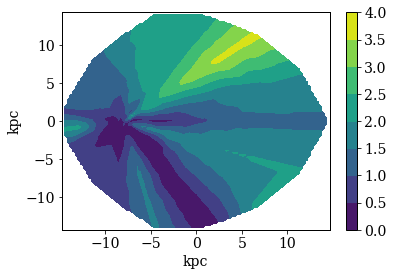

In [213]:
def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi,interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

X, Y, Z = grid(xcoords, ycoords, red)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('kpc')
plt.ylabel('kpc')
plt.show()

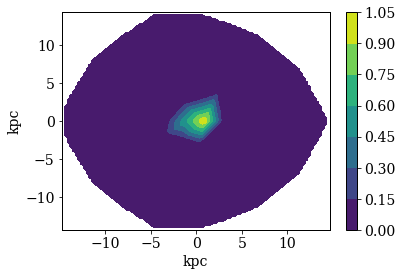

In [214]:
def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi,interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

X, Y, Z = grid(xcoords, ycoords, colour)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('kpc')
plt.ylabel('kpc')
plt.show()

In [200]:
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
Ar = [1.719,5.73,1.398,0.054]

reddening = np.linspace(0.054,14,20)


fullSigPeriodMag = []
for strat in range(len(sigLevels)):
    astrosigLevel = sigLevels[strat][1:]
    fullSigLevelsMagPeriod = []
    reformatMagPeriod = []
    for newCycle in range(20):
        magsig = []
        for i,item in enumerate(reddening):
            sig = []
            if item >= Ar[3] and item < Ar[2]:
                Y = [a-b for a,b in zip(astrosigLevel[2][newCycle],astrosigLevel[3][newCycle])]
                X = Ar[2]-Ar[3]
                m = [slope/X for slope in Y]
                sig = [y+(slope*(item-Ar[3])) for y,slope in zip(astrosigLevel[3][newCycle],m)]
            elif item >= Ar[2] and item < Ar[0]:
                Y = [a-b for a,b in zip(astrosigLevel[0][newCycle],astrosigLevel[2][newCycle])]
                X = Ar[2]-Ar[0]
                m = [slope/X for slope in Y]
                sig = [y+(slope*(item-Ar[2])) for y,slope in zip(astrosigLevel[2][newCycle],m)]
            elif item >= Ar[0] and item < Ar[1]:
                Y = [a-b for a,b in zip(astrosigLevel[1][newCycle],astrosigLevel[0][newCycle])]
                X = Ar[1]-Ar[0]
                m = [slope/X for slope in Y]
                sig = [y+(slope*(item-Ar[0])) for y,slope in zip(astrosigLevel[0][newCycle],m)]
            elif item >= Ar[1]:
                Y = [-x for x in astrosigLevel[1][newCycle]]
                X = 14-Ar[1]
                m = [slope/X for slope in Y]
                sig = [y+(slope*(item-Ar[1])) for y,slope in zip(astrosigLevel[1][newCycle],m)]
            #print(sig)
            for cycle in range(len(sig)):
                if sig[cycle] < 0.:
                    sig[cycle] = 0.
            #print(sig)
        #     if len(sig) != 20:
        #         print 'whoa now'
        #     for z in range(len(sig)):
        #         reformat[z][i] = sig[z]

            magsig.append(sig)
        reformat = []
        for x in range(len(magsig)):
            newsig = []
            for y in range(len(magsig[x])):
                newsig.append(magsig[y][x])
            reformat.append(newsig)
        reformatMagPeriod.append(reformat)
        
        fullSigLevelsMagPeriod.append(magsig)
    fullSigPeriodMag.append(reformatMagPeriod)
#     print(len(fullSigPeriodMag))
#     print(len(fullSigPeriodMag[0]))
#     print(len(fullSigPeriodMag[0][0]))
#     print(len(fullSigPeriodMag[0][0][0]))
    #print(fullSigPeriodMag)
    
#     for z in range(20):
#         for x in range((20)):
#             for y in range(len(astrosigLevel)):
#                 plt.plot(Ar[y],astrosigLevel[y][x][z],'o')
#             print(y)
#             plt.plot(reddening,fullSigPeriodMag[strat][x][z])
#             plt.show()

In [201]:
for x in range(len(fullSigPeriodMag)):
    sumstrat = 0
    for y in range(len(fullSigPeriodMag[x])):
        for z in range(len(fullSigPeriodMag[x][y])):
            sumstrat += sum(fullSigPeriodMag[x][y][z])
    print((sumstrat))

1862.01062694
2059.9278729
2455.86066487
3163.86629255
1887.91607539


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


-0.120898177098 0.46705782736


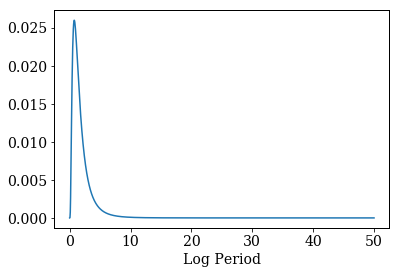

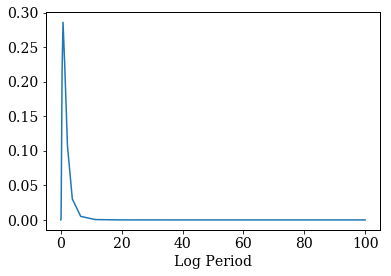

In [202]:
def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

Name = ['GRO J0422+32','A0620-00','GRS 1009-45','XTE J1118+480','GRS 1124-684','4U 1543-475','XTE J1550-564','GRO J1655-40','GX 339-4','H 1705-250','SAX J1819.3-2525','XTE J1859+226','GS 2000+251','XTE J1650-500','GS 1354-64','GS 2023+338']
distance = [0,1.57,0,2.86,2.04,7.02,0,3.51,0,0,5.77,0,0,0,0.67,2.37]
Porb = [5.1,7.8,6.8,4.1,10.4,26.8,37.0,62.9,42.1,12.5,67.6,9.2,8.3,7.6,61.1,155.3]
mv = [22.4,18.2,21.7,19.,20.5,16.6,22.0,17.3,19.2,21.5,13.7,23.29,21.7,24.0,21.5,18.5]
Av = [0.74,1.21,0.62,0.06,0.9,1.5,4.75,4.03,3.4,1.2,0.9,1.8,4.,4.65,3.1,3.3]
Porb = [x/24 for x in Porb]
Mv = [a-b for a,b in zip(mv,Av)]

gauss = []
periods = [np.log10(x) for x in Porb]
mean,std=norm.fit(periods)
prange = np.linspace(0,50,1000)
prange = [np.log10(x) for x in prange]
print(mean,std)
for T in range(len(prange)):    
    gauss.append(gaussian(mean,std,prange[T]))
normalised = [x/sum(gauss) for x in gauss]

prange = [10**(x) for x in prange]
plt.plot(prange,normalised)
plt.xlabel('Log Period')
plt.show()

periodRange = fullPeriod[0]
logPeriod = [np.log10(x) for x in periodRange]
periodProb = []
for x in range(len(logPeriod)):
    periodProb.append(gaussian(mean,std,logPeriod[x]))
normalisedPeriodProb = [x/sum(periodProb) for x in periodProb]
prange = [10**(x) for x in logPeriod]
plt.plot(prange,normalisedPeriodProb)
plt.xlabel('Log Period')
plt.show()

In [203]:
spatialsum = 0.
spatialprob =[]
for x in range(len(resultList)):
    spatialsum += resultList[x][5]
    spatialprob.append(resultList[x][5])

normalisation = spatialsum
strategies = ['astro','minion','minionOC','panstars','baseline']
for strat in range(len(fullSigPeriodMag)):
    sigsum = 0
    finalProb = []
    for x in range(len(resultList)):
        if resultList[2] != -1 and resultList[4] != -1:
            for y in range(20):
                sig = fullSigPeriodMag[strat][resultList[x][2]][y][resultList[x][4]]
                sigsum += sig
                PorbProb = normalisedPeriodProb[y]
                spatialProb = resultList[x][5]/normalisation
                finalProb.append(sig*PorbProb*spatialProb)

    normalisedfinal = [x/len(resultList) for x in finalProb]
    totalFraction = sum(finalProb)
    #print(sigsum)
    print(strategies[strat],totalFraction)



astro 0.62162033162
minion 0.560662838876
minionOC 0.579627289925
panstars 0.549961037638
baseline 0.471517790069


In [ ]:
def normalise(probabilities):
    sumprob = sum(probabilities)
    normalisedprob = [x/(sumprob) for x in probs]
    return normalisedprob

sumprob = 0
probs = []
for x in range(len(resultList)):
    sumprob += resultList[x][5]
    probs.append(resultList[x][5])
print(sumprob)
normalisedprob = [x/(sumprob) for x in probs]
print(sum(normalisedprob))
print(normalisedprob)

In [127]:
#average[0][0] = astroSig[0][0][0] + astroSig [0][0][1]
#newav = [[0.]*20]*20
newav = [[]]*20
counter = 0

averageSigLevels = []

for strat in range(len(sigLevels)):
    newav = [[]]*4
    for z in range(1,len(sigLevels[strat])):
        siglist = []
        for x in range(20):
            sigval = 0.
            for y in range(20):
                sigval += sigLevels[strat][z][y][x]
                #print(sigval,y)
            sigval = sigval/(y+1)
            siglist.append(sigval)
        newav[z-1] = siglist
    averageSigLevels.append(newav)

#print(averageSigLevels)

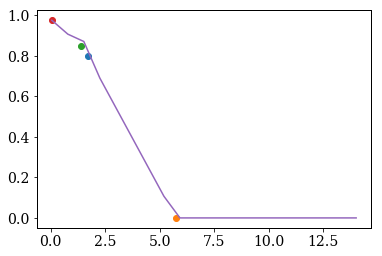

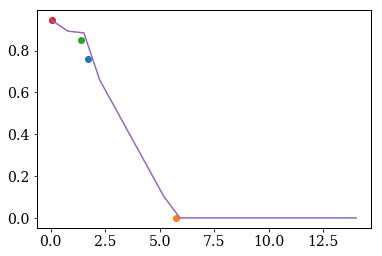

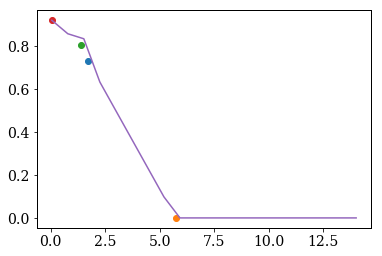

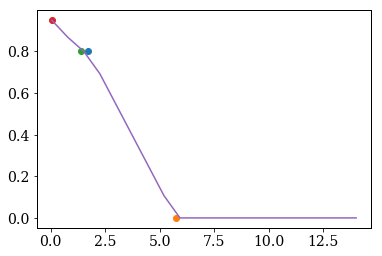

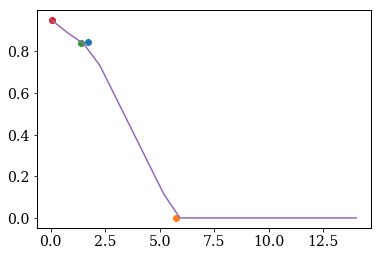

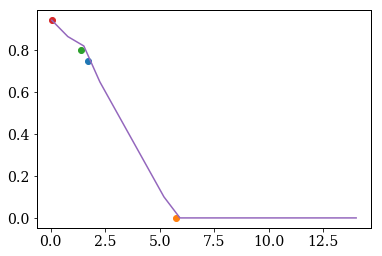

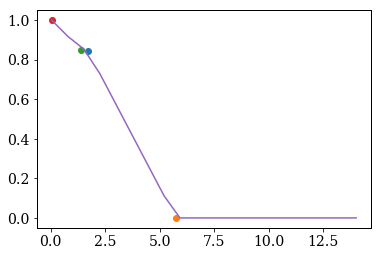

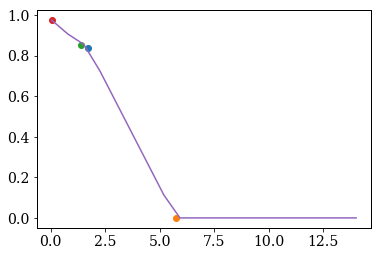

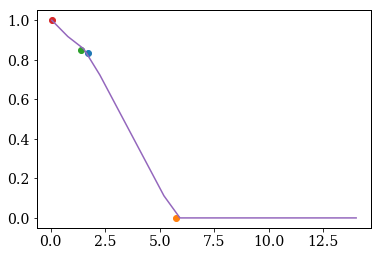

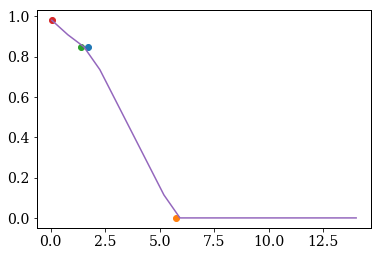

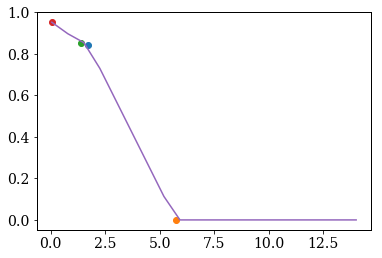

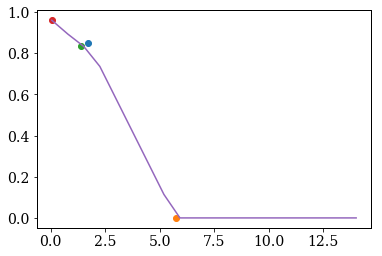

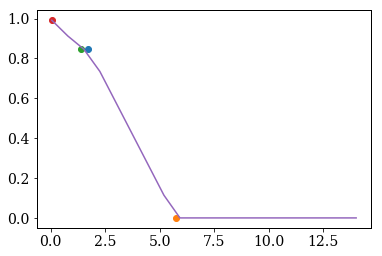

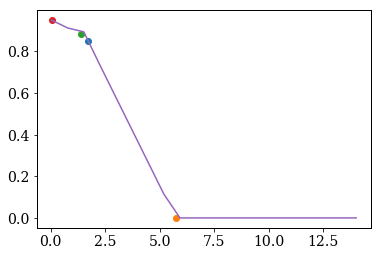

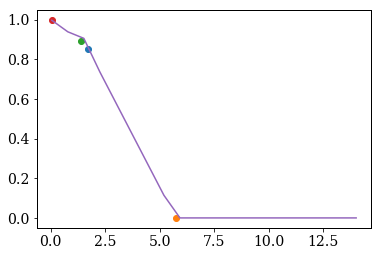

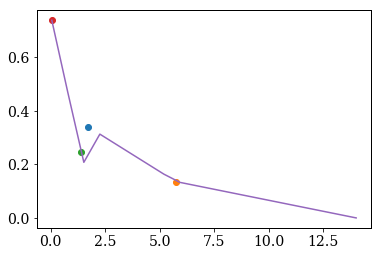

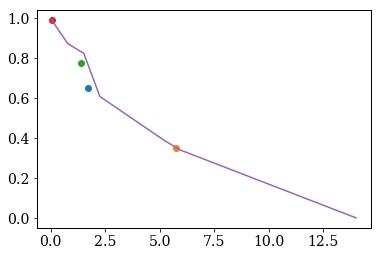

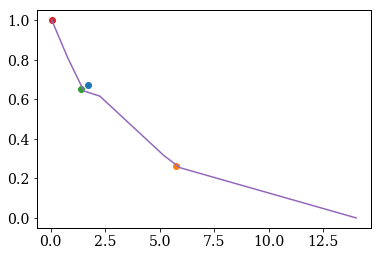

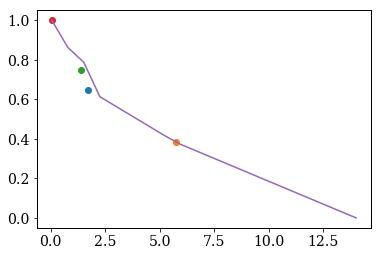

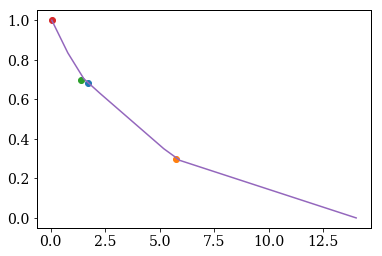

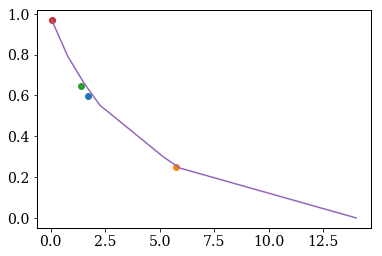

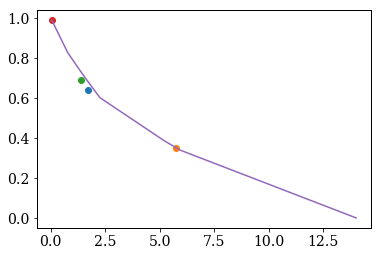

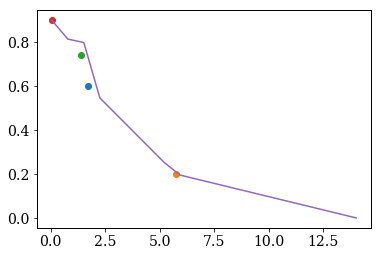

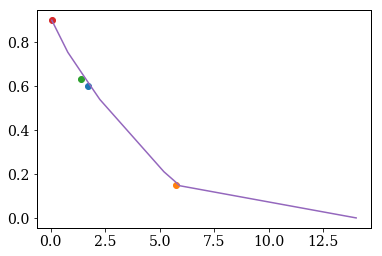

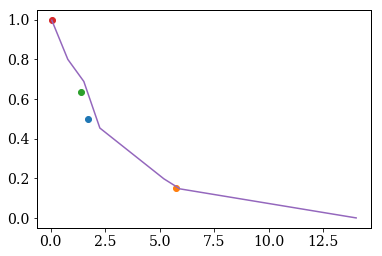

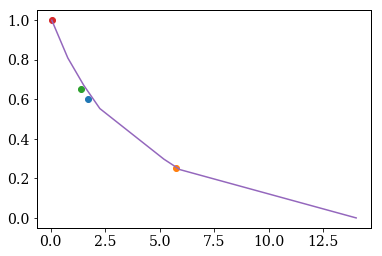

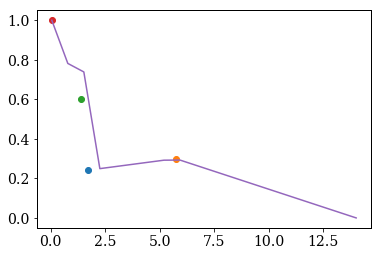

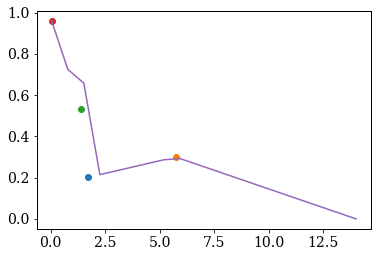

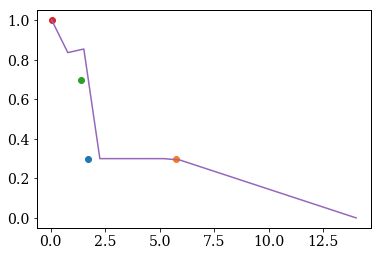

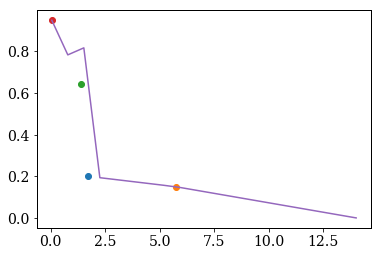

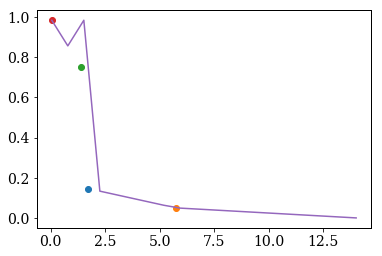

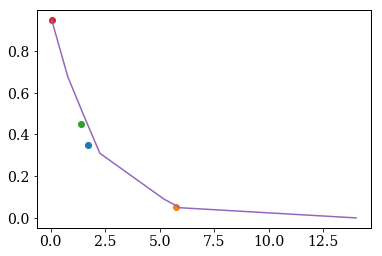

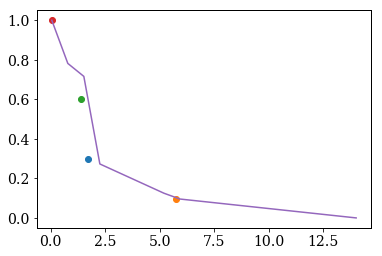

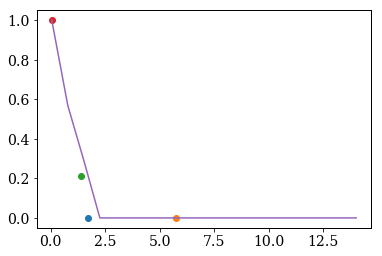

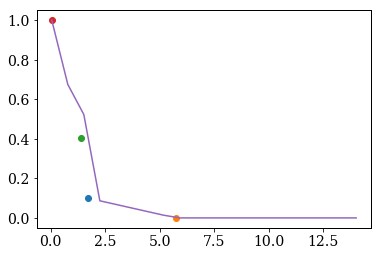

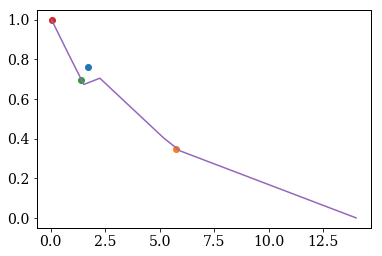

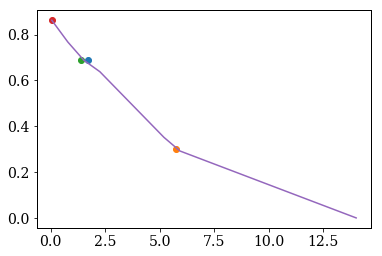

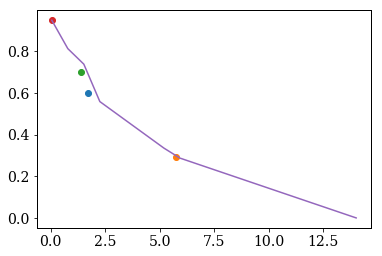

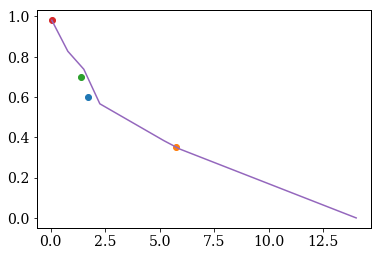

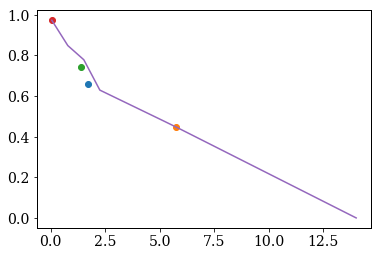

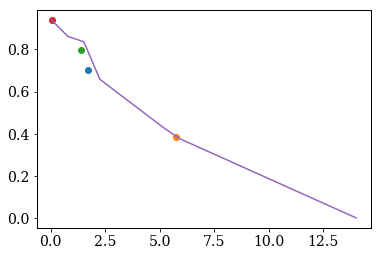

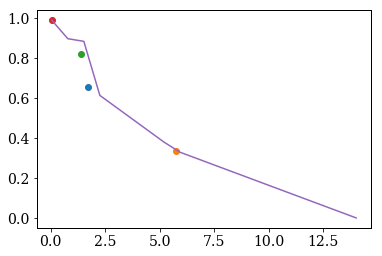

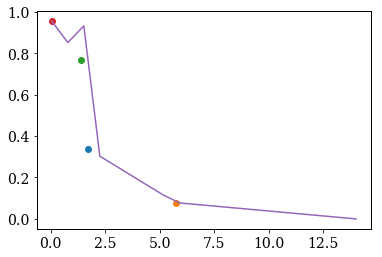

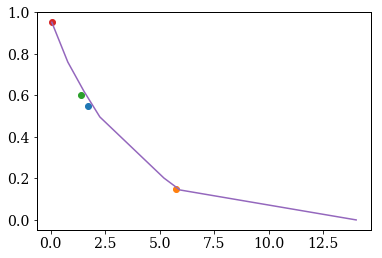

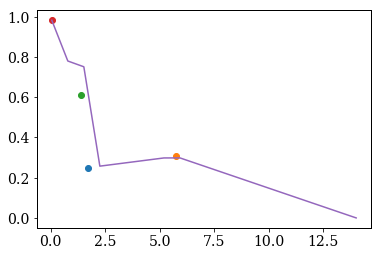

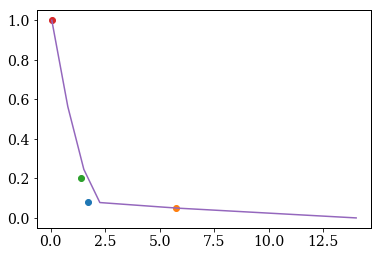

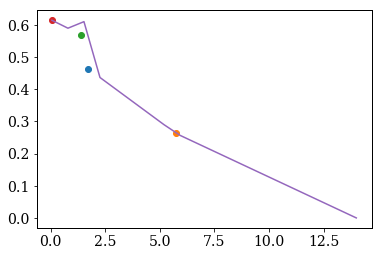

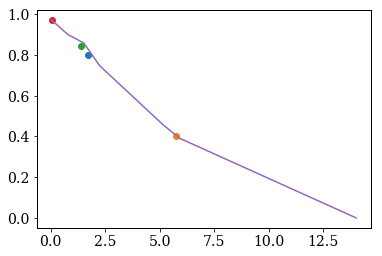

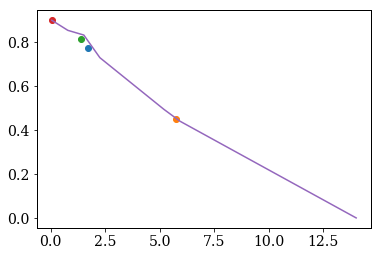

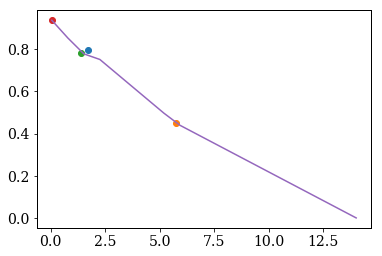

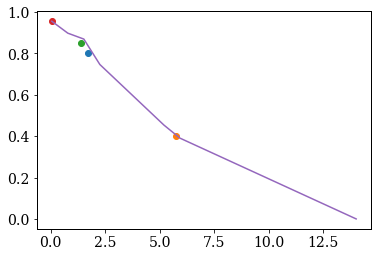

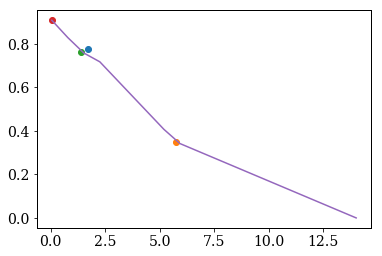

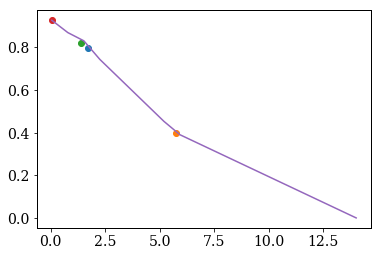

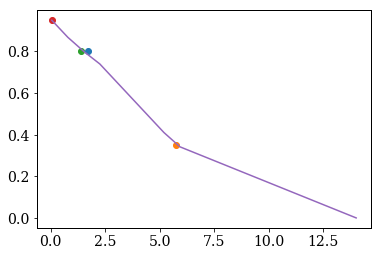

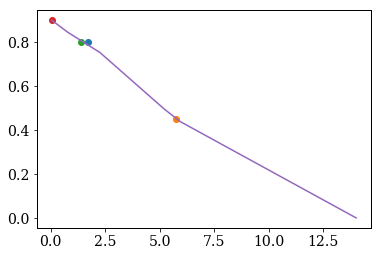

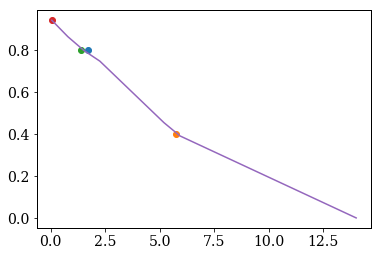

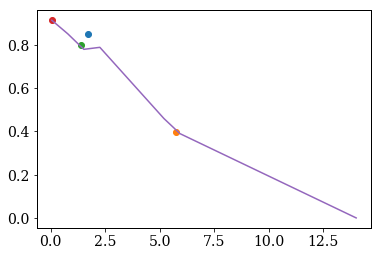

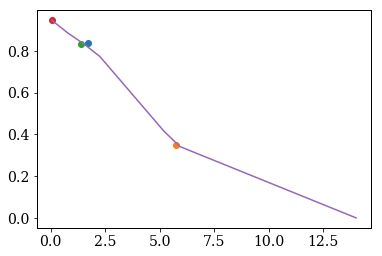

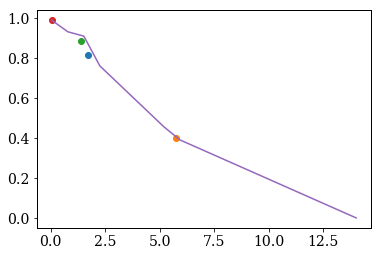

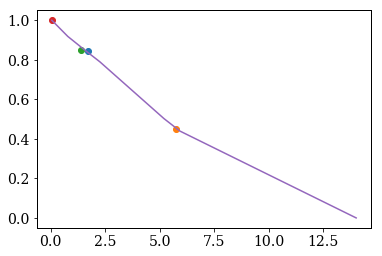

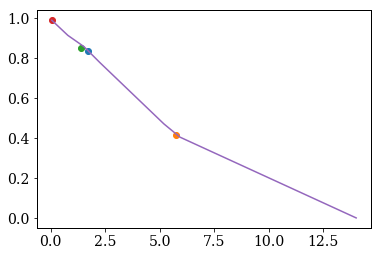

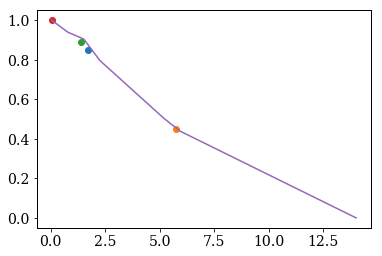

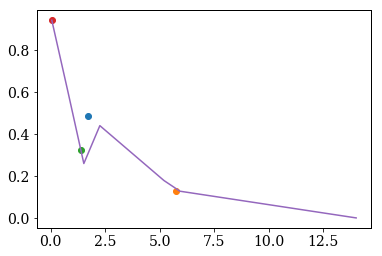

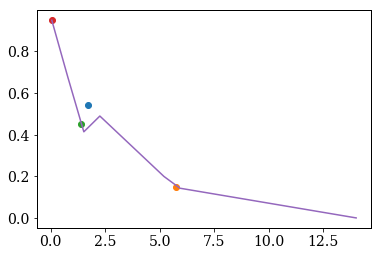

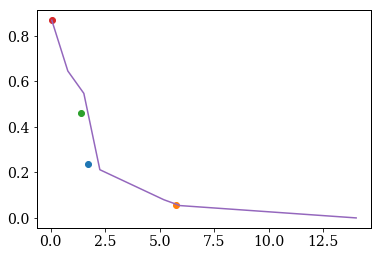

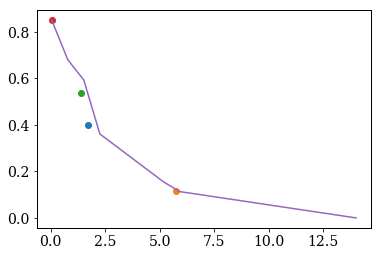

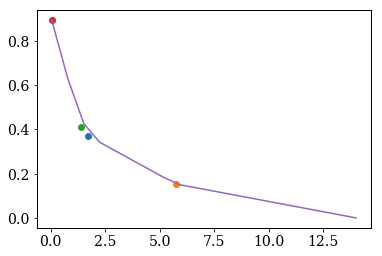

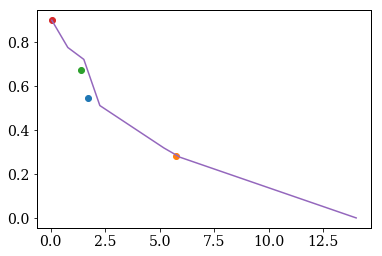

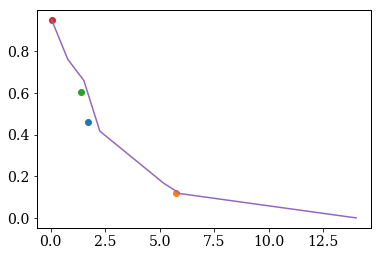

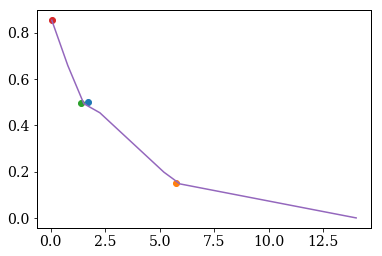

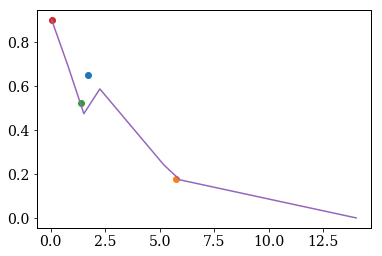

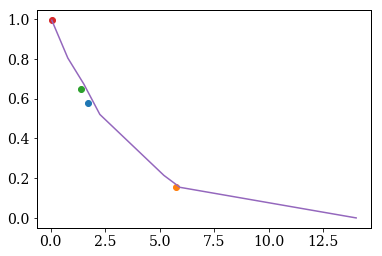

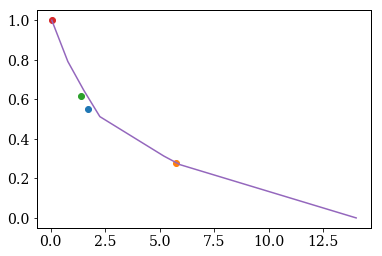

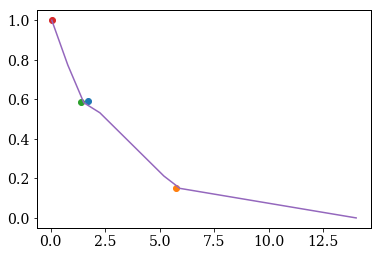

In [131]:
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
Ar = [1.719,5.73,1.398,0.054]

reddening = np.linspace(0.054,14,20)

fullSigLevelsRedPeriod = []
fullSigRedPeriod = []

for strat in range(len(averageSigLevels)):
    astrosigLevel = averageSigLevels[strat]
    reformat = [[]]*len(reddening)
    finalsig = []
    for i,item in enumerate(reddening):
        sig = []
        if item >= Ar[3] and item < Ar[2]:
            Y = [a-b for a,b in zip(astrosigLevel[2],astrosigLevel[3])]
            X = Ar[2]-Ar[3]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[3])) for y,slope in zip(astrosigLevel[3],m)]
        elif item >= Ar[2] and item < Ar[0]:
            Y = [a-b for a,b in zip(astrosigLevel[0],astrosigLevel[2])]
            X = Ar[2]-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[2])) for y,slope in zip(astrosigLevel[2],m)]
        elif item >= Ar[0] and item < Ar[1]:
            Y = [a-b for a,b in zip(astrosigLevel[1],astrosigLevel[0])]
            X = Ar[1]-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[0])) for y,slope in zip(astrosigLevel[0],m)]
        elif item >= Ar[1]:
            Y = [-x for x in astrosigLevel[1]]
            X = 14-Ar[1]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[1])) for y,slope in zip(astrosigLevel[1],m)]
        #print(sig)
        for cycle in range(len(sig)):
            if sig[cycle] < 0.:
                sig[cycle] = 0.
        #print(sig)
    #     if len(sig) != 20:
    #         print 'whoa now'
    #     for z in range(len(sig)):
    #         reformat[z][i] = sig[z]

        finalsig.append(sig)
    fullSigLevelsRedPeriod.append(finalsig)
    reformat = []
    for x in range(len(finalsig)):
        newsig = []
        for y in range(len(finalsig[x])):
            newsig.append(finalsig[y][x])
        reformat.append(newsig)
    fullSigRedPeriod.append(reformat)
    for x in range((20)):
        for y in range(len(astrosigLevel)):
            plt.plot(Ar[y],astrosigLevel[y][x],'o')
        plt.plot(reddening,reformat[x])
        plt.show()

In [149]:
fullRed = []
for i,item in enumerate(reddening):
    fullRed.append([item]*20)
#print(fullRed)

In [152]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullRed,fullPeriod,fullSigRedPeriod[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

#plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullRed,fullPeriod,fullSigRedPeriod[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullRed,fullPeriod,fullSigRedPeriod[3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullRed,fullPeriod,fullSigRedPeriod[4],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_ylabel('A $\it{r}$ Reddening')
fakeaxis.set_xlabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

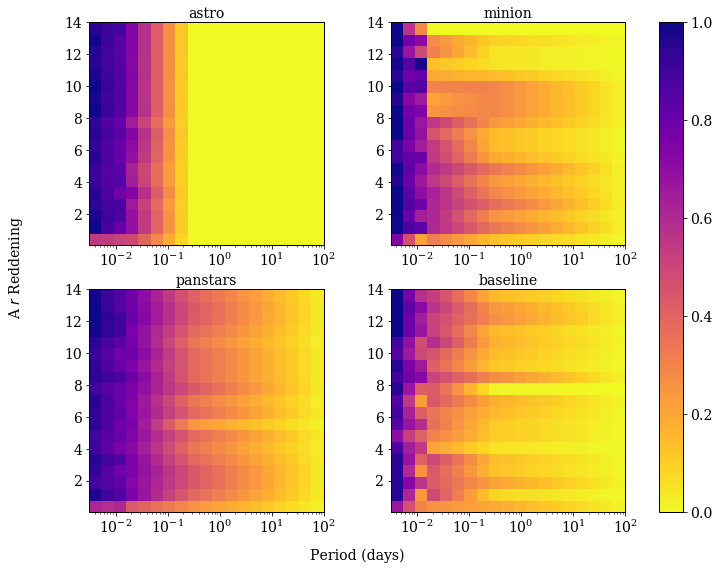

In [153]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullPeriod,fullRed,fullSigRedPeriod[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_xscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

#plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullPeriod,fullRed,fullSigRedPeriod[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_xscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullPeriod,fullRed,fullSigRedPeriod[3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_xscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullPeriod,fullRed,fullSigRedPeriod[4],cmap='plasma_r',vmin=0,vmax=1)
p4.set_xscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_ylabel('A $\it{r}$ Reddening')
fakeaxis.set_xlabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

In [90]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,averageSigLevels[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,averageSigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,averageSigLevels[3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,averageSigLevels[4],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

TypeError: Dimensions of C (4, 20) are incompatible with X (20) and/or Y (20); see help(pcolor)

In [104]:
#average[0][0] = astroSig[0][0][0] + astroSig [0][0][1]
#newav = [[0.]*20]*20
newav = [[]]*20
counter = 0

averageSigLevels = []

for strat in range(len(sigLevels)):
    newav = [[]]*20
    for x in range(20):
        siglist = []
        for y in range(20):
            sigval = 0.
            for z in range(1,len(sigLevels[strat])):
                sigval += sigLevels[strat][z][x][y]

            sigval = sigval/(z)
            siglist.append(sigval)
        newav[x] = siglist
    averageSigLevels.append(newav)


In [105]:
fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,sigLevels[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro_1304',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,sigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('astro_152',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,sigLevels[2],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('astro_630',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,sigLevels[3],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('astro_169',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

ValueError: too many values to unpack

In [ ]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,averageSigLevels[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,averageSigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,averageSigLevels[3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,averageSigLevels[4],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
magSigs = [fullSigLevelAstro,fullSigLevelMinion,fullSigLevelMinionObsChange,fullSigLevelPanstars]

#fakeaxis=fig.add_subplot(gs[:,20])


In [ ]:
fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,fullSigLevelAstro,cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro_sim_01_1004',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,fullSigLevelPanstars,cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('Minion_1020',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,fullSigLevelMinionObsChange,cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('Minion_1016j',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,fullSigLevelMinion,cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('Minion_1016',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()